In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Amateur/FinalAmateurPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

gameId  team       summoner region champion  timestamp  \
0       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   0.000000   
1       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   1.000200   
2       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   0.495733   
3       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   2.000517   
4       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   1.979017   
...                 ...   ...            ...    ...      ...        ...   
838676  EUW1_6283483863   Red   anonymous 56   euw1    Annie  17.139450   
838677  EUW1_6283483863   Red   anonymous 56   euw1    Annie  22.688683   
838678  EUW1_6283483863   Red   anonymous 56   euw1    Annie  22.826867   
838679  EUW1_6283483863   Red   anonymous 56   euw1    Annie  25.901700   
838680  EUW1_6283483863   Red   anonymous 56   euw1    Annie  27.683317   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
0              329.0         650.0    1.0            0.0  ...   
1             6569.0       11391.0    1.0            0.0  ...   
2                NaN           NaN    NaN            NaN  ...   
3             4320.0       12059.0    1.0            0.0  ...   
4             4245.0       13217.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
838676           NaN           NaN    NaN            NaN  ...   
838677           NaN           NaN    NaN            NaN  ...   
838678           NaN           NaN    NaN            NaN  ...   
838679           NaN           NaN    NaN            NaN  ...   
838680           NaN           NaN    NaN            NaN  ...   

        trueDamageTaken  victory       eventType  skillSlot  buildingType  \
0                   0.0    False             NaN        NaN           NaN   
1                   0.0    False             NaN        NaN           NaN   
2                   NaN    False    SkillLevelUp        1.0           NaN   
3                   0.0    False             NaN        NaN           NaN   
4                   NaN    False          Assist        NaN           NaN   
...                 ...      ...             ...        ...           ...   
838676              NaN    False  Item purchased        NaN           NaN   
838677              NaN    False  Item purchased        NaN           NaN   
838678              NaN    False  Item purchased        NaN           NaN   
838679              NaN    False  Item purchased        NaN           NaN   
838680              NaN    False  Item purchased        NaN           NaN   

        lane  monster            itemName     role      rank  
0        NaN      NaN                 NaN  UTILITY  Platinum  
1        NaN      NaN                 NaN  UTILITY  Platinum  
2        NaN      NaN                 NaN  UTILITY  Platinum  
3        NaN      NaN                 NaN  UTILITY  Platinum  
4        NaN      NaN                 NaN  UTILITY  Platinum  
...      ...      ...                 ...      ...       ...  
838676   NaN      NaN           Kindlegem  UTILITY      Gold  
838677   NaN      NaN        Knight's Vow  UTILITY      Gold  
838678   NaN      NaN     Glacial Buckler  UTILITY      Gold  
838679   NaN      NaN           Kindlegem  UTILITY      Gold  
838680   NaN      NaN  Zeke's Convergence  UTILITY      Gold  

[838681 rows x 56 columns]

In [3]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death")]
middle_deaths_df

gameId  team       summoner region  champion  timestamp  \
2384    EUW1_6276376169   Red  anonymous 126   euw1    Akshan   5.885950   
2386    EUW1_6276376169   Red  anonymous 126   euw1    Akshan   6.703000   
2396    EUW1_6276376169   Red  anonymous 126   euw1    Akshan  10.661433   
2402    EUW1_6276376169   Red  anonymous 126   euw1    Akshan  13.869350   
2412    EUW1_6276376169   Red  anonymous 126   euw1    Akshan  17.573400   
...                 ...   ...            ...    ...       ...        ...   
639503  EUW1_6289902488  Blue  anonymous 132   euw1    Irelia  16.940333   
639525  EUW1_6289902488  Blue  anonymous 132   euw1    Irelia  23.086500   
639534  EUW1_6289902488  Blue  anonymous 132   euw1    Irelia  26.142217   
640227  EUW1_6289305233  Blue  anonymous 150   euw1  Malzahar  12.187733   
640233  EUW1_6289305233  Blue  anonymous 150   euw1  Malzahar  15.752567   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
2384         12800.0        2058.0    NaN            NaN  ...   
2386          6279.0        4919.0    NaN            NaN  ...   
2396          7522.0        6988.0    NaN            NaN  ...   
2402         12009.0        2803.0    NaN            NaN  ...   
2412          7795.0       11773.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
639503        3323.0       11010.0    NaN            NaN  ...   
639525        6749.0       13456.0    NaN            NaN  ...   
639534       13872.0       13536.0    NaN            NaN  ...   
640227       10786.0        5388.0    NaN            NaN  ...   
640233        1681.0       12106.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
2384                NaN    False      Death        NaN           NaN   NaN   
2386                NaN    False      Death        NaN           NaN   NaN   
2396                NaN    False      Death        NaN           NaN   NaN   
2402                NaN    False      Death        NaN           NaN   NaN   
2412                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
639503              NaN     True      Death        NaN           NaN   NaN   
639525              NaN     True      Death        NaN           NaN   NaN   
639534              NaN     True      Death        NaN           NaN   NaN   
640227              NaN    False      Death        NaN           NaN   NaN   
640233              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
2384        NaN       NaN  MIDDLE  Platinum  
2386        NaN       NaN  MIDDLE  Platinum  
2396        NaN       NaN  MIDDLE  Platinum  
2402        NaN       NaN  MIDDLE  Platinum  
2412        NaN       NaN  MIDDLE  Platinum  
...         ...       ...     ...       ...  
639503      NaN       NaN  MIDDLE      Gold  
639525      NaN       NaN  MIDDLE      Gold  
639534      NaN       NaN  MIDDLE      Gold  
640227      NaN       NaN  MIDDLE      Gold  
640233      NaN       NaN  MIDDLE      Gold  

[10957 rows x 56 columns]

In [1232]:
print("This dataset contains {} matches in which the middle died at least once".format(len(np.unique(middle_deaths_df["gameId"]))))

This dataset contains 1740 matches in which the middle died at least once


In [1233]:
print("{} players died a total of {} times".format(len(np.unique(middle_deaths_df["summoner"])), middle_deaths_df.shape[0]))

34 players died a total of 10957 times


In [1234]:
print("This Dataset contains an average of {} deaths per game".format((middle_deaths_df.shape[0]/len(np.unique(middle_deaths_df["gameId"])))))

This Dataset contains an average of 6.2971264367816095 deaths per game


In [4]:
blueSide_middle_deaths_df = middle_deaths_df[middle_deaths_df["team"] == "Blue"]
blueSide_middle_deaths_df

gameId  team       summoner region  champion  timestamp  \
2516    EUW1_6276036648  Blue  anonymous 126   euw1  Kassadin   2.906283   
2527    EUW1_6276036648  Blue  anonymous 126   euw1  Kassadin   8.165033   
2534    EUW1_6276036648  Blue  anonymous 126   euw1  Kassadin  11.476917   
2541    EUW1_6276036648  Blue  anonymous 126   euw1  Kassadin  14.367867   
2545    EUW1_6276036648  Blue  anonymous 126   euw1  Kassadin  16.459683   
...                 ...   ...            ...    ...       ...        ...   
639503  EUW1_6289902488  Blue  anonymous 132   euw1    Irelia  16.940333   
639525  EUW1_6289902488  Blue  anonymous 132   euw1    Irelia  23.086500   
639534  EUW1_6289902488  Blue  anonymous 132   euw1    Irelia  26.142217   
640227  EUW1_6289305233  Blue  anonymous 150   euw1  Malzahar  12.187733   
640233  EUW1_6289305233  Blue  anonymous 150   euw1  Malzahar  15.752567   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
2516          5578.0        6001.0    NaN            NaN  ...   
2527          2873.0       12875.0    NaN            NaN  ...   
2534         10742.0        5116.0    NaN            NaN  ...   
2541          8762.0        9209.0    NaN            NaN  ...   
2545         11429.0        1491.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
639503        3323.0       11010.0    NaN            NaN  ...   
639525        6749.0       13456.0    NaN            NaN  ...   
639534       13872.0       13536.0    NaN            NaN  ...   
640227       10786.0        5388.0    NaN            NaN  ...   
640233        1681.0       12106.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
2516                NaN    False      Death        NaN           NaN   NaN   
2527                NaN    False      Death        NaN           NaN   NaN   
2534                NaN    False      Death        NaN           NaN   NaN   
2541                NaN    False      Death        NaN           NaN   NaN   
2545                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
639503              NaN     True      Death        NaN           NaN   NaN   
639525              NaN     True      Death        NaN           NaN   NaN   
639534              NaN     True      Death        NaN           NaN   NaN   
640227              NaN    False      Death        NaN           NaN   NaN   
640233              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
2516        NaN       NaN  MIDDLE  Platinum  
2527        NaN       NaN  MIDDLE  Platinum  
2534        NaN       NaN  MIDDLE  Platinum  
2541        NaN       NaN  MIDDLE  Platinum  
2545        NaN       NaN  MIDDLE  Platinum  
...         ...       ...     ...       ...  
639503      NaN       NaN  MIDDLE      Gold  
639525      NaN       NaN  MIDDLE      Gold  
639534      NaN       NaN  MIDDLE      Gold  
640227      NaN       NaN  MIDDLE      Gold  
640233      NaN       NaN  MIDDLE      Gold  

[5169 rows x 56 columns]

In [5]:
gamesBlueSide = len(np.unique(blueSide_middle_deaths_df["gameId"]))
gamesBlueSide

847

In [1237]:
players_df = np.unique(blueSide_middle_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_middle_deaths_df[blueSide_middle_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 104 played 43 matches
anonymous 105 played 27 matches
anonymous 11 played 18 matches
anonymous 111 played 26 matches
anonymous 113 played 20 matches
anonymous 116 played 23 matches
anonymous 117 played 36 matches
anonymous 126 played 23 matches
anonymous 131 played 33 matches
anonymous 132 played 13 matches
anonymous 135 played 17 matches
anonymous 14 played 38 matches
anonymous 148 played 11 matches
anonymous 150 played 24 matches
anonymous 152 played 13 matches
anonymous 163 played 27 matches
anonymous 166 played 16 matches
anonymous 175 played 12 matches
anonymous 20 played 28 matches
anonymous 23 played 20 matches
anonymous 26 played 17 matches
anonymous 32 played 19 matches
anonymous 39 played 35 matches
anonymous 46 played 12 matches
anonymous 55 played 22 matches
anonymous 57 played 37 matches
anonymous 6 played 24 matches
anonymous 63 played 27 matches
anonymous 72 played 39 matches
anonymous 73 played 41 matches
anonymous 83 played 28 matches
anonymous 84 played 42 m

In [1238]:
print("Blue side contains {} matches in which the middle died at least once".format(len(np.unique(blueSide_middle_deaths_df["gameId"]))))

Blue side contains 847 matches in which the middle died at least once


In [1239]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_middle_deaths_df["summoner"])), blueSide_middle_deaths_df.shape[0]))

34 players died a total of 5169 times on the blue side


In [6]:
redSide_middle_deaths_df = middle_deaths_df[middle_deaths_df["team"] == "Red"]
redSide_middle_deaths_df

gameId team       summoner region champion  timestamp  \
2384    EUW1_6276376169  Red  anonymous 126   euw1   Akshan   5.885950   
2386    EUW1_6276376169  Red  anonymous 126   euw1   Akshan   6.703000   
2396    EUW1_6276376169  Red  anonymous 126   euw1   Akshan  10.661433   
2402    EUW1_6276376169  Red  anonymous 126   euw1   Akshan  13.869350   
2412    EUW1_6276376169  Red  anonymous 126   euw1   Akshan  17.573400   
...                 ...  ...            ...    ...      ...        ...   
639271  EUW1_6289555693  Red  anonymous 131   euw1   Syndra   9.724083   
639279  EUW1_6289555693  Red  anonymous 131   euw1   Syndra  13.791483   
639323  EUW1_6289555693  Red  anonymous 131   euw1   Syndra  37.698383   
639334  EUW1_6289555693  Red  anonymous 131   euw1   Syndra  41.216200   
639336  EUW1_6289555693  Red  anonymous 131   euw1   Syndra  42.782933   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
2384         12800.0        2058.0    NaN            NaN  ...   
2386          6279.0        4919.0    NaN            NaN  ...   
2396          7522.0        6988.0    NaN            NaN  ...   
2402         12009.0        2803.0    NaN            NaN  ...   
2412          7795.0       11773.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
639271        9593.0        9335.0    NaN            NaN  ...   
639279        6864.0        9003.0    NaN            NaN  ...   
639323       10649.0        8900.0    NaN            NaN  ...   
639334        1546.0        8170.0    NaN            NaN  ...   
639336       12701.0        5393.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
2384                NaN    False      Death        NaN           NaN   NaN   
2386                NaN    False      Death        NaN           NaN   NaN   
2396                NaN    False      Death        NaN           NaN   NaN   
2402                NaN    False      Death        NaN           NaN   NaN   
2412                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
639271              NaN     True      Death        NaN           NaN   NaN   
639279              NaN     True      Death        NaN           NaN   NaN   
639323              NaN     True      Death        NaN           NaN   NaN   
639334              NaN     True      Death        NaN           NaN   NaN   
639336              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
2384        NaN       NaN  MIDDLE  Platinum  
2386        NaN       NaN  MIDDLE  Platinum  
2396        NaN       NaN  MIDDLE  Platinum  
2402        NaN       NaN  MIDDLE  Platinum  
2412        NaN       NaN  MIDDLE  Platinum  
...         ...       ...     ...       ...  
639271      NaN       NaN  MIDDLE      Gold  
639279      NaN       NaN  MIDDLE      Gold  
639323      NaN       NaN  MIDDLE      Gold  
639334      NaN       NaN  MIDDLE      Gold  
639336      NaN       NaN  MIDDLE      Gold  

[5788 rows x 56 columns]

In [7]:
gamesRedSide = len(np.unique(redSide_middle_deaths_df["gameId"]))
gamesRedSide

893

In [8]:
redSideVictory_middle_deaths_df = redSide_middle_deaths_df[redSide_middle_deaths_df["victory"] == True]
blueSideVictory_middle_deaths_df = blueSide_middle_deaths_df[blueSide_middle_deaths_df["victory"] == True]

winsRedSide = len(np.unique(redSideVictory_middle_deaths_df["gameId"]))
winsBlueSide = len(np.unique(blueSideVictory_middle_deaths_df["gameId"]))

print("Red Team Victories: {}".format(winsRedSide))
print("Blue Team Victories: {}".format(winsBlueSide))

Red Team Victories: 467
Blue Team Victories: 455


In [1243]:
players_df = np.unique(redSide_middle_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_middle_deaths_df[redSide_middle_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 104 played 45 matches
anonymous 105 played 42 matches
anonymous 11 played 22 matches
anonymous 111 played 20 matches
anonymous 113 played 21 matches
anonymous 116 played 19 matches
anonymous 117 played 41 matches
anonymous 126 played 19 matches
anonymous 131 played 33 matches
anonymous 132 played 23 matches
anonymous 135 played 20 matches
anonymous 14 played 19 matches
anonymous 148 played 11 matches
anonymous 150 played 16 matches
anonymous 152 played 6 matches
anonymous 163 played 15 matches
anonymous 166 played 19 matches
anonymous 175 played 13 matches
anonymous 20 played 18 matches
anonymous 23 played 37 matches
anonymous 26 played 34 matches
anonymous 32 played 15 matches
anonymous 39 played 34 matches
anonymous 46 played 26 matches
anonymous 55 played 30 matches
anonymous 57 played 45 matches
anonymous 6 played 41 matches
anonymous 63 played 29 matches
anonymous 72 played 36 matches
anonymous 73 played 32 matches
anonymous 83 played 40 matches
anonymous 84 played 36 ma

In [1244]:
print("Red side contains {} matches in which the middle died at least once".format(len(np.unique(redSide_middle_deaths_df["gameId"]))))

Red side contains 893 matches in which the middle died at least once


In [1245]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_middle_deaths_df["summoner"])), redSide_middle_deaths_df.shape[0]))

34 players died a total of 5788 times on the red side


function to visualize the results

In [1246]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Mid Players' Deaths in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Mid Players' Deaths in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [1247]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [1248]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [1249]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [1250]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.ylabel('Deaths')
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [1251]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:", y = 1.05)
    
    plt.show()

---
### Iron Players

#### Clustering Red Team Victory

In [1252]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

redSideVictory_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == True)]
redSideVictory_df

gameId team      summoner region     champion  timestamp  \
105195  EUW1_6283003722  Red   anonymous 6   euw1  AurelionSol  15.541783   
105198  EUW1_6283003722  Red   anonymous 6   euw1  AurelionSol  16.839683   
105208  EUW1_6283003722  Red   anonymous 6   euw1  AurelionSol  22.459633   
105213  EUW1_6283003722  Red   anonymous 6   euw1  AurelionSol  24.149233   
105252  EUW1_6282930836  Red   anonymous 6   euw1  AurelionSol  15.251400   
...                 ...  ...           ...    ...          ...        ...   
622228  EUW1_6289274439  Red  anonymous 14   euw1        Akali  19.923333   
622234  EUW1_6289274439  Red  anonymous 14   euw1        Akali  22.365467   
622240  EUW1_6289274439  Red  anonymous 14   euw1        Akali  24.824633   
622247  EUW1_6289274439  Red  anonymous 14   euw1        Akali  28.579233   
622250  EUW1_6289274439  Red  anonymous 14   euw1        Akali  29.991200   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
105195        9012.0        7674.0    NaN            NaN  ...   
105198        6573.0        6898.0    NaN            NaN  ...   
105208        5172.0        5904.0    NaN            NaN  ...   
105213        1771.0        2728.0    NaN            NaN  ...   
105252        6110.0        6508.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
622228        6339.0        5903.0    NaN            NaN  ...   
622234        2714.0        4326.0    NaN            NaN  ...   
622240        4344.0        7322.0    NaN            NaN  ...   
622247        7283.0        1486.0    NaN            NaN  ...   
622250        4706.0        7645.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
105195              NaN     True      Death        NaN           NaN   NaN   
105198              NaN     True      Death        NaN           NaN   NaN   
105208              NaN     True      Death        NaN           NaN   NaN   
105213              NaN     True      Death        NaN           NaN   NaN   
105252              NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
622228              NaN     True      Death        NaN           NaN   NaN   
622234              NaN     True      Death        NaN           NaN   NaN   
622240              NaN     True      Death        NaN           NaN   NaN   
622247              NaN     True      Death        NaN           NaN   NaN   
622250              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
105195      NaN       NaN  MIDDLE  Iron  
105198      NaN       NaN  MIDDLE  Iron  
105208      NaN       NaN  MIDDLE  Iron  
105213      NaN       NaN  MIDDLE  Iron  
105252      NaN       NaN  MIDDLE  Iron  
...         ...       ...     ...   ...  
622228      NaN       NaN  MIDDLE  Iron  
622234      NaN       NaN  MIDDLE  Iron  
622240      NaN       NaN  MIDDLE  Iron  
622247      NaN       NaN  MIDDLE  Iron  
622250      NaN       NaN  MIDDLE  Iron  

[303 rows x 56 columns]

In [1253]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == True)].copy()

In [1254]:
redSideGames_df = middle_deaths_df[middle_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [1255]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

48

In [1256]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

48.0

In [1257]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_middle_deaths_df.shape[0]) * 100
winRateRedSide

5.234968901174844

In [1258]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 11 won 10 matches on the red side
anonymous 11 has an average of 6.6 deaths per game when winning on the red side

anonymous 14 won 10 matches on the red side
anonymous 14 has an average of 5.3 deaths per game when winning on the red side

anonymous 20 won 5 matches on the red side
anonymous 20 has an average of 4.4 deaths per game when winning on the red side

anonymous 6 won 23 matches on the red side
anonymous 6 has an average of 7.043478260869565 deaths per game when winning on the red side



In [1259]:
print("Victory games on red side contains {} matches in which the middle died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 48 matches in which the middle died at least once
4 players died a total of 303 times on the red side
Victory games on red side contains an average of 6.3125 deaths per game


In [1260]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
105195        9012.0        7674.0  15.541783
105198        6573.0        6898.0  16.839683
105208        5172.0        5904.0  22.459633
105213        1771.0        2728.0  24.149233
105252        6110.0        6508.0  15.251400
...              ...           ...        ...
622228        6339.0        5903.0  19.923333
622234        2714.0        4326.0  22.365467
622240        4344.0        7322.0  24.824633
622247        7283.0        1486.0  28.579233
622250        4706.0        7645.0  29.991200

[303 rows x 3 columns]

Time discretization

In [1261]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1262]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1263]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [1264]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [1265]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
105195      0.759764      0.405824          0
105198     -0.140691      0.113259          0
105208     -0.657926     -0.261495          0
105213     -1.913541     -1.458899          0
105252     -0.311626     -0.033777          0
...              ...           ...        ...
622228     -0.227081     -0.261872          0
622234     -1.565395     -0.856427          0
622240     -0.963615      0.273114          0
622247      0.121434     -1.927153          1
622250     -0.829968      0.394890          1

[303 rows x 3 columns]

In [1266]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.34900300737030676
Silhouette score for k=3: 0.36713644194027734
Silhouette score for k=4: 0.35251479372107547
Silhouette score for k=5: 0.36382287088299214
Silhouette score for k=6: 0.3551127182234014
Silhouette score for k=7: 0.36413508959450397
Silhouette score for k=8: 0.37359719531969754
Silhouette score for k=9: 0.37115078144308306
Silhouette score for k=10: 0.38161415281645894
Silhouette score for k=11: 0.3850801262012157
Silhouette score for k=12: 0.3745713315491582
Silhouette score for k=13: 0.40158399196301797
Silhouette score for k=14: 0.39093867517278746
Silhouette score for k=15: 0.4150509652667226


K-Means with k = 4

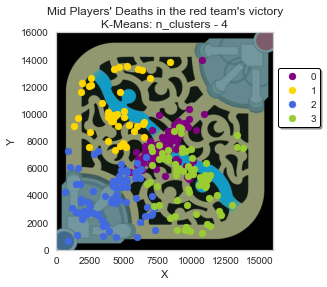

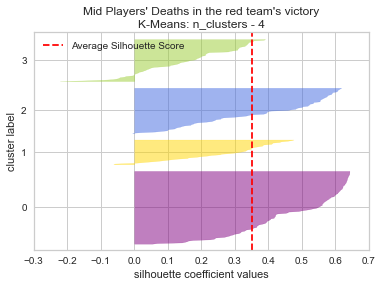

Silhouette score: 0.35251479372107547
0    119
2     74
3     69
1     41
Name: cluster, dtype: int64

Inertia: 302.980757120329

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8039.168067   7739.201681  -0.638655
1        1   4397.609756  10252.756098   0.097561
2        2   4052.851351   3982.756757   0.662162
3        3   9713.217391   5261.130435   0.246377

In [1267]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "gold", "royalblue", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [1268]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1075.235322   1151.666696   0.497576
1        1   1552.319600   1890.620350   0.725994
2        2   1826.455626   1675.237569   0.472973
3        3   1631.023924   2041.434235   0.668240

In [1269]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           10863.0            5415.0           13931.0   
1        1            8371.0            1317.0           13788.0   
2        2            7283.0             637.0            7257.0   
3        3           13762.0            6732.0            9037.0   

   min coordinate_y  max timestamp  min timestamp  
0            5202.0              1             -1  
1            7322.0              1             -1  
2             613.0              1              0  
3            1238.0              1             -1

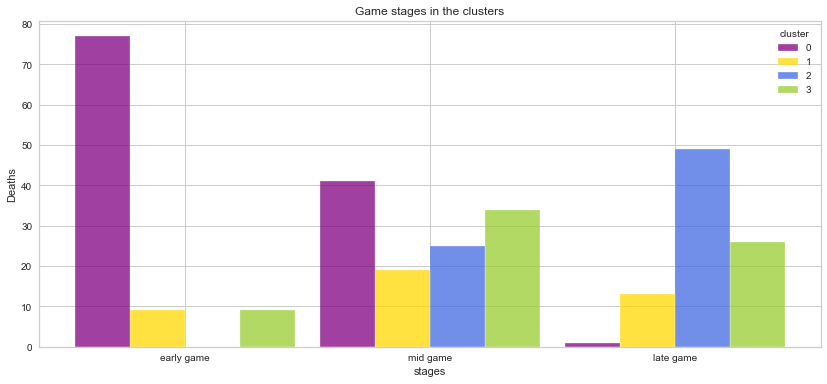

In [1270]:
stagesPerClusterV2(redSideVictory_df, colors)

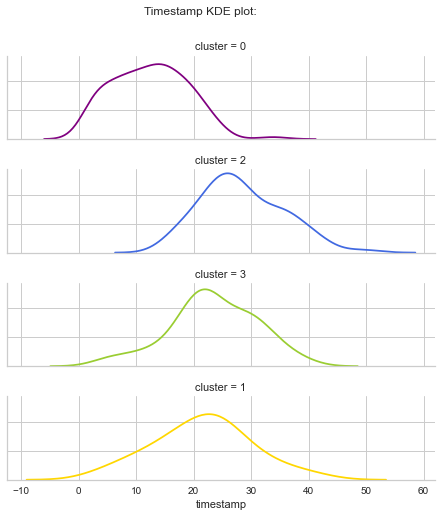

In [1271]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1272]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
AurelionSol       18
Akali             10
Pantheon          10
Sylas              4
Katarina           2
Ahri               2
Kassadin           1
Galio              1

Deaths with each champion:

In [1273]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



AurelionSol    121
Pantheon        66
Akali           53
Sylas           18
Katarina        16
Ahri            15
Kassadin        10
Galio            4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1274]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 8 champions when they won on the red side

Cluster 0 - died with 8 champions:
 ['Ahri' 'Akali' 'AurelionSol' 'Galio' 'Kassadin' 'Katarina' 'Pantheon'
 'Sylas']
AurelionSol    50
Akali          23
Pantheon       20
Ahri            7
Sylas           7
Kassadin        5
Katarina        5
Galio           2
Name: champion, dtype: int64

Cluster 1 - died with 8 champions:
 ['Ahri' 'Akali' 'AurelionSol' 'Galio' 'Kassadin' 'Katarina' 'Pantheon'
 'Sylas']
AurelionSol    14
Pantheon       11
Akali           6
Sylas           5
Katarina        2
Kassadin        1
Ahri            1
Galio           1
Name: champion, dtype: int64

Cluster 2 - died with 7 champions:
 ['Ahri' 'Akali' 'AurelionSol' 'Kassadin' 'Katarina' 'Pantheon' 'Sylas']
AurelionSol    29
Pantheon       17
Akali          14
Katarina        6
Sylas           4
Kassadin        2
Ahri            2
Name: champion, dtype: int64

Cluster 3 - died with 8 champions:
 ['Ahri' 'Akali' 'AurelionSol' 'Galio' 'Kassadin

---
#### Clustering Red Team Defeat

In [1275]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

redSideDefeat_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team      summoner region     champion  timestamp  \
104919  EUW1_6283638818  Red   anonymous 6   euw1  AurelionSol   9.939100   
104923  EUW1_6283638818  Red   anonymous 6   euw1  AurelionSol  11.893967   
104928  EUW1_6283638818  Red   anonymous 6   euw1  AurelionSol  14.400617   
104931  EUW1_6283638818  Red   anonymous 6   euw1  AurelionSol  16.707783   
104951  EUW1_6283568062  Red   anonymous 6   euw1         Ahri   9.328450   
...                 ...  ...           ...    ...          ...        ...   
621668  EUW1_6289502017  Red  anonymous 11   euw1     Pantheon   7.790167   
621672  EUW1_6289502017  Red  anonymous 11   euw1     Pantheon   9.482050   
621676  EUW1_6289502017  Red  anonymous 11   euw1     Pantheon  11.257000   
621678  EUW1_6289502017  Red  anonymous 11   euw1     Pantheon  12.558867   
621683  EUW1_6289502017  Red  anonymous 11   euw1     Pantheon  15.156333   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
104919       10282.0        7764.0    NaN            NaN  ...   
104923        7500.0        8009.0    NaN            NaN  ...   
104928       11639.0        3616.0    NaN            NaN  ...   
104931       10190.0       13394.0    NaN            NaN  ...   
104951        6904.0        9843.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
621668       12601.0        2867.0    NaN            NaN  ...   
621672        9586.0        4554.0    NaN            NaN  ...   
621676        8800.0        8862.0    NaN            NaN  ...   
621678       12796.0        2825.0    NaN            NaN  ...   
621683        9631.0        4351.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
104919              NaN    False      Death        NaN           NaN   NaN   
104923              NaN    False      Death        NaN           NaN   NaN   
104928              NaN    False      Death        NaN           NaN   NaN   
104931              NaN    False      Death        NaN           NaN   NaN   
104951              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
621668              NaN    False      Death        NaN           NaN   NaN   
621672              NaN    False      Death        NaN           NaN   NaN   
621676              NaN    False      Death        NaN           NaN   NaN   
621678              NaN    False      Death        NaN           NaN   NaN   
621683              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
104919      NaN       NaN  MIDDLE  Iron  
104923      NaN       NaN  MIDDLE  Iron  
104928      NaN       NaN  MIDDLE  Iron  
104931      NaN       NaN  MIDDLE  Iron  
104951      NaN       NaN  MIDDLE  Iron  
...         ...       ...     ...   ...  
621668      NaN       NaN  MIDDLE  Iron  
621672      NaN       NaN  MIDDLE  Iron  
621676      NaN       NaN  MIDDLE  Iron  
621678      NaN       NaN  MIDDLE  Iron  
621683      NaN       NaN  MIDDLE  Iron  

[456 rows x 56 columns]

In [1276]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == False)].copy()

In [1277]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 11 lost 12 matches on the red side
anonymous 11 has an average of 10.166666666666666 deaths per game when losing on the red side

anonymous 14 lost 9 matches on the red side
anonymous 14 has an average of 7.444444444444445 deaths per game when losing on the red side

anonymous 20 lost 13 matches on the red side
anonymous 20 has an average of 8.461538461538462 deaths per game when losing on the red side

anonymous 6 lost 18 matches on the red side
anonymous 6 has an average of 8.722222222222221 deaths per game when losing on the red side



In [1278]:
print("Defeat games on red side contains {} matches in which the middle died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 52 matches in which the middle died at least once
4 players died a total of 456 times on the red side
Defeat games on red side contains an average of 8.76923076923077 deaths per game


In [1279]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
104919       10282.0        7764.0   9.939100
104923        7500.0        8009.0  11.893967
104928       11639.0        3616.0  14.400617
104931       10190.0       13394.0  16.707783
104951        6904.0        9843.0   9.328450
...              ...           ...        ...
621668       12601.0        2867.0   7.790167
621672        9586.0        4554.0   9.482050
621676        8800.0        8862.0  11.257000
621678       12796.0        2825.0  12.558867
621683        9631.0        4351.0  15.156333

[456 rows x 3 columns]

Time discretization

In [1280]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1281]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1282]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [1283]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [1284]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
104919      0.676472      0.047569         -1
104923     -0.337722      0.137840         -1
104928      1.171174     -1.480768         -1
104931      0.642932      2.121951          0
104951     -0.554998      0.813580         -1
...              ...           ...        ...
621668      1.521876     -1.756738         -1
621672      0.422741     -1.135160         -1
621676      0.136200      0.452129         -1
621678      1.592965     -1.772213         -1
621683      0.439146     -1.209956          0

[456 rows x 3 columns]

In [1285]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.2690490669517461
Silhouette score for k=3: 0.30095112127839047
Silhouette score for k=4: 0.34061719358408077
Silhouette score for k=5: 0.3669656014942935
Silhouette score for k=6: 0.3441357717851047
Silhouette score for k=7: 0.3679992456872356
Silhouette score for k=8: 0.3535901129772701
Silhouette score for k=9: 0.3465168937145554
Silhouette score for k=10: 0.35510823890879456
Silhouette score for k=11: 0.364209333719885
Silhouette score for k=12: 0.3711199952352906
Silhouette score for k=13: 0.3563659847884122
Silhouette score for k=14: 0.3803896873155389
Silhouette score for k=15: 0.38019254013936804
Silhouette score for k=16: 0.3759813009903878
Silhouette score for k=17: 0.3914210655783808
Silhouette score for k=18: 0.37461720032242485
Silhouette score for k=19: 0.3836975834387202
Silhouette score for k=20: 0.3800461221539753
Silhouette score for k=25: 0.38850606749263417


K-Means with k = 4

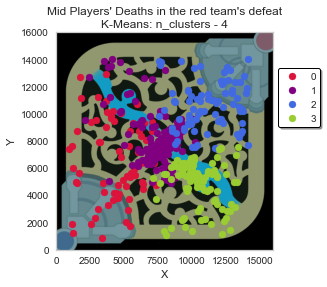

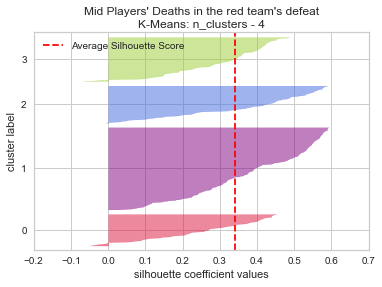

Silhouette score: 0.34061719358408077
1    192
3    103
2     87
0     74
Name: cluster, dtype: int64

Inertia: 512.7610489954354

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4526.527027   6583.824324   0.770270
1        1   7628.473958   8174.937500  -0.588542
2        2  11100.827586  10597.057471   0.655172
3        3  10456.640777   4881.330097   0.145631

In [1286]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "purple", "royalblue", "yellowgreen"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [1287]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1829.201223   2832.066581   0.420659
1        1   1418.999985   1710.565275   0.492098
2        2   1832.272035   1706.725657   0.475312
3        3   1428.923682   1613.447057   0.729513

In [1288]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            7991.0             931.0           12944.0   
1        1           10282.0            2157.0           14036.0   
2        2           14135.0            7554.0           14073.0   
3        3           13390.0            7174.0            7590.0   

   min coordinate_y  max timestamp  min timestamp  
0             836.0              1              0  
1            4913.0              0             -1  
2            7481.0              1              0  
3            1084.0              1             -1

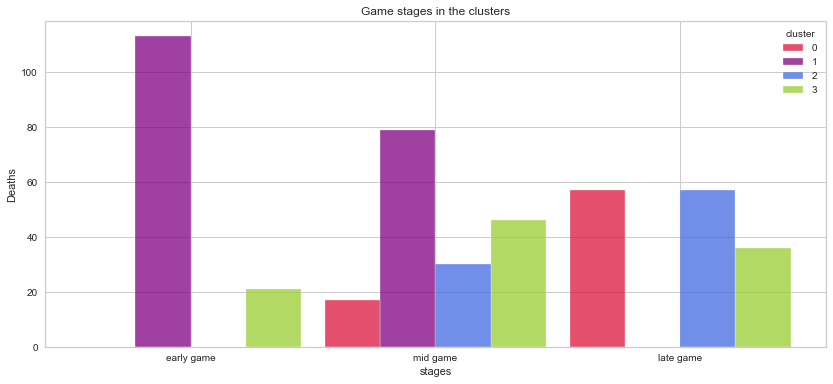

In [1289]:
stagesPerClusterV2(redSideDefeat_df, colors)

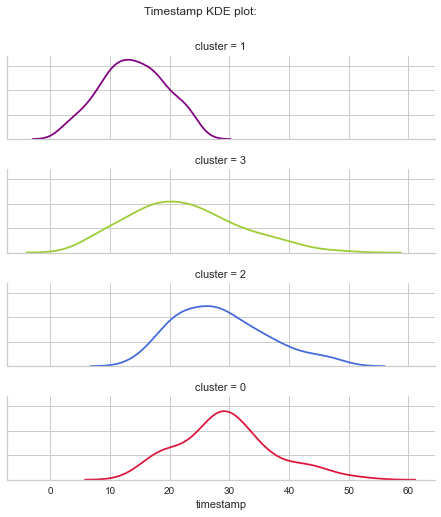

In [1290]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1291]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Pantheon           11
Sylas              10
AurelionSol         9
Akali               4
Neeko               3
Katarina            3
Orianna             2
Ahri                2
Heimerdinger        2
Anivia              1
Fizz                1
Malzahar            1
Qiyana              1
Cassiopeia          1
Kassadin            1

Deaths with each champion:

In [1292]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Pantheon        112
Sylas            85
AurelionSol      71
Katarina         29
Akali            29
Neeko            25
Ahri             20
Heimerdinger     20
Orianna          14
Fizz             12
Qiyana           11
Malzahar         10
Anivia            8
Cassiopeia        6
Kassadin          4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1293]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 15 champions when they won on the red side

Cluster 0 - died with 13 champions:
 ['Ahri' 'Akali' 'Anivia' 'AurelionSol' 'Cassiopeia' 'Fizz' 'Heimerdinger'
 'Katarina' 'Malzahar' 'Neeko' 'Pantheon' 'Qiyana' 'Sylas']
Sylas           17
Pantheon        15
AurelionSol      7
Heimerdinger     7
Katarina         5
Akali            5
Anivia           5
Ahri             4
Malzahar         3
Fizz             2
Neeko            2
Qiyana           1
Cassiopeia       1
Name: champion, dtype: int64

Cluster 1 - died with 14 champions:
 ['Ahri' 'Akali' 'AurelionSol' 'Cassiopeia' 'Fizz' 'Heimerdinger'
 'Kassadin' 'Katarina' 'Malzahar' 'Neeko' 'Orianna' 'Pantheon' 'Qiyana'
 'Sylas']
Pantheon        46
AurelionSol     33
Sylas           33
Neeko           17
Ahri            12
Katarina        11
Akali            8
Orianna          7
Heimerdinger     6
Qiyana           5
Fizz             4
Malzahar         4
Cassiopeia       4
Kassadin         2
Name: champion, dtype: int64



---
#### Clustering Blue Team Victory

In [1294]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

blueSideVictory_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team      summoner region     champion  timestamp  \
105123  EUW1_6283159178  Blue   anonymous 6   euw1  AurelionSol  10.700167   
105130  EUW1_6283159178  Blue   anonymous 6   euw1  AurelionSol  13.939267   
105138  EUW1_6283159178  Blue   anonymous 6   euw1  AurelionSol  17.681483   
105141  EUW1_6283159178  Blue   anonymous 6   euw1  AurelionSol  19.489317   
105145  EUW1_6283159178  Blue   anonymous 6   euw1  AurelionSol  21.778717   
...                 ...   ...           ...    ...          ...        ...   
621724  EUW1_6289424451  Blue  anonymous 11   euw1     Pantheon  20.659850   
621727  EUW1_6289424451  Blue  anonymous 11   euw1     Pantheon  22.135867   
621730  EUW1_6289424451  Blue  anonymous 11   euw1     Pantheon  24.115583   
621732  EUW1_6289424451  Blue  anonymous 11   euw1     Pantheon  25.881033   
621742  EUW1_6289424451  Blue  anonymous 11   euw1     Pantheon  29.228933   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
105123        6494.0        6488.0    NaN            NaN  ...   
105130        7566.0        7466.0    NaN            NaN  ...   
105138        8714.0        8515.0    NaN            NaN  ...   
105141        6832.0        6466.0    NaN            NaN  ...   
105145        6001.0        6257.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
621724        9009.0        2176.0    NaN            NaN  ...   
621727        7740.0        1052.0    NaN            NaN  ...   
621730        1154.0        7168.0    NaN            NaN  ...   
621732        4782.0        4462.0    NaN            NaN  ...   
621742        4929.0        9335.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
105123              NaN     True      Death        NaN           NaN   NaN   
105130              NaN     True      Death        NaN           NaN   NaN   
105138              NaN     True      Death        NaN           NaN   NaN   
105141              NaN     True      Death        NaN           NaN   NaN   
105145              NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
621724              NaN     True      Death        NaN           NaN   NaN   
621727              NaN     True      Death        NaN           NaN   NaN   
621730              NaN     True      Death        NaN           NaN   NaN   
621732              NaN     True      Death        NaN           NaN   NaN   
621742              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
105123      NaN       NaN  MIDDLE  Iron  
105130      NaN       NaN  MIDDLE  Iron  
105138      NaN       NaN  MIDDLE  Iron  
105141      NaN       NaN  MIDDLE  Iron  
105145      NaN       NaN  MIDDLE  Iron  
...         ...       ...     ...   ...  
621724      NaN       NaN  MIDDLE  Iron  
621727      NaN       NaN  MIDDLE  Iron  
621730      NaN       NaN  MIDDLE  Iron  
621732      NaN       NaN  MIDDLE  Iron  
621742      NaN       NaN  MIDDLE  Iron  

[351 rows x 56 columns]

In [1295]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == True)].copy()

In [1296]:
blueSideGames_df = middle_deaths_df[middle_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [1297]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

59

In [1298]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

54.629629629629626

In [1299]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_middle_deaths_df.shape[0]) * 100
winRateBlueSide

6.790481717933837

In [1300]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 11 won 13 matches on the blue side
anonymous 11 has an average of 7.384615384615385 deaths per game when winning on the blue side

anonymous 14 won 19 matches on the blue side
anonymous 14 has an average of 4.894736842105263 deaths per game when winning on the blue side

anonymous 20 won 15 matches on the blue side
anonymous 20 has an average of 5.4 deaths per game when winning on the blue side

anonymous 6 won 12 matches on the blue side
anonymous 6 has an average of 6.75 deaths per game when winning on the blue side



In [1301]:
print("Victory games on blue side contains {} matches in which the middle died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 59 matches in which the middle died at least once
4 players died a total of 351 times on the blue side
Victory games on blue side contains an average of 5.9491525423728815 deaths per game


In [1302]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
105123        6494.0        6488.0  10.700167
105130        7566.0        7466.0  13.939267
105138        8714.0        8515.0  17.681483
105141        6832.0        6466.0  19.489317
105145        6001.0        6257.0  21.778717
...              ...           ...        ...
621724        9009.0        2176.0  20.659850
621727        7740.0        1052.0  22.135867
621730        1154.0        7168.0  24.115583
621732        4782.0        4462.0  25.881033
621742        4929.0        9335.0  29.228933

[351 rows x 3 columns]

Time discretization

In [1303]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1304]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1305]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [1306]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [1307]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
105123     -0.552436     -0.510810         -1
105130     -0.182170     -0.133057         -1
105138      0.214346      0.272119          0
105141     -0.435692     -0.519307          0
105145     -0.722717     -0.600033          0
...              ...           ...        ...
621724      0.316238     -2.176320          0
621727     -0.122071     -2.610465          0
621730     -2.396858     -0.248160          0
621732     -1.143756     -1.293352          1
621742     -1.092983      0.588844          1

[351 rows x 3 columns]

In [1308]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.32071197633936116
Silhouette score for k=3: 0.33041089307760685
Silhouette score for k=4: 0.3699445319121189
Silhouette score for k=5: 0.36676577949628497
Silhouette score for k=6: 0.36410566849263043
Silhouette score for k=7: 0.3656434386392928
Silhouette score for k=8: 0.3441073201552191
Silhouette score for k=9: 0.3793777576874363
Silhouette score for k=10: 0.3651634619723742
Silhouette score for k=11: 0.3737023735989059
Silhouette score for k=12: 0.3427195099743845
Silhouette score for k=13: 0.34305442079818066
Silhouette score for k=14: 0.3567515733954241
Silhouette score for k=15: 0.35141137486653107
Silhouette score for k=16: 0.3570376135363414
Silhouette score for k=17: 0.36008222882303365
Silhouette score for k=18: 0.37342356737457333
Silhouette score for k=19: 0.362063124142323
Silhouette score for k=20: 0.3772921381300801
Silhouette score for k=25: 0.3936080922661753


K-Means with k = 4

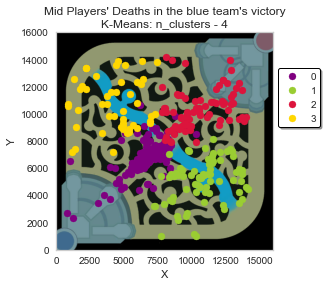

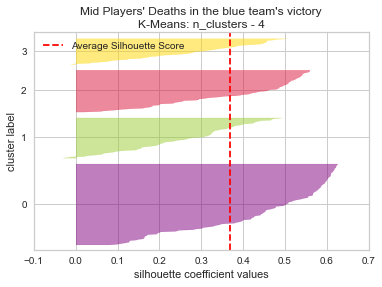

Silhouette score: 0.3699445319121189
0    150
2     78
1     75
3     48
Name: cluster, dtype: int64

Inertia: 366.2993322304696

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   6716.446667   6917.220000  -0.573333
1        1  10772.200000   5067.600000  -0.040000
2        2  10520.666667  10383.205128   0.410256
3        3   4266.604167  10707.020833   0.437500

In [1309]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "yellowgreen", "crimson", "gold"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [1310]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1402.450192   1258.475230   0.625531
1        1   1780.867744   1581.191492   0.701237
2        2   1824.806731   1430.823148   0.517288
3        3   1851.125072   1854.174429   0.704339

In [1311]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           10281.0             830.0           10628.0   
1        1           14116.0            7215.0            8143.0   
2        2           13974.0            7778.0           14164.0   
3        3            7462.0             868.0           13917.0   

   min coordinate_y  max timestamp  min timestamp  
0            2354.0              1             -1  
1             996.0              1             -1  
2            7955.0              1             -1  
3            7168.0              1             -1

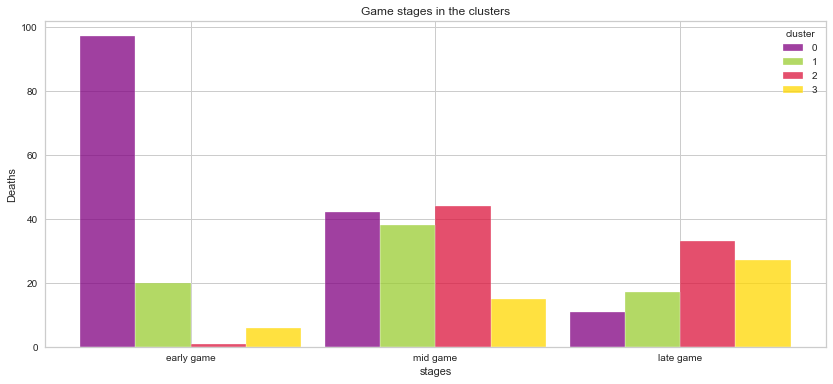

In [1312]:
stagesPerClusterV2(blueSideVictory_df, colors)

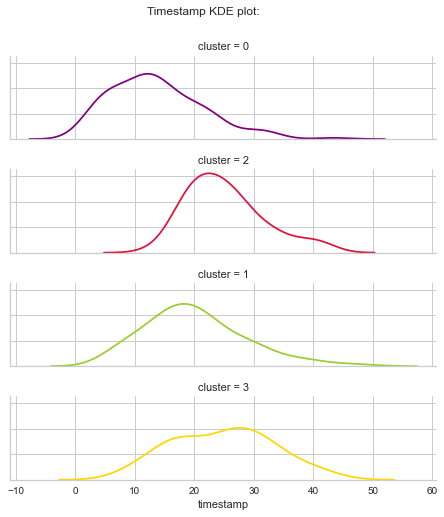

In [1313]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1314]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Akali             17
Sylas             12
Pantheon          12
AurelionSol        7
Malzahar           2
Vex                2
Galio              2
Neeko              1
Veigar             1
Katarina           1
Lissandra          1
Ahri               1

Deaths with each champion:

In [1315]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Pantheon       92
Akali          79
Sylas          59
AurelionSol    40
Galio          15
Vex            13
Malzahar       12
Ahri           10
Lissandra       9
Katarina        9
Neeko           7
Veigar          6
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1316]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 12 champions when they won on the red side

Cluster 0 - died with 12 champions:
 ['Ahri' 'Akali' 'AurelionSol' 'Galio' 'Katarina' 'Lissandra' 'Malzahar'
 'Neeko' 'Pantheon' 'Sylas' 'Veigar' 'Vex']
Pantheon       44
Akali          31
AurelionSol    22
Sylas          19
Malzahar        9
Ahri            5
Lissandra       5
Vex             4
Galio           4
Veigar          3
Katarina        2
Neeko           2
Name: champion, dtype: int64

Cluster 1 - died with 10 champions:
 ['Akali' 'AurelionSol' 'Galio' 'Katarina' 'Lissandra' 'Malzahar' 'Neeko'
 'Pantheon' 'Sylas' 'Vex']
Akali          22
Pantheon       21
Sylas          13
AurelionSol     7
Katarina        3
Vex             3
Galio           2
Neeko           2
Lissandra       1
Malzahar        1
Name: champion, dtype: int64

Cluster 2 - died with 11 champions:
 ['Ahri' 'Akali' 'AurelionSol' 'Galio' 'Katarina' 'Lissandra' 'Malzahar'
 'Pantheon' 'Sylas' 'Veigar' 'Vex']
Akali          16
Sylas          16
P

---
#### Clustering Blue Team Defeat

In [1317]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

blueSideDefeat_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team      summoner region     champion  timestamp  \
105497  EUW1_6281923264  Blue   anonymous 6   euw1  AurelionSol  11.684217   
105503  EUW1_6281923264  Blue   anonymous 6   euw1  AurelionSol  15.420567   
105505  EUW1_6281923264  Blue   anonymous 6   euw1  AurelionSol  16.750233   
105508  EUW1_6281923264  Blue   anonymous 6   euw1  AurelionSol  18.789267   
105512  EUW1_6281923264  Blue   anonymous 6   euw1  AurelionSol  21.017917   
...                 ...   ...           ...    ...          ...        ...   
622167  EUW1_6289384612  Blue  anonymous 14   euw1   Cassiopeia  25.107850   
622175  EUW1_6289384612  Blue  anonymous 14   euw1   Cassiopeia  28.218817   
622177  EUW1_6289384612  Blue  anonymous 14   euw1   Cassiopeia  29.369983   
622184  EUW1_6289384612  Blue  anonymous 14   euw1   Cassiopeia  32.042333   
622186  EUW1_6289384612  Blue  anonymous 14   euw1   Cassiopeia  33.108650   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
105497        6334.0        6984.0    NaN            NaN  ...   
105503        7442.0        3963.0    NaN            NaN  ...   
105505        7292.0        4694.0    NaN            NaN  ...   
105508        7857.0        7393.0    NaN            NaN  ...   
105512        5152.0        4656.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
622167       11057.0        6831.0    NaN            NaN  ...   
622175        4827.0        5451.0    NaN            NaN  ...   
622177        6882.0        7371.0    NaN            NaN  ...   
622184        9917.0        4075.0    NaN            NaN  ...   
622186        2104.0        2025.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
105497              NaN    False      Death        NaN           NaN   NaN   
105503              NaN    False      Death        NaN           NaN   NaN   
105505              NaN    False      Death        NaN           NaN   NaN   
105508              NaN    False      Death        NaN           NaN   NaN   
105512              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
622167              NaN    False      Death        NaN           NaN   NaN   
622175              NaN    False      Death        NaN           NaN   NaN   
622177              NaN    False      Death        NaN           NaN   NaN   
622184              NaN    False      Death        NaN           NaN   NaN   
622186              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
105497      NaN       NaN  MIDDLE  Iron  
105503      NaN       NaN  MIDDLE  Iron  
105505      NaN       NaN  MIDDLE  Iron  
105508      NaN       NaN  MIDDLE  Iron  
105512      NaN       NaN  MIDDLE  Iron  
...         ...       ...     ...   ...  
622167      NaN       NaN  MIDDLE  Iron  
622175      NaN       NaN  MIDDLE  Iron  
622177      NaN       NaN  MIDDLE  Iron  
622184      NaN       NaN  MIDDLE  Iron  
622186      NaN       NaN  MIDDLE  Iron  

[396 rows x 56 columns]

In [1318]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == False)].copy()

In [1319]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 11 lost 5 matches on the blue side
anonymous 11 has an average of 8.4 deaths per game when losing on the blue side

anonymous 14 lost 19 matches on the blue side
anonymous 14 has an average of 7.2631578947368425 deaths per game when losing on the blue side

anonymous 20 lost 13 matches on the blue side
anonymous 20 has an average of 7.923076923076923 deaths per game when losing on the blue side

anonymous 6 lost 12 matches on the blue side
anonymous 6 has an average of 9.416666666666666 deaths per game when losing on the blue side



In [1320]:
print("Defeat games on blue side contains {} matches in which the middle died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 49 matches in which the middle died at least once
4 players died a total of 396 times on the blue side
Defeat games on blue side contains an average of 8.081632653061224 deaths per game


In [1321]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
105497        6334.0        6984.0  11.684217
105503        7442.0        3963.0  15.420567
105505        7292.0        4694.0  16.750233
105508        7857.0        7393.0  18.789267
105512        5152.0        4656.0  21.017917
...              ...           ...        ...
622167       11057.0        6831.0  25.107850
622175        4827.0        5451.0  28.218817
622177        6882.0        7371.0  29.369983
622184        9917.0        4075.0  32.042333
622186        2104.0        2025.0  33.108650

[396 rows x 3 columns]

Time discretization

In [1322]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1323]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1324]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [1325]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [1326]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
105497     -0.144535      0.197461         -1
105503      0.255683     -0.967613          0
105505      0.201502     -0.685697          0
105508      0.405584      0.355195          0
105512     -0.571482     -0.700352          0
...              ...           ...        ...
622167      1.561448      0.138455          1
622175     -0.688875     -0.393753          1
622177      0.053407      0.346711          1
622184      1.149671     -0.924419          1
622186     -1.672443     -1.715019          1

[396 rows x 3 columns]

In [1327]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.27762346814263117
Silhouette score for k=3: 0.30731676595191854
Silhouette score for k=4: 0.339932356026367
Silhouette score for k=5: 0.3680250761799071
Silhouette score for k=6: 0.3529512860145993
Silhouette score for k=7: 0.36288282772466174
Silhouette score for k=8: 0.36413994027883667
Silhouette score for k=9: 0.37217874694892306
Silhouette score for k=10: 0.3774558207666503
Silhouette score for k=11: 0.3752927434078381
Silhouette score for k=12: 0.38379622848943834
Silhouette score for k=13: 0.3744215614778923
Silhouette score for k=14: 0.39247884246550346
Silhouette score for k=15: 0.3841111721808647
Silhouette score for k=16: 0.36687210257580455
Silhouette score for k=17: 0.37340412680899565
Silhouette score for k=18: 0.34584909893065163
Silhouette score for k=19: 0.3856941696202032
Silhouette score for k=20: 0.36862078316484687
Silhouette score for k=25: 0.3632857493840375


K-Means with k = 4

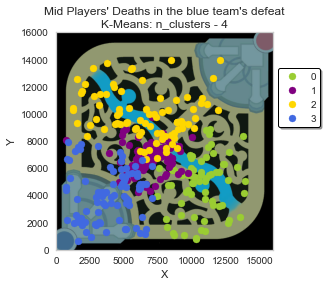

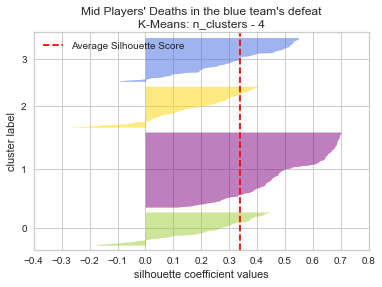

Silhouette score: 0.339932356026367
1    154
3     90
2     84
0     68
Name: cluster, dtype: int64

Inertia: 450.63707061518164

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10639.088235   4773.926471   0.117647
1        1   6743.857143   6704.220779  -0.662338
2        2   6543.619048   9910.428571   0.476190
3        3   3944.944444   4148.388889   0.600000

In [1328]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "purple", "gold", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [1329]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1536.327293   2069.694723   0.738229
1        1   1180.892962    928.194710   0.472913
2        2   2751.412105   1725.401025   0.698232
3        3   1775.977943   1841.038926   0.512076

In [1330]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13920.0            7442.0            8919.0   
1        1           10019.0             728.0            9784.0   
2        2           12058.0            1244.0           13999.0   
3        3            7069.0             705.0            7908.0   

   min coordinate_y  max timestamp  min timestamp  
0             808.0              1             -1  
1            4258.0              0             -1  
2            6694.0              1             -1  
3             614.0              1             -1

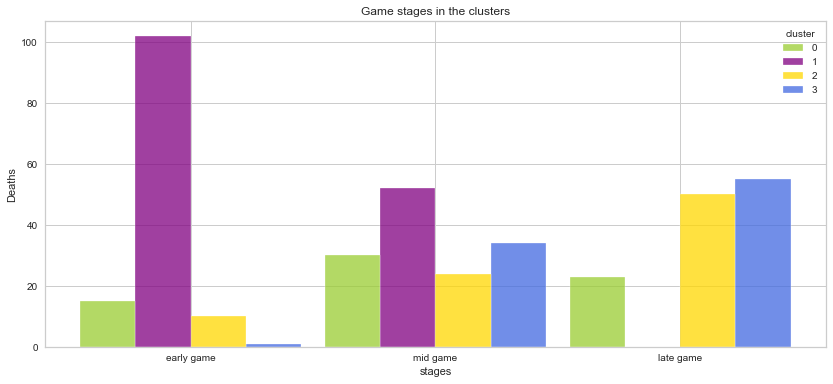

In [1331]:
stagesPerClusterV2(blueSideDefeat_df, colors)

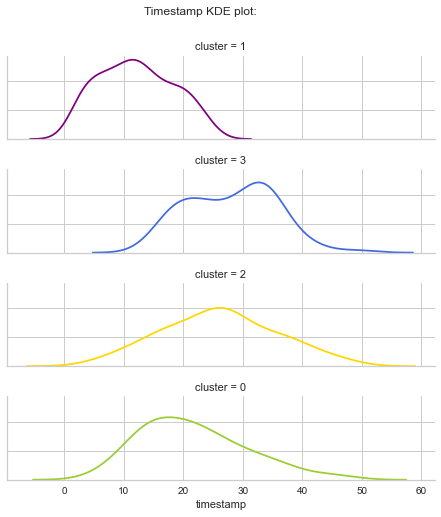

In [1332]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1333]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Akali              15
Sylas              11
AurelionSol         8
Malzahar            4
Galio               3
Pantheon            2
Neeko               1
Lissandra           1
Vex                 1
Ahri                1
Heimerdinger        1
Cassiopeia          1

Deaths with each champion:

In [1334]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Akali           99
Sylas           89
AurelionSol     74
Malzahar        36
Galio           25
Pantheon        20
Ahri            14
Cassiopeia      12
Lissandra       10
Neeko            7
Heimerdinger     6
Vex              4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1335]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 12 champions when they won on the red side

Cluster 0 - died with 11 champions:
 ['Ahri' 'Akali' 'AurelionSol' 'Cassiopeia' 'Galio' 'Lissandra' 'Malzahar'
 'Neeko' 'Pantheon' 'Sylas' 'Vex']
Akali          21
Sylas          16
AurelionSol    10
Lissandra       4
Galio           3
Malzahar        3
Neeko           3
Cassiopeia      3
Vex             2
Pantheon        2
Ahri            1
Name: champion, dtype: int64

Cluster 1 - died with 11 champions:
 ['Ahri' 'Akali' 'AurelionSol' 'Cassiopeia' 'Galio' 'Heimerdinger'
 'Lissandra' 'Malzahar' 'Pantheon' 'Sylas' 'Vex']
AurelionSol     34
Akali           31
Sylas           30
Malzahar        19
Galio           16
Pantheon        10
Cassiopeia       6
Heimerdinger     4
Vex              2
Ahri             1
Lissandra        1
Name: champion, dtype: int64

Cluster 2 - died with 10 champions:
 ['Ahri' 'Akali' 'AurelionSol' 'Cassiopeia' 'Galio' 'Lissandra' 'Malzahar'
 'Neeko' 'Pantheon' 'Sylas']
Sylas          32
Akal

---
### Bronze Players

#### Clustering Red Team Victory

In [1336]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

redSideVictory_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region     champion  timestamp  \
387128  EUW1_6283680852  Red   anonymous 95   euw1  AurelionSol   4.712900   
387134  EUW1_6283680852  Red   anonymous 95   euw1  AurelionSol   7.341783   
387139  EUW1_6283680852  Red   anonymous 95   euw1  AurelionSol   9.579267   
387143  EUW1_6283680852  Red   anonymous 95   euw1  AurelionSol  11.165783   
387146  EUW1_6283680852  Red   anonymous 95   euw1  AurelionSol  12.709417   
...                 ...  ...            ...    ...          ...        ...   
637738  EUW1_6289906751  Red  anonymous 117   euw1        Akali  13.373817   
637742  EUW1_6289906751  Red  anonymous 117   euw1        Akali  15.927417   
637763  EUW1_6289906751  Red  anonymous 117   euw1        Akali  24.912750   
637766  EUW1_6289906751  Red  anonymous 117   euw1        Akali  26.603917   
637774  EUW1_6289906751  Red  anonymous 117   euw1        Akali  28.891683   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
387128        7854.0        7972.0    NaN            NaN  ...   
387134        8436.0        8486.0    NaN            NaN  ...   
387139        1039.0       12155.0    NaN            NaN  ...   
387143        8050.0        7768.0    NaN            NaN  ...   
387146        8601.0        4549.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
637738        8038.0        5308.0    NaN            NaN  ...   
637742        5632.0        9395.0    NaN            NaN  ...   
637763       10965.0        5028.0    NaN            NaN  ...   
637766        6994.0        3044.0    NaN            NaN  ...   
637774        6793.0        4848.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
387128              NaN     True      Death        NaN           NaN   NaN   
387134              NaN     True      Death        NaN           NaN   NaN   
387139              NaN     True      Death        NaN           NaN   NaN   
387143              NaN     True      Death        NaN           NaN   NaN   
387146              NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
637738              NaN     True      Death        NaN           NaN   NaN   
637742              NaN     True      Death        NaN           NaN   NaN   
637763              NaN     True      Death        NaN           NaN   NaN   
637766              NaN     True      Death        NaN           NaN   NaN   
637774              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
387128      NaN       NaN  MIDDLE  Bronze  
387134      NaN       NaN  MIDDLE  Bronze  
387139      NaN       NaN  MIDDLE  Bronze  
387143      NaN       NaN  MIDDLE  Bronze  
387146      NaN       NaN  MIDDLE  Bronze  
...         ...       ...     ...     ...  
637738      NaN       NaN  MIDDLE  Bronze  
637742      NaN       NaN  MIDDLE  Bronze  
637763      NaN       NaN  MIDDLE  Bronze  
637766      NaN       NaN  MIDDLE  Bronze  
637774      NaN       NaN  MIDDLE  Bronze  

[645 rows x 56 columns]

In [1337]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == True)].copy()

In [1338]:
redSideGames_df = middle_deaths_df[middle_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [1339]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

116

In [1340]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

51.78571428571429

In [1341]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_middle_deaths_df.shape[0]) * 100
winRateRedSide

11.143745680718729

In [1342]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 104 won 26 matches on the red side
anonymous 104 has an average of 4.538461538461538 deaths per game when winning on the red side

anonymous 105 won 21 matches on the red side
anonymous 105 has an average of 4.0 deaths per game when winning on the red side

anonymous 111 won 10 matches on the red side
anonymous 111 has an average of 8.3 deaths per game when winning on the red side

anonymous 113 won 8 matches on the red side
anonymous 113 has an average of 8.5 deaths per game when winning on the red side

anonymous 116 won 7 matches on the red side
anonymous 116 has an average of 5.428571428571429 deaths per game when winning on the red side

anonymous 117 won 22 matches on the red side
anonymous 117 has an average of 5.363636363636363 deaths per game when winning on the red side

anonymous 95 won 13 matches on the red side
anonymous 95 has an average of 6.230769230769231 deaths per game when winning on the red side

anonymous 98 won 9 matches on the red side
anonymous 98 has

In [1343]:
print("Victory games on red side contains {} matches in which the middle died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 116 matches in which the middle died at least once
8 players died a total of 645 times on the red side
Victory games on red side contains an average of 5.560344827586207 deaths per game


In [1344]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
387128        7854.0        7972.0   4.712900
387134        8436.0        8486.0   7.341783
387139        1039.0       12155.0   9.579267
387143        8050.0        7768.0  11.165783
387146        8601.0        4549.0  12.709417
...              ...           ...        ...
637738        8038.0        5308.0  13.373817
637742        5632.0        9395.0  15.927417
637763       10965.0        5028.0  24.912750
637766        6994.0        3044.0  26.603917
637774        6793.0        4848.0  28.891683

[645 rows x 3 columns]

Time discretization

In [1345]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1346]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1347]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [1348]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [1349]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
387128      0.225157      0.454574         -1
387134      0.442788      0.632945         -1
387139     -2.323224      1.906178         -1
387143      0.298449      0.383781         -1
387146      0.504488     -0.733292         -1
...              ...           ...        ...
637738      0.293961     -0.469900         -1
637742     -0.605731      0.948390          0
637763      1.388475     -0.567067          0
637766     -0.096429     -1.255564          1
637774     -0.171590     -0.629531          1

[645 rows x 3 columns]

In [1350]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.323035358898324
Silhouette score for k=3: 0.3402712911631688
Silhouette score for k=4: 0.372841367509771
Silhouette score for k=5: 0.38496833548333664
Silhouette score for k=6: 0.3714946079318866
Silhouette score for k=7: 0.34658888670490484
Silhouette score for k=8: 0.35818544420465287
Silhouette score for k=9: 0.36129180900640673
Silhouette score for k=10: 0.36399037024534137
Silhouette score for k=11: 0.36618484885822244
Silhouette score for k=12: 0.33615695353374686
Silhouette score for k=13: 0.33997127505691555
Silhouette score for k=14: 0.33884504963528217
Silhouette score for k=15: 0.35196968698040054
Silhouette score for k=16: 0.35616499810562435
Silhouette score for k=17: 0.36622549947377075
Silhouette score for k=18: 0.36639823842613345
Silhouette score for k=19: 0.3595855579011877
Silhouette score for k=20: 0.37556080626760946
Silhouette score for k=25: 0.368502926583498


K-Means with k = 4

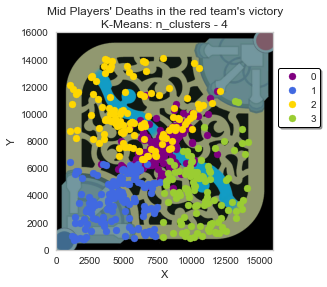

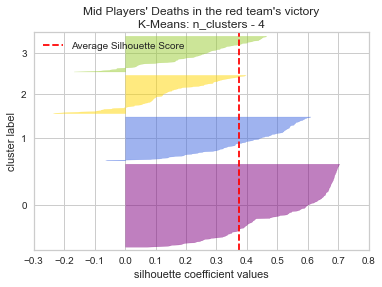

Silhouette score: 0.372841367509771
0    266
1    141
2    123
3    115
Name: cluster, dtype: int64

Inertia: 687.0667880542925

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   7923.368421   7763.943609  -0.748120
1        1   4499.758865   3630.049645   0.546099
2        2   5842.943089   9954.325203   0.398374
3        3  10579.956522   4309.695652   0.130435

In [1351]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "royalblue", "gold", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [1352]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1198.067833   1138.085684   0.434093
1        1   1764.369555   1647.389951   0.511917
2        2   2534.468717   1978.363623   0.683604
3        3   1604.694322   2203.993629   0.740408

In [1353]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           11881.0            3327.0           11683.0   
1        1            7622.0            1048.0            6478.0   
2        2           12040.0            1027.0           14080.0   
3        3           14118.0            7864.0           10914.0   

   min coordinate_y  max timestamp  min timestamp  
0            4549.0              0             -1  
1             699.0              1             -1  
2            6647.0              1             -1  
3             847.0              1             -1

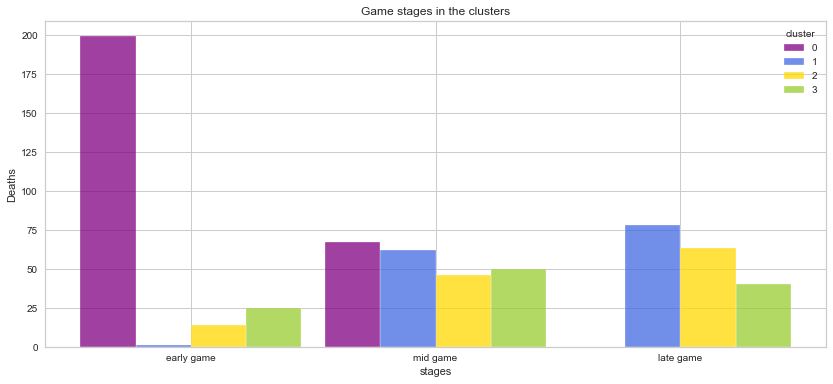

In [1354]:
stagesPerClusterV2(redSideVictory_df, colors)

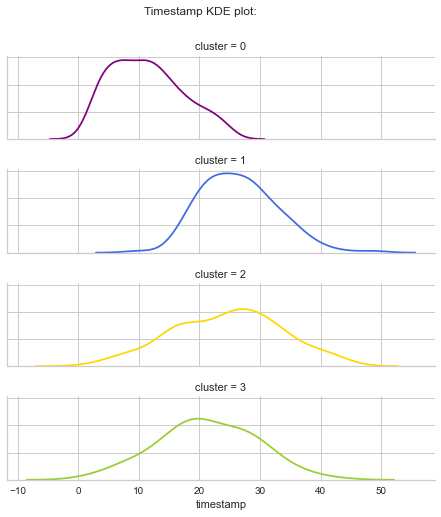

In [1355]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1356]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Katarina          23
Vex               23
Yasuo             21
Akali             10
AurelionSol        9
Yone               6
Velkoz             5
Anivia             3
Zed                2
Ryze               2
Viktor             2
Karthus            2
Annie              1
Jayce              1
DrMundo            1
Orianna            1
Ahri               1
Irelia             1
Vladimir           1
Graves             1

Deaths with each champion:

In [1357]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Katarina       131
Vex            114
Yasuo           98
Akali           54
AurelionSol     50
Velkoz          33
Yone            24
Karthus         21
Viktor          18
Ahri            15
Anivia          14
DrMundo         13
Irelia          13
Zed             11
Annie            8
Jayce            8
Vladimir         7
Orianna          6
Ryze             6
Graves           1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1358]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 20 champions when they won on the red side

Cluster 0 - died with 20 champions:
 ['Ahri' 'Akali' 'Anivia' 'Annie' 'AurelionSol' 'DrMundo' 'Graves' 'Irelia'
 'Jayce' 'Karthus' 'Katarina' 'Orianna' 'Ryze' 'Velkoz' 'Vex' 'Viktor'
 'Vladimir' 'Yasuo' 'Yone' 'Zed']
Vex            51
Katarina       43
Yasuo          40
AurelionSol    21
Velkoz         21
Akali          20
Yone           10
Anivia          9
Irelia          7
Annie           7
Viktor          6
Ahri            6
DrMundo         6
Karthus         5
Orianna         3
Ryze            3
Zed             3
Jayce           2
Vladimir        2
Graves          1
Name: champion, dtype: int64

Cluster 1 - died with 19 champions:
 ['Ahri' 'Akali' 'Anivia' 'Annie' 'AurelionSol' 'DrMundo' 'Irelia' 'Jayce'
 'Karthus' 'Katarina' 'Orianna' 'Ryze' 'Velkoz' 'Vex' 'Viktor' 'Vladimir'
 'Yasuo' 'Yone' 'Zed']
Vex            43
Katarina       26
Yasuo          19
Akali          12
AurelionSol     8
DrMundo         6
Velko

---
#### Clustering Red Team Defeat

In [1359]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

redSideDefeat_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region     champion  timestamp  \
386909  EUW1_6283979233  Red   anonymous 95   euw1  AurelionSol   2.484683   
386914  EUW1_6283979233  Red   anonymous 95   euw1  AurelionSol   4.382500   
386917  EUW1_6283979233  Red   anonymous 95   euw1  AurelionSol   5.718167   
386922  EUW1_6283979233  Red   anonymous 95   euw1  AurelionSol   7.862983   
386930  EUW1_6283979233  Red   anonymous 95   euw1  AurelionSol  12.753817   
...                 ...  ...            ...    ...          ...        ...   
637693  EUW1_6289932100  Red  anonymous 117   euw1     Katarina  25.105950   
637695  EUW1_6289932100  Red  anonymous 117   euw1     Katarina  26.762667   
637697  EUW1_6289932100  Red  anonymous 117   euw1     Katarina  27.639200   
637701  EUW1_6289932100  Red  anonymous 117   euw1     Katarina  28.726417   
637705  EUW1_6289932100  Red  anonymous 117   euw1     Katarina  30.595933   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
386909        8236.0        7633.0    NaN            NaN  ...   
386914        7932.0        8338.0    NaN            NaN  ...   
386917        7860.0        8033.0    NaN            NaN  ...   
386922        8503.0        5750.0    NaN            NaN  ...   
386930        8843.0        8969.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
637693        6939.0        9375.0    NaN            NaN  ...   
637695       10779.0       12126.0    NaN            NaN  ...   
637697       11886.0       11459.0    NaN            NaN  ...   
637701       11610.0       10759.0    NaN            NaN  ...   
637705       10727.0       11625.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
386909              NaN    False      Death        NaN           NaN   NaN   
386914              NaN    False      Death        NaN           NaN   NaN   
386917              NaN    False      Death        NaN           NaN   NaN   
386922              NaN    False      Death        NaN           NaN   NaN   
386930              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
637693              NaN    False      Death        NaN           NaN   NaN   
637695              NaN    False      Death        NaN           NaN   NaN   
637697              NaN    False      Death        NaN           NaN   NaN   
637701              NaN    False      Death        NaN           NaN   NaN   
637705              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
386909      NaN       NaN  MIDDLE  Bronze  
386914      NaN       NaN  MIDDLE  Bronze  
386917      NaN       NaN  MIDDLE  Bronze  
386922      NaN       NaN  MIDDLE  Bronze  
386930      NaN       NaN  MIDDLE  Bronze  
...         ...       ...     ...     ...  
637693      NaN       NaN  MIDDLE  Bronze  
637695      NaN       NaN  MIDDLE  Bronze  
637697      NaN       NaN  MIDDLE  Bronze  
637701      NaN       NaN  MIDDLE  Bronze  
637705      NaN       NaN  MIDDLE  Bronze  

[884 rows x 56 columns]

In [1360]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == False)].copy()

In [1361]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 104 lost 19 matches on the red side
anonymous 104 has an average of 8.105263157894736 deaths per game when losing on the red side

anonymous 105 lost 21 matches on the red side
anonymous 105 has an average of 5.666666666666667 deaths per game when losing on the red side

anonymous 111 lost 10 matches on the red side
anonymous 111 has an average of 10.6 deaths per game when losing on the red side

anonymous 113 lost 13 matches on the red side
anonymous 113 has an average of 10.846153846153847 deaths per game when losing on the red side

anonymous 116 lost 12 matches on the red side
anonymous 116 has an average of 7.166666666666667 deaths per game when losing on the red side

anonymous 117 lost 19 matches on the red side
anonymous 117 has an average of 8.526315789473685 deaths per game when losing on the red side

anonymous 95 lost 7 matches on the red side
anonymous 95 has an average of 8.0 deaths per game when losing on the red side

anonymous 98 lost 7 matches on the red sid

In [1362]:
print("Defeat games on red side contains {} matches in which the middle died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 108 matches in which the middle died at least once
8 players died a total of 884 times on the red side
Defeat games on red side contains an average of 8.185185185185185 deaths per game


In [1363]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
386909        8236.0        7633.0   2.484683
386914        7932.0        8338.0   4.382500
386917        7860.0        8033.0   5.718167
386922        8503.0        5750.0   7.862983
386930        8843.0        8969.0  12.753817
...              ...           ...        ...
637693        6939.0        9375.0  25.105950
637695       10779.0       12126.0  26.762667
637697       11886.0       11459.0  27.639200
637701       11610.0       10759.0  28.726417
637705       10727.0       11625.0  30.595933

[884 rows x 3 columns]

Time discretization

In [1364]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1365]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1366]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [1367]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [1368]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
386909     -0.224508     -0.084924         -1
386914     -0.336314      0.164419         -1
386917     -0.362794      0.056547         -1
386922     -0.126310     -0.750901         -1
386930     -0.001264      0.387591         -1
...              ...           ...        ...
637693     -0.701521      0.531184          1
637695      0.710761      1.504154          1
637697      1.117896      1.268250          1
637701      1.016388      1.020675          1
637705      0.691637      1.326961          1

[884 rows x 3 columns]

In [1369]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.2868249114970895
Silhouette score for k=3: 0.3379093577126458
Silhouette score for k=4: 0.3685516179954602
Silhouette score for k=5: 0.3757876861269128
Silhouette score for k=6: 0.372568420688531
Silhouette score for k=7: 0.3724055600349859
Silhouette score for k=8: 0.3632326081925828
Silhouette score for k=9: 0.368661199050253
Silhouette score for k=10: 0.36322364180700495
Silhouette score for k=11: 0.37632178184727166
Silhouette score for k=12: 0.37913773166055226
Silhouette score for k=13: 0.38297857231916393
Silhouette score for k=14: 0.35044327859980545
Silhouette score for k=15: 0.3592760716625394
Silhouette score for k=16: 0.3579755985921954
Silhouette score for k=17: 0.3711847987233807
Silhouette score for k=18: 0.38187665291212536
Silhouette score for k=19: 0.3728951092591571
Silhouette score for k=20: 0.38513805385502825
Silhouette score for k=25: 0.39029029804159127


K-Means with k = 4

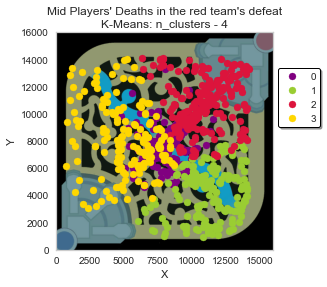

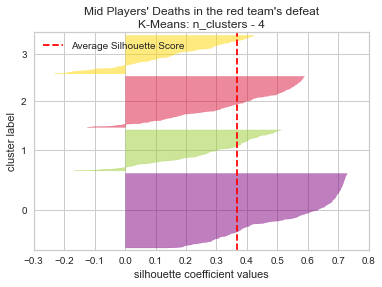

Silhouette score: 0.3685516179954602
0    321
2    220
1    177
3    166
Name: cluster, dtype: int64

Inertia: 911.6842718527796

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8127.068536   7851.492212  -0.778816
1        1  11198.209040   4139.994350  -0.096045
2        2  10810.118182  10721.363636   0.663636
3        3   5127.427711   8120.644578   0.457831

In [1370]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "yellowgreen", "crimson", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [1371]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1026.317939   1115.088332   0.415044
1        1   1813.096557   1795.965990   0.702567
2        2   1756.804512   1857.365557   0.472465
3        3   1974.334182   2546.203292   0.626738

In [1372]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           11531.0            4810.0           13312.0   
1        1           14040.0            6061.0            7678.0   
2        2           14206.0            6309.0           14088.0   
3        3            8722.0             736.0           14019.0   

   min coordinate_y  max timestamp  min timestamp  
0            4621.0              0             -1  
1             940.0              1             -1  
2            6867.0              1              0  
3            3075.0              1             -1

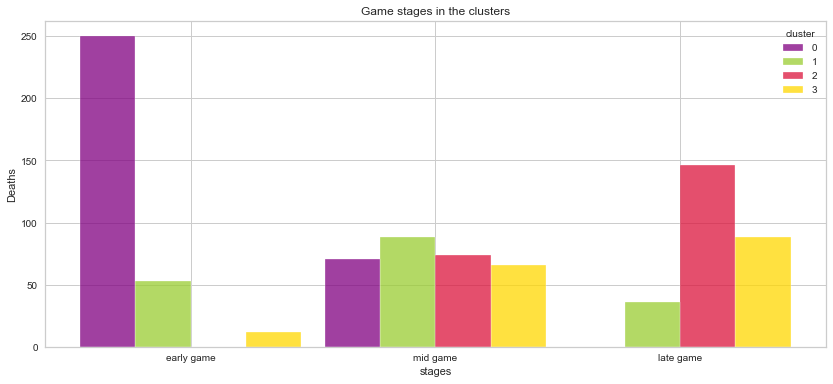

In [1373]:
stagesPerClusterV2(redSideDefeat_df, colors)

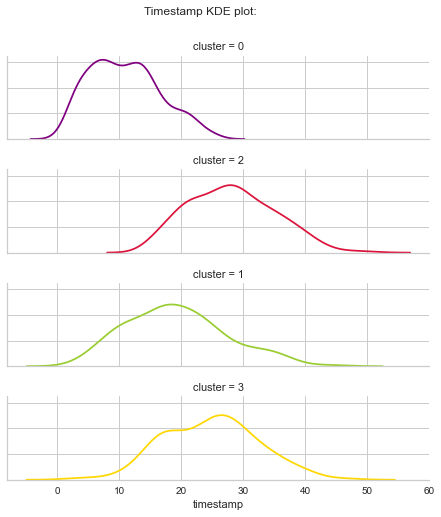

In [1374]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1375]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Katarina          29
Vex               23
Akali             14
Yasuo             13
Yone               6
AurelionSol        5
Velkoz             5
Veigar             4
Anivia             2
Zed                2
Pantheon           1
Ryze               1
Vayne              1
Karma              1
Gangplank          1

Deaths with each champion:

In [1376]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Katarina       278
Vex            173
Yasuo          115
Akali           82
Velkoz          48
Yone            44
AurelionSol     42
Veigar          33
Zed             15
Anivia          12
Gangplank       10
Pantheon         9
Vayne            9
Karma            8
Ryze             6
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1377]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 15 champions when they won on the red side

Cluster 0 - died with 15 champions:
 ['Akali' 'Anivia' 'AurelionSol' 'Gangplank' 'Karma' 'Katarina' 'Pantheon'
 'Ryze' 'Vayne' 'Veigar' 'Velkoz' 'Vex' 'Yasuo' 'Yone' 'Zed']
Katarina       85
Vex            66
Yasuo          49
Akali          32
Velkoz         22
AurelionSol    16
Veigar         12
Yone           12
Pantheon        6
Anivia          6
Gangplank       5
Zed             3
Karma           3
Vayne           3
Ryze            1
Name: champion, dtype: int64

Cluster 1 - died with 13 champions:
 ['Akali' 'Anivia' 'AurelionSol' 'Katarina' 'Pantheon' 'Ryze' 'Vayne'
 'Veigar' 'Velkoz' 'Vex' 'Yasuo' 'Yone' 'Zed']
Katarina       70
Vex            39
Akali          17
Yasuo          14
Yone           10
AurelionSol     6
Zed             5
Velkoz          4
Ryze            3
Vayne           3
Veigar          3
Pantheon        2
Anivia          1
Name: champion, dtype: int64

Cluster 2 - died with 15 champions:
 [

---
#### Clustering Blue Team Victory

In [1378]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

blueSideVictory_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
386989  EUW1_6283810828  Blue   anonymous 95   euw1     Ryze   9.077983   
386993  EUW1_6283810828  Blue   anonymous 95   euw1     Ryze  10.544667   
386998  EUW1_6283810828  Blue   anonymous 95   euw1     Ryze  13.955133   
387004  EUW1_6283810828  Blue   anonymous 95   euw1     Ryze  16.764517   
387010  EUW1_6283810828  Blue   anonymous 95   euw1     Ryze  19.594717   
...                 ...   ...            ...    ...      ...        ...   
636376  EUW1_6289594242  Blue  anonymous 105   euw1  Karthus  19.540700   
636383  EUW1_6289594242  Blue  anonymous 105   euw1  Karthus  21.963317   
636392  EUW1_6289594242  Blue  anonymous 105   euw1  Karthus  25.545783   
636394  EUW1_6289594242  Blue  anonymous 105   euw1  Karthus  26.835117   
636413  EUW1_6289594242  Blue  anonymous 105   euw1  Karthus  32.787967   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
386989        6855.0        6965.0    NaN            NaN  ...   
386993        7467.0        7926.0    NaN            NaN  ...   
386998        6799.0        7372.0    NaN            NaN  ...   
387004        8927.0        5485.0    NaN            NaN  ...   
387010        5930.0        6641.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
636376        7807.0        7206.0    NaN            NaN  ...   
636383       10220.0        5255.0    NaN            NaN  ...   
636392        8353.0        6175.0    NaN            NaN  ...   
636394        5934.0        8797.0    NaN            NaN  ...   
636413       13932.0       11397.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
386989              NaN     True      Death        NaN           NaN   NaN   
386993              NaN     True      Death        NaN           NaN   NaN   
386998              NaN     True      Death        NaN           NaN   NaN   
387004              NaN     True      Death        NaN           NaN   NaN   
387010              NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
636376              NaN     True      Death        NaN           NaN   NaN   
636383              NaN     True      Death        NaN           NaN   NaN   
636392              NaN     True      Death        NaN           NaN   NaN   
636394              NaN     True      Death        NaN           NaN   NaN   
636413              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
386989      NaN       NaN  MIDDLE  Bronze  
386993      NaN       NaN  MIDDLE  Bronze  
386998      NaN       NaN  MIDDLE  Bronze  
387004      NaN       NaN  MIDDLE  Bronze  
387010      NaN       NaN  MIDDLE  Bronze  
...         ...       ...     ...     ...  
636376      NaN       NaN  MIDDLE  Bronze  
636383      NaN       NaN  MIDDLE  Bronze  
636392      NaN       NaN  MIDDLE  Bronze  
636394      NaN       NaN  MIDDLE  Bronze  
636413      NaN       NaN  MIDDLE  Bronze  

[642 rows x 56 columns]

In [1379]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == True)].copy()

In [1380]:
blueSideGames_df = middle_deaths_df[middle_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [1381]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

114

In [1382]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

54.02843601895735

In [1383]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_middle_deaths_df.shape[0]) * 100
winRateBlueSide

12.420197330237958

In [1384]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 104 won 27 matches on the blue side
anonymous 104 has an average of 5.111111111111111 deaths per game when winning on the blue side

anonymous 105 won 14 matches on the blue side
anonymous 105 has an average of 4.214285714285714 deaths per game when winning on the blue side

anonymous 111 won 13 matches on the blue side
anonymous 111 has an average of 8.0 deaths per game when winning on the blue side

anonymous 113 won 8 matches on the blue side
anonymous 113 has an average of 7.875 deaths per game when winning on the blue side

anonymous 116 won 14 matches on the blue side
anonymous 116 has an average of 4.214285714285714 deaths per game when winning on the blue side

anonymous 117 won 17 matches on the blue side
anonymous 117 has an average of 6.411764705882353 deaths per game when winning on the blue side

anonymous 95 won 16 matches on the blue side
anonymous 95 has an average of 5.6875 deaths per game when winning on the blue side

anonymous 98 won 5 matches on the blue 

In [1385]:
print("Victory games on blue side contains {} matches in which the middle died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 114 matches in which the middle died at least once
8 players died a total of 642 times on the blue side
Victory games on blue side contains an average of 5.631578947368421 deaths per game


In [1386]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
386989        6855.0        6965.0   9.077983
386993        7467.0        7926.0  10.544667
386998        6799.0        7372.0  13.955133
387004        8927.0        5485.0  16.764517
387010        5930.0        6641.0  19.594717
...              ...           ...        ...
636376        7807.0        7206.0  19.540700
636383       10220.0        5255.0  21.963317
636392        8353.0        6175.0  25.545783
636394        5934.0        8797.0  26.835117
636413       13932.0       11397.0  32.787967

[642 rows x 3 columns]

Time discretization

In [1387]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1388]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1389]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [1390]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [1391]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
386989     -0.505964     -0.282425         -1
386993     -0.289206      0.082813         -1
386998     -0.525798     -0.127740         -1
387004      0.227895     -0.844913          0
387010     -0.833579     -0.405564          0
...              ...           ...        ...
636376     -0.168786     -0.190830          0
636383      0.685848     -0.932326          0
636392      0.024596     -0.582672          1
636394     -0.832163      0.413845          1
636413      2.000561      1.401999          1

[642 rows x 3 columns]

In [1392]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.33488191177929527
Silhouette score for k=3: 0.36272369675031924
Silhouette score for k=4: 0.37958872932154913
Silhouette score for k=5: 0.3789180629753587
Silhouette score for k=6: 0.37926953157512927
Silhouette score for k=7: 0.3818192927040519
Silhouette score for k=8: 0.3803315242115823
Silhouette score for k=9: 0.37529182979814274
Silhouette score for k=10: 0.3748174027568511
Silhouette score for k=11: 0.3847384331721403
Silhouette score for k=12: 0.3559872819977923
Silhouette score for k=13: 0.3484117492046783
Silhouette score for k=14: 0.3618052828746649
Silhouette score for k=15: 0.3729085082376703
Silhouette score for k=16: 0.3611313425218309
Silhouette score for k=17: 0.362230484637481
Silhouette score for k=18: 0.3752550106533328
Silhouette score for k=19: 0.3747184829980583
Silhouette score for k=20: 0.3877821868621185
Silhouette score for k=25: 0.3745997276892566


K-Means with k = 4

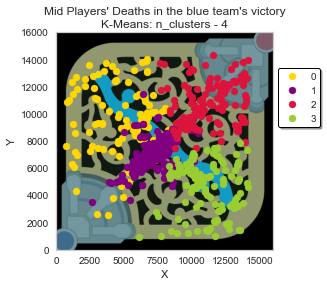

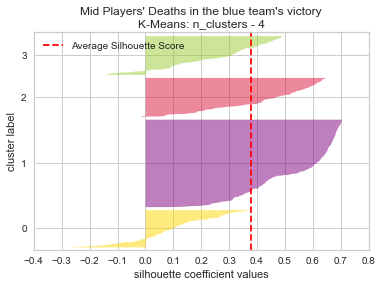

Silhouette score: 0.37958872932154913
1    278
3    123
2    123
0    118
Name: cluster, dtype: int64

Inertia: 662.6316951111023

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5032.432203   9177.601695   0.398305
1        1   7186.604317   7080.568345  -0.726619
2        2  11179.528455  10760.016260   0.626016
3        3  10985.829268   4664.772358   0.065041

In [1393]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "purple", "crimson", "yellowgreen"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [1394]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2121.183678   2550.887367   0.690613
1        1   1129.797697   1072.616441   0.445695
2        2   1740.181050   1590.594765   0.483859
3        3   1682.341089   1795.635992   0.706990

In [1395]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            8435.0             730.0           14011.0   
1        1           10425.0            2635.0           11470.0   
2        2           14109.0            7676.0           14314.0   
3        3           14122.0            6142.0            7880.0   

   min coordinate_y  max timestamp  min timestamp  
0            2527.0              1             -1  
1            3499.0              0             -1  
2            7471.0              1              0  
3             914.0              1             -1

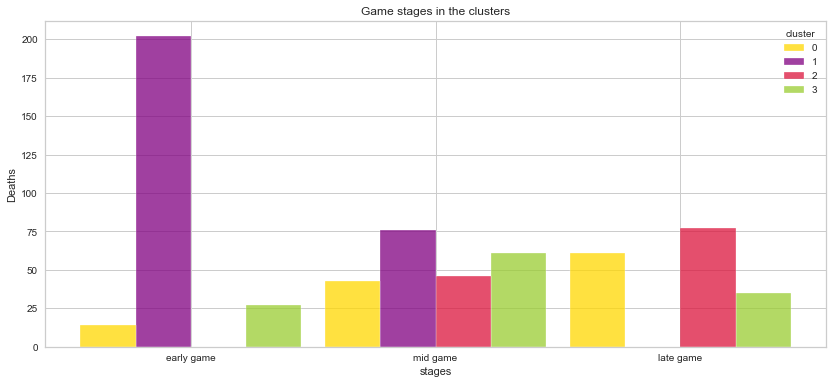

In [1396]:
stagesPerClusterV2(blueSideVictory_df, colors)

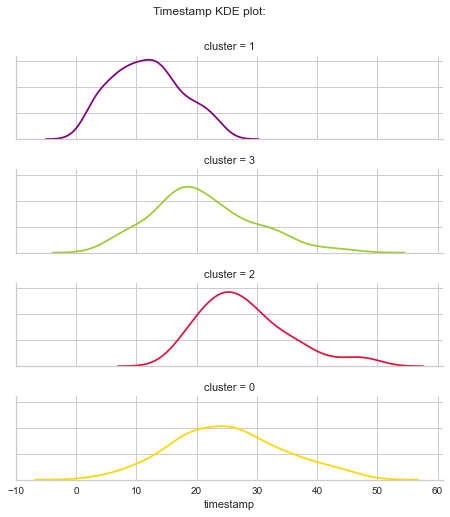

In [1397]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1398]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Katarina          25
Yasuo             24
Vex               22
Akali             14
AurelionSol       10
Velkoz             3
Yone               3
Annie              2
Anivia             1
Zed                1
Veigar             1
Ryze               1
Fizz               1
Corki              1
Lissandra          1
Swain              1
Karthus            1
Bard               1
Graves             1

Deaths with each champion:

In [1399]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Katarina       164
Vex            144
Yasuo          121
Akali           47
AurelionSol     44
Yone            17
Zed             16
Annie           14
Lissandra       12
Velkoz          12
Fizz             8
Corki            7
Ryze             7
Veigar           7
Karthus          7
Swain            6
Bard             5
Anivia           2
Graves           2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1400]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 19 champions when they won on the red side

Cluster 0 - died with 16 champions:
 ['Akali' 'Annie' 'AurelionSol' 'Bard' 'Corki' 'Fizz' 'Graves' 'Karthus'
 'Katarina' 'Lissandra' 'Swain' 'Veigar' 'Vex' 'Yasuo' 'Yone' 'Zed']
Katarina       33
Vex            25
Yasuo          21
AurelionSol     7
Akali           6
Zed             5
Lissandra       4
Annie           3
Corki           3
Yone            2
Fizz            2
Swain           2
Bard            2
Veigar          1
Graves          1
Karthus         1
Name: champion, dtype: int64

Cluster 1 - died with 17 champions:
 ['Akali' 'Anivia' 'Annie' 'AurelionSol' 'Bard' 'Graves' 'Karthus'
 'Katarina' 'Lissandra' 'Ryze' 'Swain' 'Veigar' 'Velkoz' 'Vex' 'Yasuo'
 'Yone' 'Zed']
Vex            69
Katarina       64
Yasuo          44
AurelionSol    27
Akali          24
Yone           10
Annie           8
Lissandra       7
Velkoz          6
Zed             4
Ryze            4
Veigar          4
Bard            2
Karthus  

---
#### Clustering Blue Team Defeat

In [1401]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

blueSideDefeat_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region     champion  timestamp  \
387091  EUW1_6283747909  Blue   anonymous 95   euw1  AurelionSol  18.765200   
387110  EUW1_6283747909  Blue   anonymous 95   euw1  AurelionSol  27.279700   
387348  EUW1_6283478802  Blue   anonymous 95   euw1       Xerath   4.246983   
387368  EUW1_6283478802  Blue   anonymous 95   euw1       Xerath  14.896400   
387371  EUW1_6283478802  Blue   anonymous 95   euw1       Xerath  16.360217   
...                 ...   ...            ...    ...          ...        ...   
637821  EUW1_6289546700  Blue  anonymous 117   euw1          Zed  22.814367   
637828  EUW1_6289546700  Blue  anonymous 117   euw1          Zed  27.106500   
637831  EUW1_6289546700  Blue  anonymous 117   euw1          Zed  28.927933   
637836  EUW1_6289546700  Blue  anonymous 117   euw1          Zed  30.425583   
637843  EUW1_6289546700  Blue  anonymous 117   euw1          Zed  32.952900   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
387091       11760.0        5659.0    NaN            NaN  ...   
387110       11044.0        5612.0    NaN            NaN  ...   
387348        6446.0        6920.0    NaN            NaN  ...   
387368        6228.0        6296.0    NaN            NaN  ...   
387371        5080.0        8456.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
637821        9576.0        5517.0    NaN            NaN  ...   
637828        2598.0        3666.0    NaN            NaN  ...   
637831         777.0        3812.0    NaN            NaN  ...   
637836        7744.0        5126.0    NaN            NaN  ...   
637843         916.0        2444.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
387091              NaN    False      Death        NaN           NaN   NaN   
387110              NaN    False      Death        NaN           NaN   NaN   
387348              NaN    False      Death        NaN           NaN   NaN   
387368              NaN    False      Death        NaN           NaN   NaN   
387371              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
637821              NaN    False      Death        NaN           NaN   NaN   
637828              NaN    False      Death        NaN           NaN   NaN   
637831              NaN    False      Death        NaN           NaN   NaN   
637836              NaN    False      Death        NaN           NaN   NaN   
637843              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
387091      NaN       NaN  MIDDLE  Bronze  
387110      NaN       NaN  MIDDLE  Bronze  
387348      NaN       NaN  MIDDLE  Bronze  
387368      NaN       NaN  MIDDLE  Bronze  
387371      NaN       NaN  MIDDLE  Bronze  
...         ...       ...     ...     ...  
637821      NaN       NaN  MIDDLE  Bronze  
637828      NaN       NaN  MIDDLE  Bronze  
637831      NaN       NaN  MIDDLE  Bronze  
637836      NaN       NaN  MIDDLE  Bronze  
637843      NaN       NaN  MIDDLE  Bronze  

[713 rows x 56 columns]

In [1402]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == False)].copy()

In [1403]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 104 lost 16 matches on the blue side
anonymous 104 has an average of 7.3125 deaths per game when losing on the blue side

anonymous 105 lost 13 matches on the blue side
anonymous 105 has an average of 6.076923076923077 deaths per game when losing on the blue side

anonymous 111 lost 13 matches on the blue side
anonymous 111 has an average of 8.615384615384615 deaths per game when losing on the blue side

anonymous 113 lost 12 matches on the blue side
anonymous 113 has an average of 7.583333333333333 deaths per game when losing on the blue side

anonymous 116 lost 9 matches on the blue side
anonymous 116 has an average of 6.222222222222222 deaths per game when losing on the blue side

anonymous 117 lost 19 matches on the blue side
anonymous 117 has an average of 8.105263157894736 deaths per game when losing on the blue side

anonymous 95 lost 7 matches on the blue side
anonymous 95 has an average of 6.428571428571429 deaths per game when losing on the blue side

anonymous 98 l

In [1404]:
print("Defeat games on blue side contains {} matches in which the middle died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 97 matches in which the middle died at least once
8 players died a total of 713 times on the blue side
Defeat games on blue side contains an average of 7.350515463917525 deaths per game


In [1405]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
387091       11760.0        5659.0  18.765200
387110       11044.0        5612.0  27.279700
387348        6446.0        6920.0   4.246983
387368        6228.0        6296.0  14.896400
387371        5080.0        8456.0  16.360217
...              ...           ...        ...
637821        9576.0        5517.0  22.814367
637828        2598.0        3666.0  27.106500
637831         777.0        3812.0  28.927933
637836        7744.0        5126.0  30.425583
637843         916.0        2444.0  32.952900

[713 rows x 3 columns]

Time discretization

In [1406]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1407]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1408]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [1409]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [1410]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
387091      1.598926     -0.183240          0
387110      1.347770     -0.202193          1
387348     -0.265101      0.325265         -1
387368     -0.341570      0.073634         -1
387371     -0.744262      0.944665          0
...              ...           ...        ...
637821      0.832830     -0.240502          0
637828     -1.614890     -0.986927          1
637831     -2.253654     -0.928052          1
637836      0.190207     -0.398175          1
637843     -2.204896     -1.479705          1

[713 rows x 3 columns]

In [1411]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.30245468186706026
Silhouette score for k=3: 0.3332634466862407
Silhouette score for k=4: 0.34757267097792094
Silhouette score for k=5: 0.33705724879683385
Silhouette score for k=6: 0.344589487410473
Silhouette score for k=7: 0.3597038173796648
Silhouette score for k=8: 0.36588142328860424
Silhouette score for k=9: 0.36305415856773027
Silhouette score for k=10: 0.3533721149661081
Silhouette score for k=11: 0.34413671955114056
Silhouette score for k=12: 0.33961308608487567
Silhouette score for k=13: 0.38053130231611826
Silhouette score for k=14: 0.38523918955497055
Silhouette score for k=15: 0.3713822099211663
Silhouette score for k=16: 0.3802531879768918
Silhouette score for k=17: 0.3881288571496106
Silhouette score for k=18: 0.3850175765467571
Silhouette score for k=19: 0.38830673628626466
Silhouette score for k=20: 0.3954651579773934
Silhouette score for k=25: 0.393776049950002


K-Means with k = 4

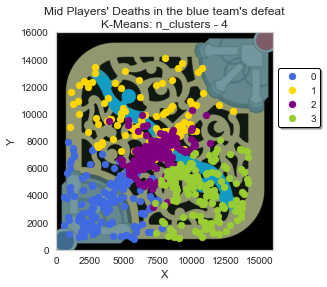

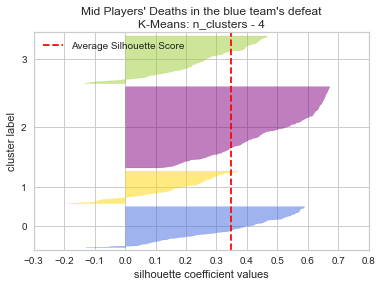

Silhouette score: 0.34757267097792094
2    286
3    168
0    144
1    115
Name: cluster, dtype: int64

Inertia: 757.7312358648927

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3821.930556   3828.333333   0.631944
1        1   6664.669565   9564.400000   0.460870
2        2   7129.444056   6882.181818  -0.650350
3        3  10589.494048   4400.982143   0.130952

In [1412]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "purple", "yellowgreen"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [1413]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1866.359133   1782.101019   0.482277
1        1   2656.293340   1813.087066   0.563945
2        2   1163.271473   1038.136915   0.476859
3        3   1702.436206   1650.846884   0.744500

In [1414]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            7830.0             602.0            7942.0   
1        1           13021.0            1034.0           14134.0   
2        2           11348.0            3932.0           10285.0   
3        3           14144.0            7310.0            8050.0   

   min coordinate_y  max timestamp  min timestamp  
0             809.0              1              0  
1            6065.0              1             -1  
2            3143.0              0             -1  
3             888.0              1             -1

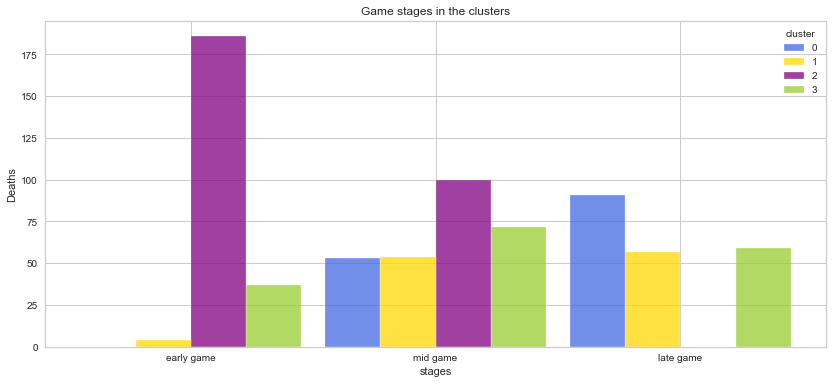

In [1415]:
stagesPerClusterV2(blueSideDefeat_df, colors)

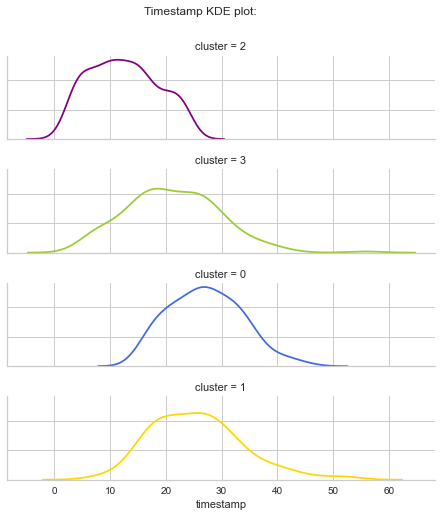

In [1416]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1417]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Katarina          31
Vex               22
Yasuo             10
Yone               6
Akali              6
Velkoz             4
AurelionSol        3
Annie              2
Anivia             2
Jayce              2
Ahri               2
Sylas              1
Kassadin           1
Gangplank          1
Xerath             1
Akshan             1
Corki              1
Zed                1

Deaths with each champion:

In [1418]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Katarina       237
Vex            168
Yasuo           62
Yone            38
Akali           38
Velkoz          28
Sylas           19
Annie           18
AurelionSol     17
Jayce           17
Anivia          14
Ahri            13
Zed             10
Gangplank        9
Corki            9
Akshan           7
Xerath           5
Kassadin         4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1419]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 18 champions when they won on the red side

Cluster 0 - died with 18 champions:
 ['Ahri' 'Akali' 'Akshan' 'Anivia' 'Annie' 'AurelionSol' 'Corki'
 'Gangplank' 'Jayce' 'Kassadin' 'Katarina' 'Sylas' 'Velkoz' 'Vex' 'Xerath'
 'Yasuo' 'Yone' 'Zed']
Katarina       49
Vex            24
Yasuo          17
Yone           11
Velkoz         10
Corki           4
Akali           4
Jayce           4
Annie           3
Gangplank       3
Zed             3
AurelionSol     3
Ahri            2
Sylas           2
Akshan          2
Anivia          1
Kassadin        1
Xerath          1
Name: champion, dtype: int64

Cluster 1 - died with 16 champions:
 ['Ahri' 'Akali' 'Anivia' 'Annie' 'AurelionSol' 'Corki' 'Gangplank' 'Jayce'
 'Katarina' 'Sylas' 'Velkoz' 'Vex' 'Xerath' 'Yasuo' 'Yone' 'Zed']
Katarina       36
Vex            27
Sylas           9
Yone            7
Velkoz          5
Anivia          5
Akali           5
Yasuo           4
Annie           4
Ahri            3
Jayce           3

---
### Silver Players

#### Clustering Red Team Victory

In [1420]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

redSideVictory_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region    champion  timestamp  \
29738   EUW1_6278609285  Red  anonymous 148   euw1  Cassiopeia   6.414850   
29756   EUW1_6278609285  Red  anonymous 148   euw1  Cassiopeia  14.811817   
29777   EUW1_6278609285  Red  anonymous 148   euw1  Cassiopeia  24.553550   
30193   EUW1_6276182423  Red  anonymous 148   euw1        Ekko   3.739500   
30200   EUW1_6276182423  Red  anonymous 148   euw1        Ekko   6.642267   
...                 ...  ...            ...    ...         ...        ...   
632489  EUW1_6289220057  Red   anonymous 84   euw1       Sylas   8.667800   
632500  EUW1_6289220057  Red   anonymous 84   euw1       Sylas  14.177000   
632505  EUW1_6289220057  Red   anonymous 84   euw1       Sylas  17.418117   
632517  EUW1_6289220057  Red   anonymous 84   euw1       Sylas  23.039050   
632531  EUW1_6289220057  Red   anonymous 84   euw1       Sylas  29.787517   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
29738         9433.0        3467.0    NaN            NaN  ...   
29756        10237.0        5491.0    NaN            NaN  ...   
29777          979.0        5475.0    NaN            NaN  ...   
30193         8550.0        8717.0    NaN            NaN  ...   
30200        10587.0        5385.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
632489       10754.0        4886.0    NaN            NaN  ...   
632500        6688.0        6682.0    NaN            NaN  ...   
632505        8256.0        6550.0    NaN            NaN  ...   
632517        9203.0        5654.0    NaN            NaN  ...   
632531        4496.0        3891.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
29738               NaN     True      Death        NaN           NaN   NaN   
29756               NaN     True      Death        NaN           NaN   NaN   
29777               NaN     True      Death        NaN           NaN   NaN   
30193               NaN     True      Death        NaN           NaN   NaN   
30200               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
632489              NaN     True      Death        NaN           NaN   NaN   
632500              NaN     True      Death        NaN           NaN   NaN   
632505              NaN     True      Death        NaN           NaN   NaN   
632517              NaN     True      Death        NaN           NaN   NaN   
632531              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
29738       NaN       NaN  MIDDLE  Silver  
29756       NaN       NaN  MIDDLE  Silver  
29777       NaN       NaN  MIDDLE  Silver  
30193       NaN       NaN  MIDDLE  Silver  
30200       NaN       NaN  MIDDLE  Silver  
...         ...       ...     ...     ...  
632489      NaN       NaN  MIDDLE  Silver  
632500      NaN       NaN  MIDDLE  Silver  
632505      NaN       NaN  MIDDLE  Silver  
632517      NaN       NaN  MIDDLE  Silver  
632531      NaN       NaN  MIDDLE  Silver  

[564 rows x 56 columns]

In [1421]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == True)].copy()

In [1422]:
redSideGames_df = middle_deaths_df[middle_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [1423]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

96

In [1424]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

52.17391304347826

In [1425]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_middle_deaths_df.shape[0]) * 100
winRateRedSide

9.744298548721494

In [1426]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 148 won 3 matches on the red side
anonymous 148 has an average of 5.666666666666667 deaths per game when winning on the red side

anonymous 63 won 17 matches on the red side
anonymous 63 has an average of 3.8823529411764706 deaths per game when winning on the red side

anonymous 72 won 18 matches on the red side
anonymous 72 has an average of 5.722222222222222 deaths per game when winning on the red side

anonymous 73 won 18 matches on the red side
anonymous 73 has an average of 7.555555555555555 deaths per game when winning on the red side

anonymous 83 won 21 matches on the red side
anonymous 83 has an average of 6.476190476190476 deaths per game when winning on the red side

anonymous 84 won 19 matches on the red side
anonymous 84 has an average of 5.578947368421052 deaths per game when winning on the red side



In [1427]:
print("Victory games on red side contains {} matches in which the middle died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 96 matches in which the middle died at least once
6 players died a total of 564 times on the red side
Victory games on red side contains an average of 5.875 deaths per game


In [1428]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
29738         9433.0        3467.0   6.414850
29756        10237.0        5491.0  14.811817
29777          979.0        5475.0  24.553550
30193         8550.0        8717.0   3.739500
30200        10587.0        5385.0   6.642267
...              ...           ...        ...
632489       10754.0        4886.0   8.667800
632500        6688.0        6682.0  14.177000
632505        8256.0        6550.0  17.418117
632517        9203.0        5654.0  23.039050
632531        4496.0        3891.0  29.787517

[564 rows x 3 columns]

Time discretization

In [1429]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1430]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1431]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [1432]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [1433]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
29738       0.785747     -1.111794         -1
29756       1.059724     -0.373943         -1
29777      -2.095109     -0.379776          0
30193       0.484848      0.802098         -1
30200       1.178993     -0.412586         -1
...              ...           ...        ...
632489      1.235902     -0.594496         -1
632500     -0.149663      0.060237         -1
632505      0.384662      0.012116          0
632517      0.707370     -0.314521          0
632531     -0.896627     -0.957224          1

[564 rows x 3 columns]

In [1434]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3423650965332572
Silhouette score for k=3: 0.35609806617129336
Silhouette score for k=4: 0.3833840614880337
Silhouette score for k=5: 0.38141220432065814
Silhouette score for k=6: 0.3781886219606173
Silhouette score for k=7: 0.3879272289668204
Silhouette score for k=8: 0.3812965532742586
Silhouette score for k=9: 0.3716393251761794
Silhouette score for k=10: 0.34351935956644125
Silhouette score for k=11: 0.34014256232170587
Silhouette score for k=12: 0.3658560997601227
Silhouette score for k=13: 0.34159410819736163
Silhouette score for k=14: 0.34904255009896207
Silhouette score for k=15: 0.33630026569736676
Silhouette score for k=16: 0.35962972488001743
Silhouette score for k=17: 0.3608970197934175
Silhouette score for k=18: 0.3795349113665255
Silhouette score for k=19: 0.3740908809343828
Silhouette score for k=20: 0.3726360247887619
Silhouette score for k=25: 0.3880622771859044


K-Means with k = 4

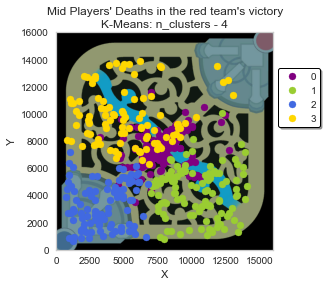

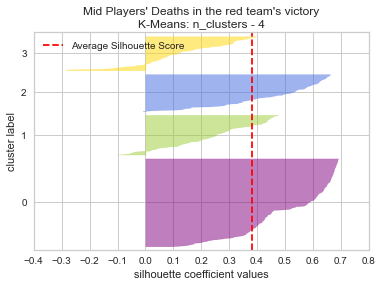

Silhouette score: 0.3833840614880337
0    249
1    113
2    105
3     97
Name: cluster, dtype: int64

Inertia: 576.6622077285681

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   7879.546185   7590.265060  -0.702811
1        1  10333.212389   4234.513274   0.256637
2        2   3573.904762   3412.838095   0.676190
3        3   5307.381443   9779.701031   0.371134

In [1435]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "yellowgreen", "royalblue", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [1436]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1291.954175   1104.425924   0.457020
1        1   2010.936851   1786.331447   0.675471
2        2   1704.283218   1625.270094   0.487857
3        3   2743.293376   1985.385891   0.722533

In [1437]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           12715.0            3235.0           11602.0   
1        1           14050.0            7000.0           10045.0   
2        2            6738.0             760.0            7198.0   
3        3           13057.0             821.0           13902.0   

   min coordinate_y  max timestamp  min timestamp  
0            3512.0              0             -1  
1             830.0              1             -1  
2             648.0              1             -1  
3            6316.0              1             -1

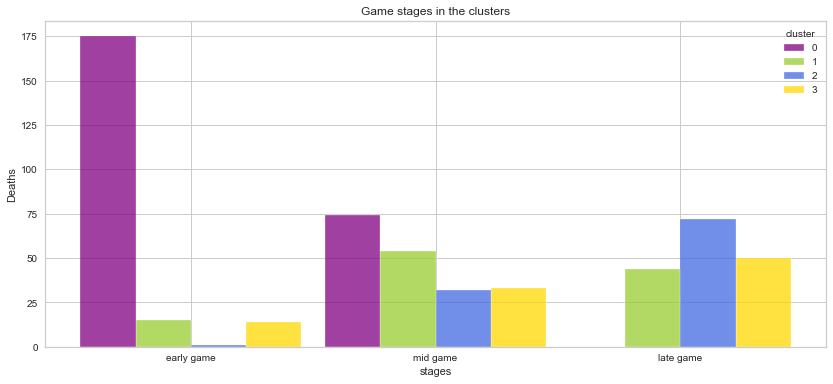

In [1438]:
stagesPerClusterV2(redSideVictory_df, colors)

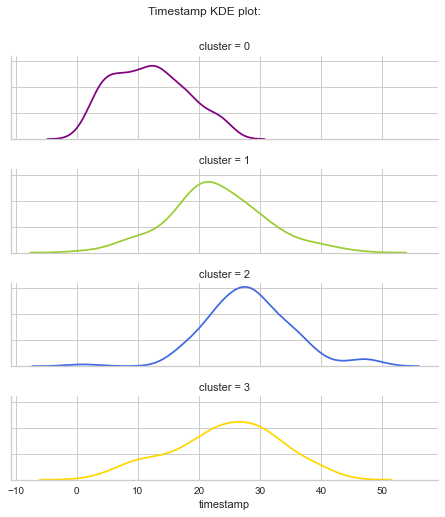

In [1439]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1440]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Katarina          21
Sylas             15
Viktor            14
Ziggs              9
AurelionSol        9
Akali              5
Syndra             4
Jayce              3
Cassiopeia         3
Ekko               2
Zed                2
Yasuo              2
Annie              2
Irelia             1
Gangplank          1
Qiyana             1
Vex                1
Zoe                1

Deaths with each champion:

In [1441]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Sylas          107
Katarina        88
Viktor          76
AurelionSol     53
Akali           37
Syndra          32
Cassiopeia      24
Yasuo           21
Ziggs           21
Annie           18
Jayce           17
Ekko            14
Zed             13
Gangplank       12
Qiyana          10
Irelia           9
Zoe              8
Vex              4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1442]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 18 champions when they won on the red side

Cluster 0 - died with 18 champions:
 ['Akali' 'Annie' 'AurelionSol' 'Cassiopeia' 'Ekko' 'Gangplank' 'Irelia'
 'Jayce' 'Katarina' 'Qiyana' 'Sylas' 'Syndra' 'Vex' 'Viktor' 'Yasuo' 'Zed'
 'Ziggs' 'Zoe']
Sylas          45
Katarina       36
Viktor         33
AurelionSol    17
Akali          14
Syndra         13
Ziggs          12
Cassiopeia     11
Annie          11
Ekko           10
Jayce           9
Yasuo           8
Zed             8
Qiyana          7
Gangplank       5
Irelia          5
Vex             3
Zoe             2
Name: champion, dtype: int64

Cluster 1 - died with 15 champions:
 ['Akali' 'Annie' 'AurelionSol' 'Cassiopeia' 'Ekko' 'Gangplank' 'Jayce'
 'Katarina' 'Qiyana' 'Sylas' 'Syndra' 'Viktor' 'Yasuo' 'Zed' 'Ziggs']
Sylas          19
AurelionSol    18
Katarina       18
Viktor         16
Akali           8
Syndra          7
Cassiopeia      6
Ziggs           6
Annie           3
Yasuo           3
Jayce           

---
#### Clustering Red Team Defeat

In [1443]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

redSideDefeat_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region champion  timestamp  \
29511   EUW1_6280123581  Red  anonymous 148   euw1    Sylas   4.544517   
29524   EUW1_6280123581  Red  anonymous 148   euw1    Sylas  11.573283   
29543   EUW1_6280123581  Red  anonymous 148   euw1    Sylas  19.455567   
29550   EUW1_6280123581  Red  anonymous 148   euw1    Sylas  22.075533   
29565   EUW1_6280123581  Red  anonymous 148   euw1    Sylas  27.278417   
...                 ...  ...            ...    ...      ...        ...   
632410  EUW1_6289524178  Red   anonymous 84   euw1     Ahri  22.394300   
632412  EUW1_6289524178  Red   anonymous 84   euw1     Ahri  23.546983   
632416  EUW1_6289524178  Red   anonymous 84   euw1     Ahri  25.733933   
632421  EUW1_6289524178  Red   anonymous 84   euw1     Ahri  28.493417   
632434  EUW1_6289524178  Red   anonymous 84   euw1     Ahri  36.653850   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
29511        10192.0        6919.0    NaN            NaN  ...   
29524         6797.0        7532.0    NaN            NaN  ...   
29543        12258.0        4924.0    NaN            NaN  ...   
29550         4314.0       12042.0    NaN            NaN  ...   
29565         8924.0       10732.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
632410        7933.0        9464.0    NaN            NaN  ...   
632412        7635.0        7668.0    NaN            NaN  ...   
632416        1776.0       12945.0    NaN            NaN  ...   
632421        7938.0        8220.0    NaN            NaN  ...   
632434       14266.0       12974.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
29511               NaN    False      Death        NaN           NaN   NaN   
29524               NaN    False      Death        NaN           NaN   NaN   
29543               NaN    False      Death        NaN           NaN   NaN   
29550               NaN    False      Death        NaN           NaN   NaN   
29565               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
632410              NaN    False      Death        NaN           NaN   NaN   
632412              NaN    False      Death        NaN           NaN   NaN   
632416              NaN    False      Death        NaN           NaN   NaN   
632421              NaN    False      Death        NaN           NaN   NaN   
632434              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
29511       NaN       NaN  MIDDLE  Silver  
29524       NaN       NaN  MIDDLE  Silver  
29543       NaN       NaN  MIDDLE  Silver  
29550       NaN       NaN  MIDDLE  Silver  
29565       NaN       NaN  MIDDLE  Silver  
...         ...       ...     ...     ...  
632410      NaN       NaN  MIDDLE  Silver  
632412      NaN       NaN  MIDDLE  Silver  
632416      NaN       NaN  MIDDLE  Silver  
632421      NaN       NaN  MIDDLE  Silver  
632434      NaN       NaN  MIDDLE  Silver  

[687 rows x 56 columns]

In [1444]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == False)].copy()

In [1445]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 148 lost 8 matches on the red side
anonymous 148 has an average of 6.75 deaths per game when losing on the red side

anonymous 63 lost 12 matches on the red side
anonymous 63 has an average of 5.833333333333333 deaths per game when losing on the red side

anonymous 72 lost 18 matches on the red side
anonymous 72 has an average of 8.833333333333334 deaths per game when losing on the red side

anonymous 73 lost 14 matches on the red side
anonymous 73 has an average of 7.714285714285714 deaths per game when losing on the red side

anonymous 83 lost 19 matches on the red side
anonymous 83 has an average of 8.68421052631579 deaths per game when losing on the red side

anonymous 84 lost 17 matches on the red side
anonymous 84 has an average of 7.705882352941177 deaths per game when losing on the red side



In [1446]:
print("Defeat games on red side contains {} matches in which the middle died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 88 matches in which the middle died at least once
6 players died a total of 687 times on the red side
Defeat games on red side contains an average of 7.806818181818182 deaths per game


In [1447]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
29511        10192.0        6919.0   4.544517
29524         6797.0        7532.0  11.573283
29543        12258.0        4924.0  19.455567
29550         4314.0       12042.0  22.075533
29565         8924.0       10732.0  27.278417
...              ...           ...        ...
632410        7933.0        9464.0  22.394300
632412        7635.0        7668.0  23.546983
632416        1776.0       12945.0  25.733933
632421        7938.0        8220.0  28.493417
632434       14266.0       12974.0  36.653850

[687 rows x 3 columns]

Time discretization

In [1448]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1449]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1450]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [1451]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [1452]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
29511       0.582574     -0.435901         -1
29524      -0.691288     -0.217011         -1
29543       1.357773     -1.148273          0
29550      -1.622953      1.393414          0
29565       0.106799      0.925640          1
...              ...           ...        ...
632410     -0.265042      0.472865          0
632412     -0.376856     -0.168449          0
632416     -2.575254      1.715856          1
632421     -0.263165      0.028659          1
632434      2.111209      1.726211          1

[687 rows x 3 columns]

In [1453]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3118032773611667
Silhouette score for k=3: 0.32956724345700644
Silhouette score for k=4: 0.3733612263710105
Silhouette score for k=5: 0.3769731900421697
Silhouette score for k=6: 0.37300648765958255
Silhouette score for k=7: 0.38287834275343563
Silhouette score for k=8: 0.38086026205964746
Silhouette score for k=9: 0.38186213173996114
Silhouette score for k=10: 0.38458918296343525
Silhouette score for k=11: 0.3791540944031679
Silhouette score for k=12: 0.3398896107185977
Silhouette score for k=13: 0.3924051682232347
Silhouette score for k=14: 0.35488411504143913
Silhouette score for k=15: 0.34038462521924934
Silhouette score for k=16: 0.3558862878643888
Silhouette score for k=17: 0.3644479091331911
Silhouette score for k=18: 0.37377655971213275
Silhouette score for k=19: 0.3848493150327322
Silhouette score for k=20: 0.3737726959585021
Silhouette score for k=25: 0.3807213348221652


K-Means with k = 4

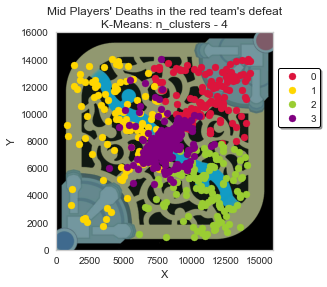

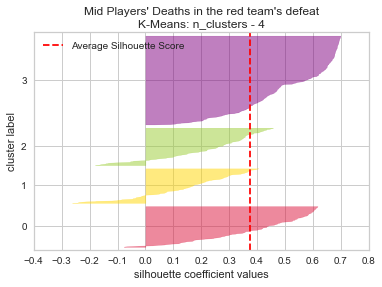

Silhouette score: 0.3733612263710105
3    302
0    139
2    128
1    118
Name: cluster, dtype: int64

Inertia: 730.481246145025

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  11070.057554  11341.834532   0.597122
1        1   4897.084746   8975.415254   0.500000
2        2  10892.687500   4525.257812   0.015625
3        3   8027.774834   7871.374172  -0.682119

In [1454]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "yellowgreen", "purple"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [1455]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1812.704886   1541.314396   0.490477
1        1   1960.587488   2920.186764   0.620962
2        2   1771.662927   1869.159141   0.770393
3        3   1046.782264   1154.780718   0.465653

In [1456]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14266.0            7213.0           14029.0   
1        1            8479.0             849.0           14031.0   
2        2           14042.0            6114.0            7774.0   
3        3           11613.0            3914.0           14041.0   

   min coordinate_y  max timestamp  min timestamp  
0            7837.0              1              0  
1            1785.0              1             -1  
2             914.0              1             -1  
3            4817.0              0             -1

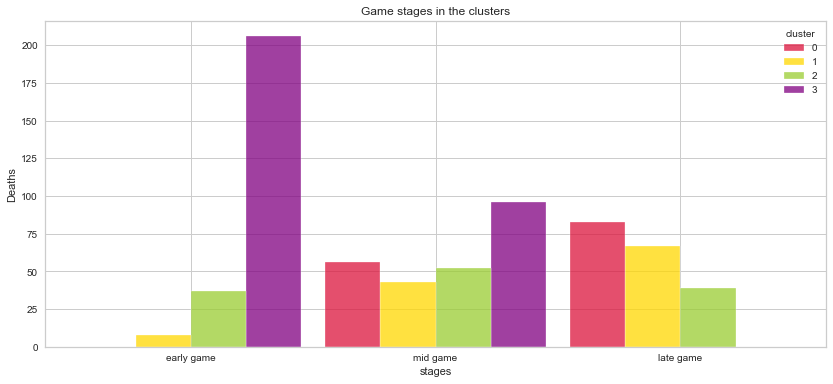

In [1457]:
stagesPerClusterV2(redSideDefeat_df, colors)

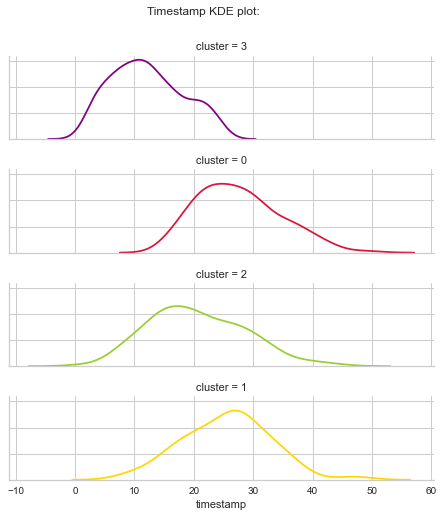

In [1458]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1459]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Katarina          22
Viktor            12
AurelionSol        8
Jayce              8
Sylas              8
Ziggs              5
Akali              4
Syndra             3
Cassiopeia         2
Zed                2
Rumble             2
Ekko               2
Vex                2
Ahri               2
Ryze               2
Annie              1
Akshan             1
Velkoz             1
Yasuo              1

Deaths with each champion:

In [1460]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Katarina       189
Viktor          83
Sylas           67
AurelionSol     66
Jayce           61
Akali           32
Ziggs           28
Syndra          24
Zed             23
Vex             22
Ahri            16
Cassiopeia      14
Ryze            13
Ekko            11
Rumble          11
Akshan           8
Yasuo            7
Annie            7
Velkoz           5
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1461]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 19 champions when they won on the red side

Cluster 0 - died with 19 champions:
 ['Ahri' 'Akali' 'Akshan' 'Annie' 'AurelionSol' 'Cassiopeia' 'Ekko' 'Jayce'
 'Katarina' 'Rumble' 'Ryze' 'Sylas' 'Syndra' 'Velkoz' 'Vex' 'Viktor'
 'Yasuo' 'Zed' 'Ziggs']
Katarina       35
AurelionSol    19
Viktor         15
Sylas          13
Jayce          10
Vex             9
Ziggs           8
Akali           5
Ryze            4
Rumble          3
Cassiopeia      3
Syndra          3
Akshan          2
Zed             2
Velkoz          2
Annie           2
Ahri            2
Ekko            1
Yasuo           1
Name: champion, dtype: int64

Cluster 1 - died with 17 champions:
 ['Ahri' 'Akali' 'Akshan' 'AurelionSol' 'Cassiopeia' 'Ekko' 'Jayce'
 'Katarina' 'Rumble' 'Ryze' 'Sylas' 'Syndra' 'Vex' 'Viktor' 'Yasuo' 'Zed'
 'Ziggs']
Katarina       31
Sylas          15
AurelionSol    12
Viktor         11
Jayce          10
Ziggs           9
Syndra          5
Akali           4
Rumble          4
C

---
#### Clustering Blue Team Victory

In [1462]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

blueSideVictory_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region     champion  timestamp  \
29943   EUW1_6277322143  Blue  anonymous 148   euw1       Viktor   7.329433   
29953   EUW1_6277322143  Blue  anonymous 148   euw1       Viktor  12.691417   
29955   EUW1_6277322143  Blue  anonymous 148   euw1       Viktor  13.903050   
29965   EUW1_6277322143  Blue  anonymous 148   euw1       Viktor  17.956133   
29973   EUW1_6277322143  Blue  anonymous 148   euw1       Viktor  20.232317   
...                 ...   ...            ...    ...          ...        ...   
629208  EUW1_6289241570  Blue   anonymous 63   euw1  AurelionSol  23.094250   
629223  EUW1_6289241570  Blue   anonymous 63   euw1  AurelionSol  28.679550   
631066  EUW1_6289737808  Blue   anonymous 72   euw1     Katarina   7.633500   
631076  EUW1_6289737808  Blue   anonymous 72   euw1     Katarina  12.228717   
631095  EUW1_6289737808  Blue   anonymous 72   euw1     Katarina  18.339333   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
29943         6876.0        7392.0    NaN            NaN  ...   
29953         7075.0        8099.0    NaN            NaN  ...   
29955         9562.0        5526.0    NaN            NaN  ...   
29965         8473.0        6343.0    NaN            NaN  ...   
29973         7521.0        7557.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
629208        4082.0        9985.0    NaN            NaN  ...   
629223        4525.0        4182.0    NaN            NaN  ...   
631066        3315.0       13779.0    NaN            NaN  ...   
631076        7678.0        8043.0    NaN            NaN  ...   
631095       13953.0       12652.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
29943               NaN     True      Death        NaN           NaN   NaN   
29953               NaN     True      Death        NaN           NaN   NaN   
29955               NaN     True      Death        NaN           NaN   NaN   
29965               NaN     True      Death        NaN           NaN   NaN   
29973               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
629208              NaN     True      Death        NaN           NaN   NaN   
629223              NaN     True      Death        NaN           NaN   NaN   
631066              NaN     True      Death        NaN           NaN   NaN   
631076              NaN     True      Death        NaN           NaN   NaN   
631095              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
29943       NaN       NaN  MIDDLE  Silver  
29953       NaN       NaN  MIDDLE  Silver  
29955       NaN       NaN  MIDDLE  Silver  
29965       NaN       NaN  MIDDLE  Silver  
29973       NaN       NaN  MIDDLE  Silver  
...         ...       ...     ...     ...  
629208      NaN       NaN  MIDDLE  Silver  
629223      NaN       NaN  MIDDLE  Silver  
631066      NaN       NaN  MIDDLE  Silver  
631076      NaN       NaN  MIDDLE  Silver  
631095      NaN       NaN  MIDDLE  Silver  

[575 rows x 56 columns]

In [1463]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == True)].copy()

In [1464]:
blueSideGames_df = middle_deaths_df[middle_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [1465]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

113

In [1466]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

60.1063829787234

In [1467]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_middle_deaths_df.shape[0]) * 100
winRateBlueSide

11.124008512284774

In [1468]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 148 won 7 matches on the blue side
anonymous 148 has an average of 6.142857142857143 deaths per game when winning on the blue side

anonymous 63 won 16 matches on the blue side
anonymous 63 has an average of 4.25 deaths per game when winning on the blue side

anonymous 72 won 28 matches on the blue side
anonymous 72 has an average of 5.535714285714286 deaths per game when winning on the blue side

anonymous 73 won 21 matches on the blue side
anonymous 73 has an average of 4.857142857142857 deaths per game when winning on the blue side

anonymous 83 won 17 matches on the blue side
anonymous 83 has an average of 4.823529411764706 deaths per game when winning on the blue side

anonymous 84 won 24 matches on the blue side
anonymous 84 has an average of 5.208333333333333 deaths per game when winning on the blue side



In [1469]:
print("Victory games on blue side contains {} matches in which the middle died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 113 matches in which the middle died at least once
6 players died a total of 575 times on the blue side
Victory games on blue side contains an average of 5.088495575221239 deaths per game


In [1470]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
29943         6876.0        7392.0   7.329433
29953         7075.0        8099.0  12.691417
29955         9562.0        5526.0  13.903050
29965         8473.0        6343.0  17.956133
29973         7521.0        7557.0  20.232317
...              ...           ...        ...
629208        4082.0        9985.0  23.094250
629223        4525.0        4182.0  28.679550
631066        3315.0       13779.0   7.633500
631076        7678.0        8043.0  12.228717
631095       13953.0       12652.0  18.339333

[575 rows x 3 columns]

Time discretization

In [1471]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1472]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1473]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [1474]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [1475]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
29943      -0.422913     -0.112427         -1
29953      -0.352991      0.141641         -1
29955       0.520852     -0.782993         -1
29965       0.138216     -0.489396          0
29973      -0.196283     -0.053132          0
...              ...           ...        ...
629208     -1.404625      0.819395          0
629223     -1.248971     -1.265974          1
631066     -1.674122      2.182808         -1
631076     -0.141118      0.121517         -1
631095      2.063694      1.777809          0

[575 rows x 3 columns]

In [1476]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3341643147322105
Silhouette score for k=3: 0.37830062111943846
Silhouette score for k=4: 0.3758074981048904
Silhouette score for k=5: 0.37168559151471925
Silhouette score for k=6: 0.38460312746880393
Silhouette score for k=7: 0.3841925931120651
Silhouette score for k=8: 0.3889594129284161
Silhouette score for k=9: 0.3822971598573002
Silhouette score for k=10: 0.3451520981970222
Silhouette score for k=11: 0.391803969207251
Silhouette score for k=12: 0.3639111531968184
Silhouette score for k=13: 0.3781062975549013
Silhouette score for k=14: 0.3789636113724362
Silhouette score for k=15: 0.38338392880009453
Silhouette score for k=16: 0.38182690090597626
Silhouette score for k=17: 0.39011597455852337
Silhouette score for k=18: 0.4054926193529661
Silhouette score for k=19: 0.39947641102011994
Silhouette score for k=20: 0.3918824035704763
Silhouette score for k=25: 0.4029017212280589


K-Means with k = 4

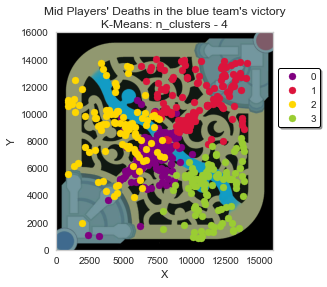

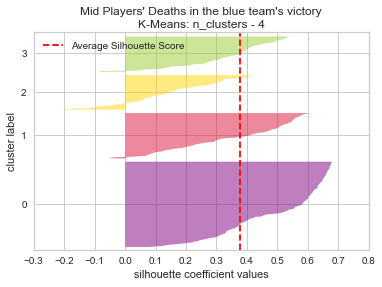

Silhouette score: 0.3758074981048904
0    245
1    130
3    101
2     99
Name: cluster, dtype: int64

Inertia: 563.3150989265097

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   6949.681633   6830.204082  -0.702041
1        1  10326.538462  11059.700000   0.553846
2        2   4575.141414   8734.424242   0.333333
3        3  11363.623762   4499.217822   0.029703

In [1477]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "crimson", "gold", "yellowgreen"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [1478]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1119.609697   1236.282333   0.457361
1        1   2028.662091   1714.702300   0.527134
2        2   1850.065486   2373.305844   0.681650
3        3   1415.176530   1847.723371   0.666830

In [1479]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           10047.0            2376.0           11028.0   
1        1           14037.0            6248.0           14004.0   
2        2            7981.0             859.0           13779.0   
3        3           13869.0            7870.0            8203.0   

   min coordinate_y  max timestamp  min timestamp  
0            1033.0              0             -1  
1            7718.0              1             -1  
2            1972.0              1             -1  
3             862.0              1             -1

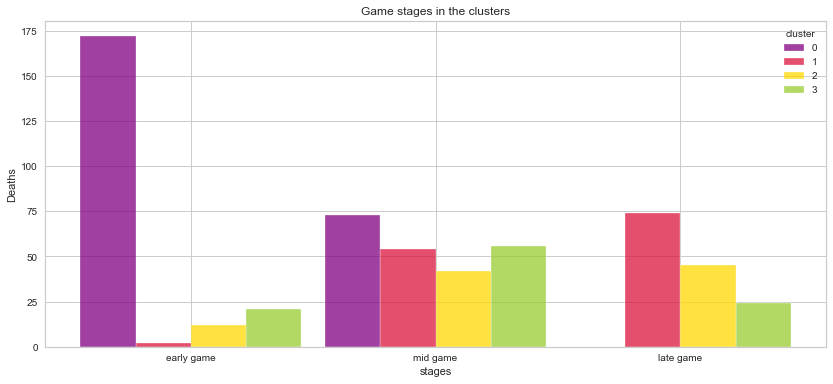

In [1480]:
stagesPerClusterV2(blueSideVictory_df, colors)

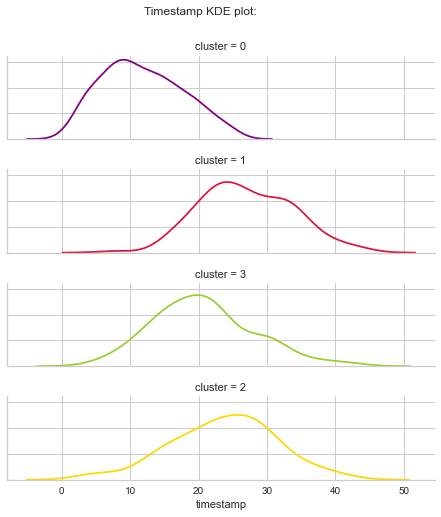

In [1481]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1482]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Katarina          32
AurelionSol       15
Viktor            14
Sylas             12
Syndra             7
Ziggs              4
Zed                4
Cassiopeia         3
Jayce              2
Anivia             2
Annie              2
Ekko               2
Yone               2
Qiyana             2
Nunu               1
Ahri               1
Yasuo              1
Gragas             1
Akali              1
Kassadin           1
Fizz               1
Vex                1
Irelia             1
Gangplank          1

Deaths with each champion:

In [1483]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Katarina       159
AurelionSol     78
Viktor          76
Sylas           59
Syndra          34
Zed             23
Qiyana          17
Ekko            16
Annie           15
Ziggs           12
Cassiopeia      12
Yone             9
Yasuo            9
Jayce            8
Akali            8
Anivia           8
Ahri             6
Gangplank        6
Fizz             5
Kassadin         5
Nunu             3
Gragas           3
Vex              2
Irelia           2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1484]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 24 champions when they won on the red side

Cluster 0 - died with 24 champions:
 ['Ahri' 'Akali' 'Anivia' 'Annie' 'AurelionSol' 'Cassiopeia' 'Ekko' 'Fizz'
 'Gangplank' 'Gragas' 'Irelia' 'Jayce' 'Kassadin' 'Katarina' 'Nunu'
 'Qiyana' 'Sylas' 'Syndra' 'Vex' 'Viktor' 'Yasuo' 'Yone' 'Zed' 'Ziggs']
Katarina       66
AurelionSol    38
Viktor         36
Sylas          19
Syndra         15
Zed            12
Cassiopeia      8
Annie           8
Ekko            7
Qiyana          5
Anivia          4
Ziggs           4
Yone            3
Jayce           3
Yasuo           3
Akali           2
Kassadin        2
Irelia          2
Ahri            2
Gangplank       2
Vex             1
Fizz            1
Nunu            1
Gragas          1
Name: champion, dtype: int64

Cluster 1 - died with 20 champions:
 ['Ahri' 'Akali' 'Anivia' 'Annie' 'AurelionSol' 'Cassiopeia' 'Ekko'
 'Gangplank' 'Gragas' 'Jayce' 'Katarina' 'Nunu' 'Qiyana' 'Sylas' 'Syndra'
 'Viktor' 'Yasuo' 'Yone' 'Zed' 'Ziggs

---
#### Clustering Blue Team Defeat

In [1485]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

blueSideDefeat_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region champion  timestamp  \
29608   EUW1_6280044123  Blue  anonymous 148   euw1     Ekko   2.285533   
29614   EUW1_6280044123  Blue  anonymous 148   euw1     Ekko   4.746583   
29618   EUW1_6280044123  Blue  anonymous 148   euw1     Ekko   6.271117   
29622   EUW1_6280044123  Blue  anonymous 148   euw1     Ekko   8.889650   
29627   EUW1_6280044123  Blue  anonymous 148   euw1     Ekko  10.581050   
...                 ...   ...            ...    ...      ...        ...   
631162  EUW1_6289510092  Blue   anonymous 73   euw1    Sylas  30.810583   
632441  EUW1_6289481118  Blue   anonymous 84   euw1    Corki   2.874050   
632447  EUW1_6289481118  Blue   anonymous 84   euw1    Corki   4.905167   
632461  EUW1_6289481118  Blue   anonymous 84   euw1    Corki  12.900117   
632464  EUW1_6289481118  Blue   anonymous 84   euw1    Corki  14.011867   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
29608         8231.0        6524.0    NaN            NaN  ...   
29614         5686.0        6485.0    NaN            NaN  ...   
29618         7161.0        6103.0    NaN            NaN  ...   
29622         6987.0        6314.0    NaN            NaN  ...   
29627         6328.0        8383.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
631162         834.0        1591.0    NaN            NaN  ...   
632441        6219.0        6904.0    NaN            NaN  ...   
632447        6909.0        6839.0    NaN            NaN  ...   
632461        4411.0       13529.0    NaN            NaN  ...   
632464        7984.0        2372.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
29608               NaN    False      Death        NaN           NaN   NaN   
29614               NaN    False      Death        NaN           NaN   NaN   
29618               NaN    False      Death        NaN           NaN   NaN   
29622               NaN    False      Death        NaN           NaN   NaN   
29627               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
631162              NaN    False      Death        NaN           NaN   NaN   
632441              NaN    False      Death        NaN           NaN   NaN   
632447              NaN    False      Death        NaN           NaN   NaN   
632461              NaN    False      Death        NaN           NaN   NaN   
632464              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
29608       NaN       NaN  MIDDLE  Silver  
29614       NaN       NaN  MIDDLE  Silver  
29618       NaN       NaN  MIDDLE  Silver  
29622       NaN       NaN  MIDDLE  Silver  
29627       NaN       NaN  MIDDLE  Silver  
...         ...       ...     ...     ...  
631162      NaN       NaN  MIDDLE  Silver  
632441      NaN       NaN  MIDDLE  Silver  
632447      NaN       NaN  MIDDLE  Silver  
632461      NaN       NaN  MIDDLE  Silver  
632464      NaN       NaN  MIDDLE  Silver  

[537 rows x 56 columns]

In [1486]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == False)].copy()

In [1487]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 148 lost 4 matches on the blue side
anonymous 148 has an average of 8.25 deaths per game when losing on the blue side

anonymous 63 lost 11 matches on the blue side
anonymous 63 has an average of 5.181818181818182 deaths per game when losing on the blue side

anonymous 72 lost 11 matches on the blue side
anonymous 72 has an average of 8.545454545454545 deaths per game when losing on the blue side

anonymous 73 lost 20 matches on the blue side
anonymous 73 has an average of 7.5 deaths per game when losing on the blue side

anonymous 83 lost 11 matches on the blue side
anonymous 83 has an average of 8.545454545454545 deaths per game when losing on the blue side

anonymous 84 lost 18 matches on the blue side
anonymous 84 has an average of 6.055555555555555 deaths per game when losing on the blue side



In [1488]:
print("Defeat games on blue side contains {} matches in which the middle died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 75 matches in which the middle died at least once
6 players died a total of 537 times on the blue side
Defeat games on blue side contains an average of 7.16 deaths per game


In [1489]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
29608         8231.0        6524.0   2.285533
29614         5686.0        6485.0   4.746583
29618         7161.0        6103.0   6.271117
29622         6987.0        6314.0   8.889650
29627         6328.0        8383.0  10.581050
...              ...           ...        ...
631162         834.0        1591.0  30.810583
632441        6219.0        6904.0   2.874050
632447        6909.0        6839.0   4.905167
632461        4411.0       13529.0  12.900117
632464        7984.0        2372.0  14.011867

[537 rows x 3 columns]

Time discretization

In [1490]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1491]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1492]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [1493]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [1494]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
29608       0.516372      0.207040         -1
29614      -0.351987      0.192436         -1
29618       0.151286      0.049394         -1
29622       0.091917      0.128404         -1
29627      -0.132935      0.903154         -1
...              ...           ...        ...
631162     -2.007500     -1.640151          1
632441     -0.170126      0.349333         -1
632447      0.065303      0.324994         -1
632461     -0.787020      2.830104         -1
632464      0.432095     -1.347701         -1

[537 rows x 3 columns]

In [1495]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3206744004394954
Silhouette score for k=3: 0.34661579346215504
Silhouette score for k=4: 0.3816793657402381
Silhouette score for k=5: 0.3804176836618804
Silhouette score for k=6: 0.3831428949609762
Silhouette score for k=7: 0.3840955361325809
Silhouette score for k=8: 0.39003049418367897
Silhouette score for k=9: 0.38316062821737407
Silhouette score for k=10: 0.38241574525172606
Silhouette score for k=11: 0.3728393677030418
Silhouette score for k=12: 0.35375972572471925
Silhouette score for k=13: 0.36143205449874244
Silhouette score for k=14: 0.34663152977602557
Silhouette score for k=15: 0.3733718896055893
Silhouette score for k=16: 0.3612852209305258
Silhouette score for k=17: 0.3716438044280046
Silhouette score for k=18: 0.3724087477183829
Silhouette score for k=19: 0.3776662057960705
Silhouette score for k=20: 0.38710398625666753
Silhouette score for k=25: 0.37562752791830406


K-Means with k = 4

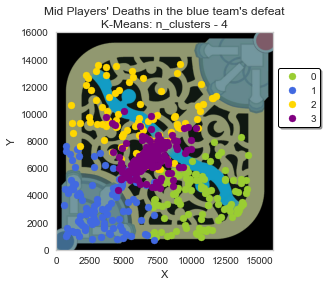

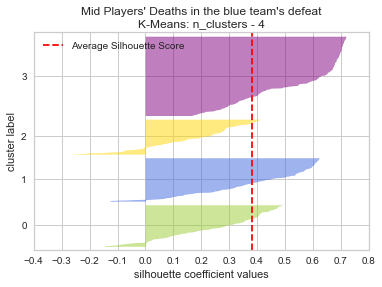

Silhouette score: 0.3816793657402381
3    214
1    117
0    112
2     94
Name: cluster, dtype: int64

Inertia: 537.9104410771599

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10498.008929   3903.687500  -0.178571
1        1   3513.384615   3605.307692   0.743590
2        2   6041.627660   9600.031915   0.521277
3        3   6787.850467   6752.518692  -0.752336

In [1496]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "royalblue", "gold", "purple"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [1497]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1980.516336   1707.837862   0.671011
1        1   1841.222865   1869.366786   0.436651
2        2   2647.027269   1984.278659   0.596599
3        3   1127.750634   1018.521944   0.431655

In [1498]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14107.0            6997.0            8276.0   
1        1            7449.0             614.0            7668.0   
2        2           11809.0            1112.0           13664.0   
3        3           10281.0            3698.0           10226.0   

   min coordinate_y  max timestamp  min timestamp  
0             914.0              1             -1  
1             753.0              1              0  
2            5941.0              1             -1  
3            4366.0              0             -1

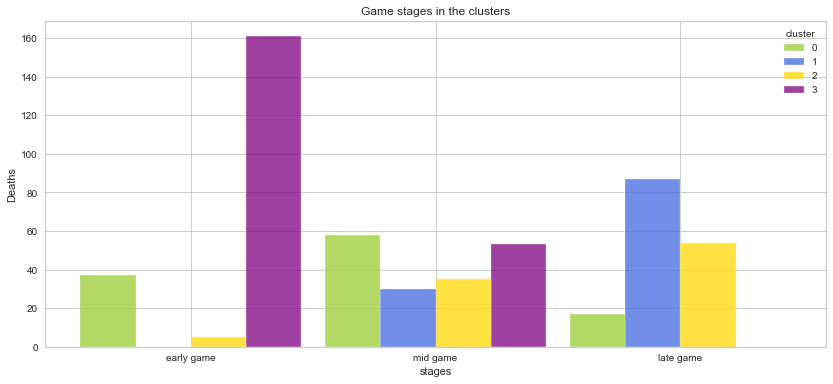

In [1499]:
stagesPerClusterV2(blueSideDefeat_df, colors)

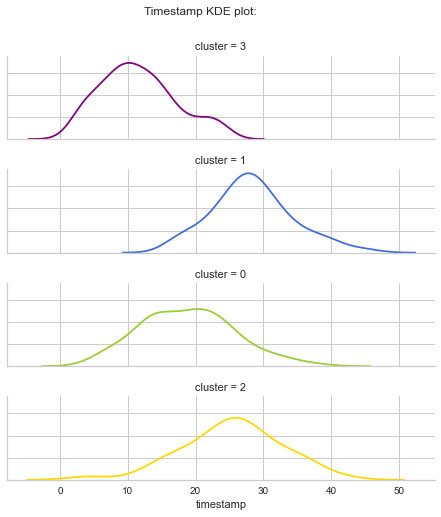

In [1500]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1501]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Sylas             16
AurelionSol       12
Katarina          11
Viktor             9
Jayce              7
Syndra             3
Zed                3
Ziggs              2
Akali              2
Ekko               2
TwistedFate        1
Cassiopeia         1
Yone               1
Velkoz             1
Ahri               1
Annie              1
Anivia             1
Corki              1

Deaths with each champion:

In [1502]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Sylas          127
Katarina       102
AurelionSol     61
Viktor          55
Jayce           51
Zed             24
Ekko            16
Syndra          16
Akali           15
Yone            12
TwistedFate     10
Ziggs           10
Cassiopeia       8
Velkoz           7
Annie            7
Anivia           7
Ahri             5
Corki            4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1503]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 18 champions when they won on the red side

Cluster 0 - died with 15 champions:
 ['Ahri' 'Akali' 'Anivia' 'AurelionSol' 'Cassiopeia' 'Corki' 'Ekko' 'Jayce'
 'Katarina' 'Sylas' 'Syndra' 'Viktor' 'Yone' 'Zed' 'Ziggs']
Sylas          28
Katarina       22
AurelionSol    19
Jayce          10
Viktor          9
Anivia          5
Ekko            3
Zed             3
Cassiopeia      2
Ziggs           2
Yone            2
Akali           2
Syndra          2
Ahri            2
Corki           1
Name: champion, dtype: int64

Cluster 1 - died with 17 champions:
 ['Ahri' 'Akali' 'Anivia' 'Annie' 'AurelionSol' 'Cassiopeia' 'Ekko' 'Jayce'
 'Katarina' 'Sylas' 'Syndra' 'TwistedFate' 'Velkoz' 'Viktor' 'Yone' 'Zed'
 'Ziggs']
Sylas          25
Katarina       19
AurelionSol    18
Viktor         15
Jayce          11
Syndra          5
Ziggs           4
Zed             4
Akali           3
Annie           2
Ekko            2
Yone            2
TwistedFate     2
Cassiopeia      2
Velkoz  

---
### Gold Players

#### Clustering Red Team Victory

In [1504]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

redSideVictory_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
4510    EUW1_6276256214  Red  anonymous 131   euw1    Annie  26.860850   
4515    EUW1_6276256214  Red  anonymous 131   euw1    Annie  29.183567   
4655    EUW1_6274899278  Red  anonymous 131   euw1   Anivia  15.474683   
4674    EUW1_6274899278  Red  anonymous 131   euw1   Anivia  24.687167   
4680    EUW1_6274899278  Red  anonymous 131   euw1   Anivia  27.503400   
...                 ...  ...            ...    ...      ...        ...   
639271  EUW1_6289555693  Red  anonymous 131   euw1   Syndra   9.724083   
639279  EUW1_6289555693  Red  anonymous 131   euw1   Syndra  13.791483   
639323  EUW1_6289555693  Red  anonymous 131   euw1   Syndra  37.698383   
639334  EUW1_6289555693  Red  anonymous 131   euw1   Syndra  41.216200   
639336  EUW1_6289555693  Red  anonymous 131   euw1   Syndra  42.782933   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
4510          2908.0        3114.0    NaN            NaN  ...   
4515          9955.0        7532.0    NaN            NaN  ...   
4655          7544.0        7990.0    NaN            NaN  ...   
4674         13627.0        4504.0    NaN            NaN  ...   
4680          9132.0        5692.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
639271        9593.0        9335.0    NaN            NaN  ...   
639279        6864.0        9003.0    NaN            NaN  ...   
639323       10649.0        8900.0    NaN            NaN  ...   
639334        1546.0        8170.0    NaN            NaN  ...   
639336       12701.0        5393.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
4510                NaN     True      Death        NaN           NaN   NaN   
4515                NaN     True      Death        NaN           NaN   NaN   
4655                NaN     True      Death        NaN           NaN   NaN   
4674                NaN     True      Death        NaN           NaN   NaN   
4680                NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
639271              NaN     True      Death        NaN           NaN   NaN   
639279              NaN     True      Death        NaN           NaN   NaN   
639323              NaN     True      Death        NaN           NaN   NaN   
639334              NaN     True      Death        NaN           NaN   NaN   
639336              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
4510        NaN       NaN  MIDDLE  Gold  
4515        NaN       NaN  MIDDLE  Gold  
4655        NaN       NaN  MIDDLE  Gold  
4674        NaN       NaN  MIDDLE  Gold  
4680        NaN       NaN  MIDDLE  Gold  
...         ...       ...     ...   ...  
639271      NaN       NaN  MIDDLE  Gold  
639279      NaN       NaN  MIDDLE  Gold  
639323      NaN       NaN  MIDDLE  Gold  
639334      NaN       NaN  MIDDLE  Gold  
639336      NaN       NaN  MIDDLE  Gold  

[451 rows x 56 columns]

In [1505]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == True)].copy()

In [1506]:
redSideGames_df = middle_deaths_df[middle_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [1507]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

97

In [1508]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

52.1505376344086

In [1509]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_middle_deaths_df.shape[0]) * 100
winRateRedSide

7.791983413959917

In [1510]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 131 won 14 matches on the red side
anonymous 131 has an average of 3.857142857142857 deaths per game when winning on the red side

anonymous 132 won 15 matches on the red side
anonymous 132 has an average of 4.066666666666666 deaths per game when winning on the red side

anonymous 135 won 14 matches on the red side
anonymous 135 has an average of 6.571428571428571 deaths per game when winning on the red side

anonymous 150 won 8 matches on the red side
anonymous 150 has an average of 3.625 deaths per game when winning on the red side

anonymous 152 won 1 matches on the red side
anonymous 152 has an average of 3.0 deaths per game when winning on the red side

anonymous 175 won 6 matches on the red side
anonymous 175 has an average of 3.1666666666666665 deaths per game when winning on the red side

anonymous 55 won 12 matches on the red side
anonymous 55 has an average of 4.666666666666667 deaths per game when winning on the red side

anonymous 57 won 27 matches on the red side

In [1511]:
print("Victory games on red side contains {} matches in which the middle died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 97 matches in which the middle died at least once
8 players died a total of 451 times on the red side
Victory games on red side contains an average of 4.649484536082475 deaths per game


In [1512]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
4510          2908.0        3114.0  26.860850
4515          9955.0        7532.0  29.183567
4655          7544.0        7990.0  15.474683
4674         13627.0        4504.0  24.687167
4680          9132.0        5692.0  27.503400
...              ...           ...        ...
639271        9593.0        9335.0   9.724083
639279        6864.0        9003.0  13.791483
639323       10649.0        8900.0  37.698383
639334        1546.0        8170.0  41.216200
639336       12701.0        5393.0  42.782933

[451 rows x 3 columns]

Time discretization

In [1513]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1514]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1515]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [1516]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [1517]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
4510       -1.471571     -0.982398          1
4515        0.930040      0.512515          1
4655        0.108373      0.667488          0
4674        2.181454     -0.512065          0
4680        0.649562     -0.110083          1
...              ...           ...        ...
639271      0.806670      1.122594         -1
639279     -0.123370      1.010256         -1
639323      1.166554      0.975404          1
639334     -1.935739      0.728395          1
639336      1.865874     -0.211255          1

[451 rows x 3 columns]

In [1518]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3401655273611816
Silhouette score for k=3: 0.3643580877807437
Silhouette score for k=4: 0.38282880092283095
Silhouette score for k=5: 0.3822751745227994
Silhouette score for k=6: 0.35838104245157726
Silhouette score for k=7: 0.36088995385237993
Silhouette score for k=8: 0.35717698912143747
Silhouette score for k=9: 0.3647080576625433
Silhouette score for k=10: 0.3395525545021685
Silhouette score for k=11: 0.31868715213828014
Silhouette score for k=12: 0.3325695394222263
Silhouette score for k=13: 0.340493997798749
Silhouette score for k=14: 0.3567337194697841
Silhouette score for k=15: 0.3523500810963241
Silhouette score for k=16: 0.3505950343826653
Silhouette score for k=17: 0.3641736421204796
Silhouette score for k=18: 0.36207403438988217
Silhouette score for k=19: 0.3607175161457789
Silhouette score for k=20: 0.3697600481713202
Silhouette score for k=25: 0.3801853952275257


K-Means with k = 4

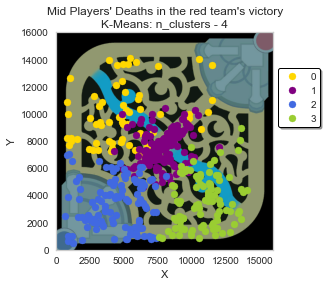

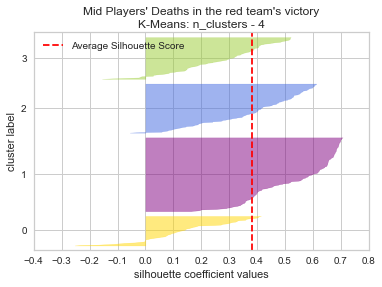

Silhouette score: 0.38282880092283095
1    171
2    114
3     97
0     69
Name: cluster, dtype: int64

Inertia: 436.8088837154998

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5210.333333   9755.521739   0.376812
1        1   7875.520468   7591.847953  -0.807018
2        2   4408.254386   3417.342105   0.570175
3        3  10826.381443   3638.185567  -0.092784

In [1519]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "purple", "royalblue", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [1520]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2717.990715   2085.240073   0.639326
1        1   1194.456070   1205.311801   0.394639
2        2   1846.343693   1739.136420   0.495051
3        3   1525.687815   1866.724207   0.747263

In [1521]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           11498.0             807.0           14114.0   
1        1           11988.0            4239.0           10407.0   
2        2            8072.0             664.0            7027.0   
3        3           14091.0            7595.0            8991.0   

   min coordinate_y  max timestamp  min timestamp  
0            6810.0              1             -1  
1            4618.0              0             -1  
2             507.0              1              0  
3             857.0              1             -1

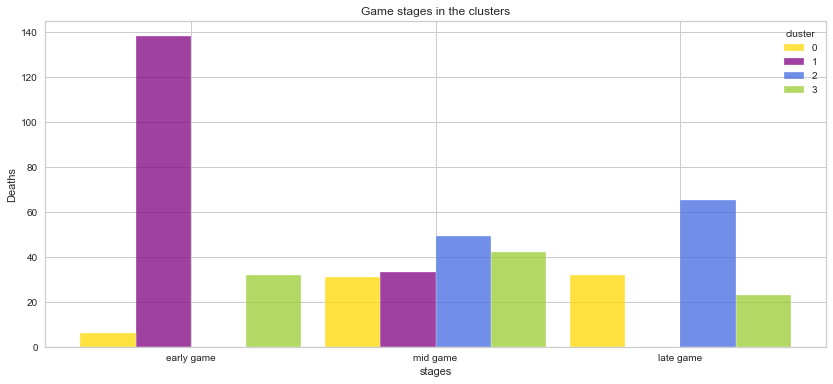

In [1522]:
stagesPerClusterV2(redSideVictory_df, colors)

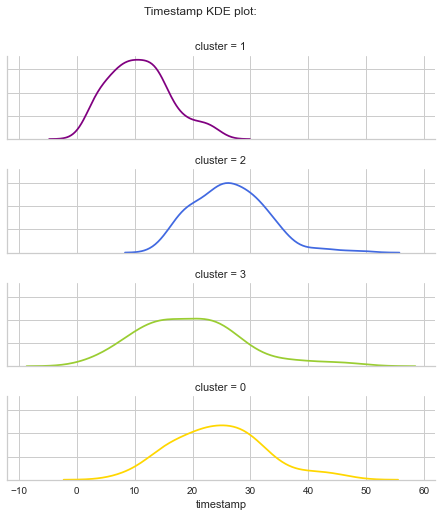

In [1523]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1524]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Fizz              20
TwistedFate       13
Malzahar           9
Katarina           8
Gangplank          8
Syndra             7
AurelionSol        5
Anivia             5
Irelia             4
Sylas              2
Kassadin           2
Zoe                2
Annie              2
Lux                1
Renekton           1
Qiyana             1
Tristana           1
Ziggs              1
Diana              1
Pantheon           1
Cassiopeia         1
Yasuo              1
Jayce              1

Deaths with each champion:

In [1525]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Fizz           91
TwistedFate    87
Gangplank      49
Katarina       45
Malzahar       32
Syndra         24
Anivia         21
Irelia         19
AurelionSol    16
Zoe            12
Kassadin        8
Jayce           6
Qiyana          5
Annie           5
Sylas           5
Ziggs           5
Lux             4
Yasuo           4
Pantheon        3
Cassiopeia      3
Tristana        3
Renekton        3
Diana           1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1526]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 23 champions when they won on the red side

Cluster 0 - died with 15 champions:
 ['Anivia' 'AurelionSol' 'Diana' 'Fizz' 'Gangplank' 'Irelia' 'Jayce'
 'Katarina' 'Malzahar' 'Qiyana' 'Renekton' 'Sylas' 'Syndra' 'TwistedFate'
 'Zoe']
TwistedFate    19
Fizz           11
Katarina        8
Gangplank       7
Malzahar        4
AurelionSol     4
Anivia          3
Zoe             3
Irelia          3
Syndra          2
Diana           1
Qiyana          1
Sylas           1
Jayce           1
Renekton        1
Name: champion, dtype: int64

Cluster 1 - died with 22 champions:
 ['Anivia' 'Annie' 'AurelionSol' 'Cassiopeia' 'Fizz' 'Gangplank' 'Irelia'
 'Jayce' 'Kassadin' 'Katarina' 'Lux' 'Malzahar' 'Pantheon' 'Qiyana'
 'Renekton' 'Sylas' 'Syndra' 'Tristana' 'TwistedFate' 'Yasuo' 'Ziggs'
 'Zoe']
TwistedFate    27
Fizz           22
Gangplank      18
Katarina       17
Syndra         16
Malzahar       15
AurelionSol     7
Irelia          6
Zoe             6
Anivia          6
Kassa

---
#### Clustering Red Team Defeat

In [1527]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

redSideDefeat_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region champion  timestamp  \
4583    EUW1_6275877124  Red  anonymous 131   euw1   Anivia   2.917733   
4604    EUW1_6275877124  Red  anonymous 131   euw1   Anivia  13.190283   
4625    EUW1_6275877124  Red  anonymous 131   euw1   Anivia  26.364833   
5056    EUW1_6274379206  Red  anonymous 131   euw1   Anivia  25.700383   
5071    EUW1_6274379206  Red  anonymous 131   euw1   Anivia  33.616383   
...                 ...  ...            ...    ...      ...        ...   
639231  EUW1_6289860394  Red  anonymous 131   euw1      Zoe  24.463450   
639236  EUW1_6289860394  Red  anonymous 131   euw1      Zoe  27.339517   
639241  EUW1_6289860394  Red  anonymous 131   euw1      Zoe  29.553233   
639245  EUW1_6289860394  Red  anonymous 131   euw1      Zoe  30.959833   
639250  EUW1_6289860394  Red  anonymous 131   euw1      Zoe  33.308583   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
4583          8150.0        8202.0    NaN            NaN  ...   
4604          8777.0        8962.0    NaN            NaN  ...   
4625          6966.0       10001.0    NaN            NaN  ...   
5056         11460.0        1317.0    NaN            NaN  ...   
5071          9715.0        9311.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
639231        5436.0        7679.0    NaN            NaN  ...   
639236        9294.0        6277.0    NaN            NaN  ...   
639241        7108.0        6158.0    NaN            NaN  ...   
639245       10175.0        9933.0    NaN            NaN  ...   
639250        7755.0        3659.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
4583                NaN    False      Death        NaN           NaN   NaN   
4604                NaN    False      Death        NaN           NaN   NaN   
4625                NaN    False      Death        NaN           NaN   NaN   
5056                NaN    False      Death        NaN           NaN   NaN   
5071                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
639231              NaN    False      Death        NaN           NaN   NaN   
639236              NaN    False      Death        NaN           NaN   NaN   
639241              NaN    False      Death        NaN           NaN   NaN   
639245              NaN    False      Death        NaN           NaN   NaN   
639250              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
4583        NaN       NaN  MIDDLE  Gold  
4604        NaN       NaN  MIDDLE  Gold  
4625        NaN       NaN  MIDDLE  Gold  
5056        NaN       NaN  MIDDLE  Gold  
5071        NaN       NaN  MIDDLE  Gold  
...         ...       ...     ...   ...  
639231      NaN       NaN  MIDDLE  Gold  
639236      NaN       NaN  MIDDLE  Gold  
639241      NaN       NaN  MIDDLE  Gold  
639245      NaN       NaN  MIDDLE  Gold  
639250      NaN       NaN  MIDDLE  Gold  

[597 rows x 56 columns]

In [1528]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == False)].copy()

In [1529]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 131 lost 19 matches on the red side
anonymous 131 has an average of 6.157894736842105 deaths per game when losing on the red side

anonymous 132 lost 8 matches on the red side
anonymous 132 has an average of 6.5 deaths per game when losing on the red side

anonymous 135 lost 6 matches on the red side
anonymous 135 has an average of 9.333333333333334 deaths per game when losing on the red side

anonymous 150 lost 8 matches on the red side
anonymous 150 has an average of 5.625 deaths per game when losing on the red side

anonymous 152 lost 5 matches on the red side
anonymous 152 has an average of 5.4 deaths per game when losing on the red side

anonymous 175 lost 7 matches on the red side
anonymous 175 has an average of 6.571428571428571 deaths per game when losing on the red side

anonymous 55 lost 18 matches on the red side
anonymous 55 has an average of 6.0 deaths per game when losing on the red side

anonymous 57 lost 18 matches on the red side
anonymous 57 has an average o

In [1530]:
print("Defeat games on red side contains {} matches in which the middle died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 89 matches in which the middle died at least once
8 players died a total of 597 times on the red side
Defeat games on red side contains an average of 6.707865168539326 deaths per game


In [1531]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
4583          8150.0        8202.0   2.917733
4604          8777.0        8962.0  13.190283
4625          6966.0       10001.0  26.364833
5056         11460.0        1317.0  25.700383
5071          9715.0        9311.0  33.616383
...              ...           ...        ...
639231        5436.0        7679.0  24.463450
639236        9294.0        6277.0  27.339517
639241        7108.0        6158.0  29.553233
639245       10175.0        9933.0  30.959833
639250        7755.0        3659.0  33.308583

[597 rows x 3 columns]

Time discretization

In [1532]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1533]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1534]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [1535]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [1536]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
4583       -0.143225      0.074906         -1
4604        0.080542      0.335717         -1
4625       -0.565776      0.692273          1
5056        1.038063     -2.287833          1
5071        0.415299      0.455484          1
...              ...           ...        ...
639231     -1.111809     -0.104573          0
639236      0.265051     -0.585700          1
639241     -0.515098     -0.626537          1
639245      0.579466      0.668937          1
639250     -0.284194     -1.484124          1

[597 rows x 3 columns]

In [1537]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.2787488528651215
Silhouette score for k=3: 0.30659845841551836
Silhouette score for k=4: 0.34014290584172147
Silhouette score for k=5: 0.34814035229828055
Silhouette score for k=6: 0.35132751582946825
Silhouette score for k=7: 0.3555826134344619
Silhouette score for k=8: 0.36086016778019253
Silhouette score for k=9: 0.35604838216390106
Silhouette score for k=10: 0.3475024254080075
Silhouette score for k=11: 0.32853486467444853
Silhouette score for k=12: 0.35295601616919314
Silhouette score for k=13: 0.3495300123778151
Silhouette score for k=14: 0.3656702986698331
Silhouette score for k=15: 0.33636230407055334
Silhouette score for k=16: 0.3568921654124171
Silhouette score for k=17: 0.37688254105454655
Silhouette score for k=18: 0.3675050451359662
Silhouette score for k=19: 0.38208151625330633
Silhouette score for k=20: 0.3828233053581896
Silhouette score for k=25: 0.3878942890851071


K-Means with k = 4

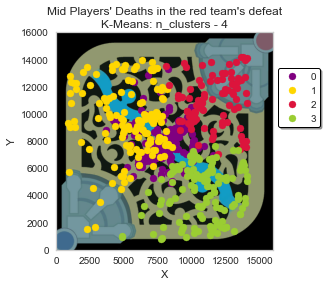

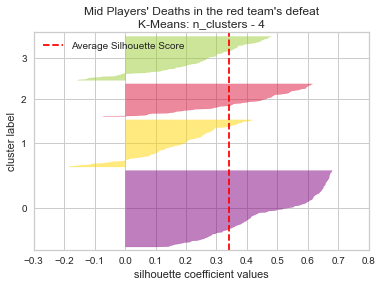

Silhouette score: 0.34014290584172147
0    228
1    141
3    131
2     97
Name: cluster, dtype: int64

Inertia: 643.0988076428509

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   7951.100877   7950.815789  -0.723684
1        1   5393.978723   9530.156028   0.460993
2        2  11557.268041  10885.113402   0.608247
3        3  10768.557252   4228.160305   0.000000

In [1538]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "gold", "crimson", "yellowgreen"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [1539]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1226.498594   1247.749670   0.447175
1        1   2031.133078   2564.647315   0.601626
2        2   1623.459247   1788.276945   0.488142
3        3   1951.139370   1904.382410   0.709801

In [1540]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           11522.0            3708.0           13326.0   
1        1            8514.0             920.0           13936.0   
2        2           14088.0            8121.0           14222.0   
3        3           14055.0            4876.0            7640.0   

   min coordinate_y  max timestamp  min timestamp  
0            4923.0              0             -1  
1            1533.0              1             -1  
2            7060.0              1              0  
3             796.0              1             -1

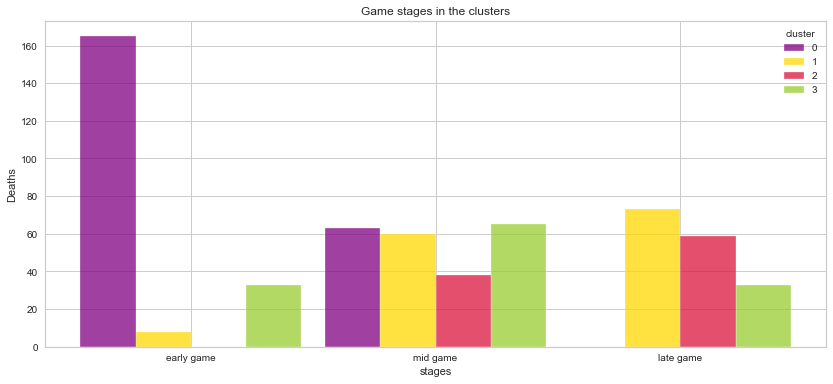

In [1541]:
stagesPerClusterV2(redSideDefeat_df, colors)

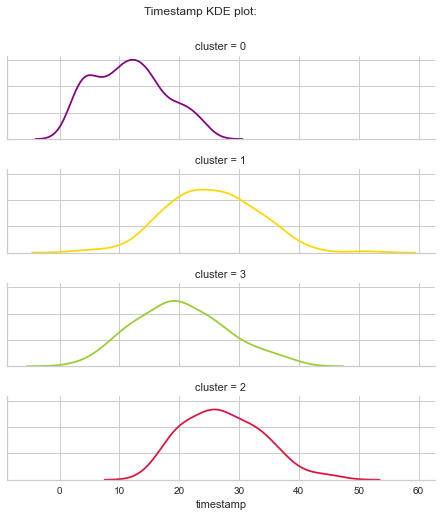

In [1542]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1543]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Katarina           16
Fizz               12
Malzahar            9
Syndra              8
Gangplank           5
Anivia              5
Zoe                 4
AurelionSol         4
TwistedFate         4
Cassiopeia          3
Sylas               2
Tristana            2
Kassadin            2
Lux                 1
Veigar              1
Irelia              1
Vladimir            1
Orianna             1
Karma               1
Brand               1
Diana               1
Yasuo               1
FiddleSticks        1
Viktor              1
Lucian              1
Akali               1

Deaths with each champion:

In [1544]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Fizz            97
Katarina        97
Malzahar        54
Syndra          46
TwistedFate     37
Gangplank       36
Zoe             29
Anivia          24
AurelionSol     23
Cassiopeia      18
Tristana        15
Sylas           13
Irelia          11
FiddleSticks    11
Brand           11
Yasuo            9
Kassadin         9
Lux              8
Karma            8
Akali            7
Orianna          7
Lucian           7
Viktor           6
Vladimir         5
Veigar           5
Diana            4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1545]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 26 champions when they won on the red side

Cluster 0 - died with 26 champions:
 ['Akali' 'Anivia' 'AurelionSol' 'Brand' 'Cassiopeia' 'Diana'
 'FiddleSticks' 'Fizz' 'Gangplank' 'Irelia' 'Karma' 'Kassadin' 'Katarina'
 'Lucian' 'Lux' 'Malzahar' 'Orianna' 'Sylas' 'Syndra' 'Tristana'
 'TwistedFate' 'Veigar' 'Viktor' 'Vladimir' 'Yasuo' 'Zoe']
Fizz            41
Katarina        37
Malzahar        15
TwistedFate     13
Zoe             13
Syndra          12
Gangplank       11
AurelionSol     10
Tristana         9
Cassiopeia       8
Anivia           8
Irelia           7
Brand            6
Kassadin         4
Karma            4
Sylas            3
Vladimir         3
Orianna          3
Yasuo            3
Lux              3
Diana            3
Viktor           3
FiddleSticks     3
Akali            2
Lucian           2
Veigar           2
Name: champion, dtype: int64

Cluster 1 - died with 23 champions:
 ['Akali' 'Anivia' 'AurelionSol' 'Brand' 'Cassiopeia' 'FiddleSticks' 'Fi

---
#### Clustering Blue Team Victory

In [1546]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

blueSideVictory_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
4784    EUW1_6274751989  Blue  anonymous 131   euw1   Anivia   3.879333   
4817    EUW1_6274751989  Blue  anonymous 131   euw1   Anivia  19.469333   
4824    EUW1_6274751989  Blue  anonymous 131   euw1   Anivia  22.916617   
4832    EUW1_6274751989  Blue  anonymous 131   euw1   Anivia  25.798383   
4926    EUW1_6274581416  Blue  anonymous 131   euw1   Syndra   8.938583   
...                 ...   ...            ...    ...      ...        ...   
639481  EUW1_6289902488  Blue  anonymous 132   euw1   Irelia   6.723983   
639487  EUW1_6289902488  Blue  anonymous 132   euw1   Irelia   9.285517   
639503  EUW1_6289902488  Blue  anonymous 132   euw1   Irelia  16.940333   
639525  EUW1_6289902488  Blue  anonymous 132   euw1   Irelia  23.086500   
639534  EUW1_6289902488  Blue  anonymous 132   euw1   Irelia  26.142217   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
4784          6540.0        6572.0    NaN            NaN  ...   
4817         10624.0        8750.0    NaN            NaN  ...   
4824          5490.0        9456.0    NaN            NaN  ...   
4832          7584.0        4750.0    NaN            NaN  ...   
4926          8614.0        4861.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
639481        8196.0        8156.0    NaN            NaN  ...   
639487        7454.0        7638.0    NaN            NaN  ...   
639503        3323.0       11010.0    NaN            NaN  ...   
639525        6749.0       13456.0    NaN            NaN  ...   
639534       13872.0       13536.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
4784                NaN     True      Death        NaN           NaN   NaN   
4817                NaN     True      Death        NaN           NaN   NaN   
4824                NaN     True      Death        NaN           NaN   NaN   
4832                NaN     True      Death        NaN           NaN   NaN   
4926                NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
639481              NaN     True      Death        NaN           NaN   NaN   
639487              NaN     True      Death        NaN           NaN   NaN   
639503              NaN     True      Death        NaN           NaN   NaN   
639525              NaN     True      Death        NaN           NaN   NaN   
639534              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
4784        NaN       NaN  MIDDLE  Gold  
4817        NaN       NaN  MIDDLE  Gold  
4824        NaN       NaN  MIDDLE  Gold  
4832        NaN       NaN  MIDDLE  Gold  
4926        NaN       NaN  MIDDLE  Gold  
...         ...       ...     ...   ...  
639481      NaN       NaN  MIDDLE  Gold  
639487      NaN       NaN  MIDDLE  Gold  
639503      NaN       NaN  MIDDLE  Gold  
639525      NaN       NaN  MIDDLE  Gold  
639534      NaN       NaN  MIDDLE  Gold  

[449 rows x 56 columns]

In [1547]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == True)].copy()

In [1548]:
blueSideGames_df = middle_deaths_df[middle_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [1549]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

90

In [1550]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

52.63157894736842

In [1551]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_middle_deaths_df.shape[0]) * 100
winRateBlueSide

8.686399690462371

In [1552]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 131 won 17 matches on the blue side
anonymous 131 has an average of 4.235294117647059 deaths per game when winning on the blue side

anonymous 132 won 9 matches on the blue side
anonymous 132 has an average of 5.777777777777778 deaths per game when winning on the blue side

anonymous 135 won 11 matches on the blue side
anonymous 135 has an average of 5.7272727272727275 deaths per game when winning on the blue side

anonymous 150 won 10 matches on the blue side
anonymous 150 has an average of 4.5 deaths per game when winning on the blue side

anonymous 152 won 7 matches on the blue side
anonymous 152 has an average of 5.571428571428571 deaths per game when winning on the blue side

anonymous 175 won 5 matches on the blue side
anonymous 175 has an average of 2.8 deaths per game when winning on the blue side

anonymous 55 won 11 matches on the blue side
anonymous 55 has an average of 4.818181818181818 deaths per game when winning on the blue side

anonymous 57 won 20 matches on 

In [1553]:
print("Victory games on blue side contains {} matches in which the middle died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 90 matches in which the middle died at least once
8 players died a total of 449 times on the blue side
Victory games on blue side contains an average of 4.988888888888889 deaths per game


In [1554]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
4784          6540.0        6572.0   3.879333
4817         10624.0        8750.0  19.469333
4824          5490.0        9456.0  22.916617
4832          7584.0        4750.0  25.798383
4926          8614.0        4861.0   8.938583
...              ...           ...        ...
639481        8196.0        8156.0   6.723983
639487        7454.0        7638.0   9.285517
639503        3323.0       11010.0  16.940333
639525        6749.0       13456.0  23.086500
639534       13872.0       13536.0  26.142217

[449 rows x 3 columns]

Time discretization

In [1555]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1556]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1557]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [1558]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [1559]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
4784       -0.608958     -0.369468         -1
4817        0.812022      0.390019          0
4824       -0.974293      0.636207          0
4832       -0.245710     -1.004814          1
4926        0.112666     -0.966107         -1
...              ...           ...        ...
639481     -0.032772      0.182886         -1
639487     -0.290942      0.002255         -1
639503     -1.728275      1.178099          0
639525     -0.536239      2.031040          0
639534      1.942125      2.058936          1

[449 rows x 3 columns]

In [1560]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3162466894651579
Silhouette score for k=3: 0.36541630215624554
Silhouette score for k=4: 0.3873166556673826
Silhouette score for k=5: 0.3861536027289196
Silhouette score for k=6: 0.3850879077856267
Silhouette score for k=7: 0.3773779921814945
Silhouette score for k=8: 0.382577653878574
Silhouette score for k=9: 0.3727482471825726
Silhouette score for k=10: 0.3341176442249123
Silhouette score for k=11: 0.3406815307858112
Silhouette score for k=12: 0.3428968860025986
Silhouette score for k=13: 0.3521214812105709
Silhouette score for k=14: 0.3565016211647471
Silhouette score for k=15: 0.366417077938435
Silhouette score for k=16: 0.3740344143473373
Silhouette score for k=17: 0.3719639729972699
Silhouette score for k=18: 0.37389657978416146
Silhouette score for k=19: 0.3772984576315757
Silhouette score for k=20: 0.3880528569281896
Silhouette score for k=25: 0.3815871769319748


K-Means with k = 4

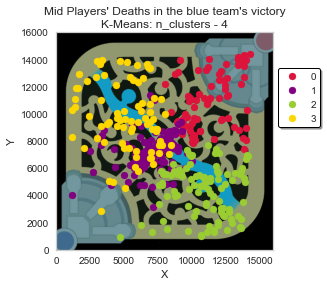

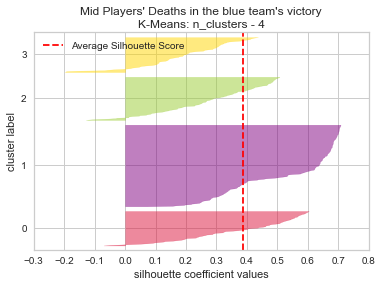

Silhouette score: 0.3873166556673826
1    188
2    100
3     81
0     80
Name: cluster, dtype: int64

Inertia: 446.819166661078

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  11264.712500  10874.112500   0.637500
1        1   6997.404255   7142.079787  -0.771277
2        2  10842.950000   4308.030000   0.140000
3        3   5201.370370   9668.086420   0.481481

In [1561]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "purple", "yellowgreen", "gold"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [1562]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1722.139027   1997.261707   0.506057
1        1   1333.394220   1095.003108   0.420011
2        2   1972.485982   1805.426922   0.678528
3        3   1930.269420   2472.843528   0.590273

In [1563]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14302.0            8032.0           14417.0   
1        1            9998.0            1213.0           11398.0   
2        2           14121.0            4738.0            7734.0   
3        3            8463.0            1171.0           13946.0   

   min coordinate_y  max timestamp  min timestamp  
0            7450.0              1             -1  
1            3162.0              0             -1  
2             935.0              1             -1  
3            2885.0              1             -1

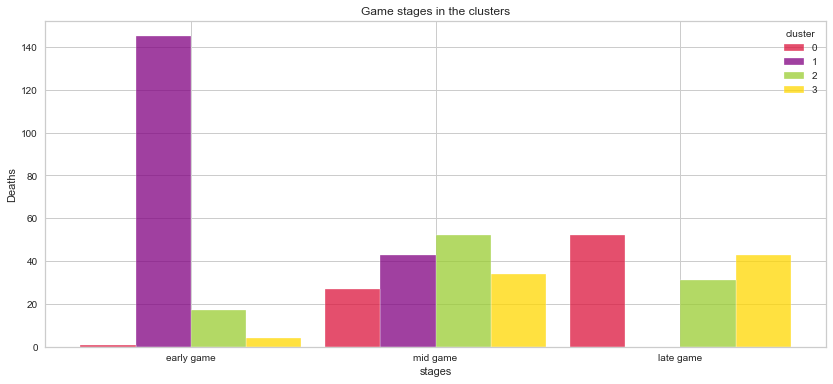

In [1564]:
stagesPerClusterV2(blueSideVictory_df, colors)

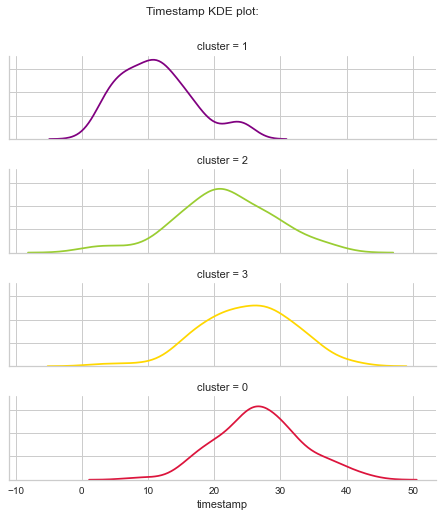

In [1565]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1566]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Fizz              16
Syndra            11
Katarina          11
Malzahar          10
TwistedFate        8
Cassiopeia         6
Anivia             6
Irelia             6
AurelionSol        5
Gangplank          2
Rumble             1
Morgana            1
JarvanIV           1
Swain              1
Velkoz             1
Yasuo              1
Sylas              1
Corki              1
Zoe                1

Deaths with each champion:

In [1567]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Fizz           79
Katarina       53
TwistedFate    48
Syndra         48
Malzahar       45
Irelia         34
Cassiopeia     34
Anivia         24
Gangplank      21
AurelionSol    13
Corki          13
JarvanIV        8
Velkoz          6
Swain           5
Morgana         5
Yasuo           5
Rumble          4
Zoe             3
Sylas           1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1568]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 19 champions when they won on the red side

Cluster 0 - died with 15 champions:
 ['Anivia' 'AurelionSol' 'Cassiopeia' 'Corki' 'Fizz' 'Gangplank' 'Irelia'
 'JarvanIV' 'Katarina' 'Malzahar' 'Morgana' 'Swain' 'Syndra' 'TwistedFate'
 'Yasuo']
Fizz           19
Katarina       15
TwistedFate    10
Malzahar        7
Irelia          7
Cassiopeia      5
Anivia          4
Syndra          4
Gangplank       3
Morgana         1
JarvanIV        1
AurelionSol     1
Swain           1
Yasuo           1
Corki           1
Name: champion, dtype: int64

Cluster 1 - died with 18 champions:
 ['Anivia' 'AurelionSol' 'Cassiopeia' 'Corki' 'Fizz' 'Gangplank' 'Irelia'
 'JarvanIV' 'Katarina' 'Malzahar' 'Morgana' 'Rumble' 'Swain' 'Syndra'
 'TwistedFate' 'Velkoz' 'Yasuo' 'Zoe']
Fizz           28
TwistedFate    24
Syndra         21
Irelia         19
Katarina       17
Malzahar       17
Cassiopeia     14
Anivia         11
Gangplank       9
Corki           6
AurelionSol     5
JarvanIV        

---
#### Clustering Blue Team Defeat

In [1569]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

blueSideDefeat_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region  champion  timestamp  \
4546    EUW1_6276196779  Blue  anonymous 131   euw1    Syndra  10.879017   
4550    EUW1_6276196779  Blue  anonymous 131   euw1    Syndra  12.552783   
4558    EUW1_6276196779  Blue  anonymous 131   euw1    Syndra  16.621050   
4563    EUW1_6276196779  Blue  anonymous 131   euw1    Syndra  19.767283   
4569    EUW1_6276196779  Blue  anonymous 131   euw1    Syndra  23.550167   
...                 ...   ...            ...    ...       ...        ...   
639458  EUW1_6289425390  Blue  anonymous 131   euw1    Syndra  24.008217   
639461  EUW1_6289425390  Blue  anonymous 131   euw1    Syndra  26.012733   
639465  EUW1_6289425390  Blue  anonymous 131   euw1    Syndra  28.973733   
640227  EUW1_6289305233  Blue  anonymous 150   euw1  Malzahar  12.187733   
640233  EUW1_6289305233  Blue  anonymous 150   euw1  Malzahar  15.752567   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
4546          2344.0        9404.0    NaN            NaN  ...   
4550          8259.0        5715.0    NaN            NaN  ...   
4558          5651.0        6469.0    NaN            NaN  ...   
4563         11184.0        1322.0    NaN            NaN  ...   
4569          6959.0        9317.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
639458        9235.0        2381.0    NaN            NaN  ...   
639461        3623.0        1409.0    NaN            NaN  ...   
639465         906.0         683.0    NaN            NaN  ...   
640227       10786.0        5388.0    NaN            NaN  ...   
640233        1681.0       12106.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
4546                NaN    False      Death        NaN           NaN   NaN   
4550                NaN    False      Death        NaN           NaN   NaN   
4558                NaN    False      Death        NaN           NaN   NaN   
4563                NaN    False      Death        NaN           NaN   NaN   
4569                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
639458              NaN    False      Death        NaN           NaN   NaN   
639461              NaN    False      Death        NaN           NaN   NaN   
639465              NaN    False      Death        NaN           NaN   NaN   
640227              NaN    False      Death        NaN           NaN   NaN   
640233              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
4546        NaN       NaN  MIDDLE  Gold  
4550        NaN       NaN  MIDDLE  Gold  
4558        NaN       NaN  MIDDLE  Gold  
4563        NaN       NaN  MIDDLE  Gold  
4569        NaN       NaN  MIDDLE  Gold  
...         ...       ...     ...   ...  
639458      NaN       NaN  MIDDLE  Gold  
639461      NaN       NaN  MIDDLE  Gold  
639465      NaN       NaN  MIDDLE  Gold  
640227      NaN       NaN  MIDDLE  Gold  
640233      NaN       NaN  MIDDLE  Gold  

[591 rows x 56 columns]

In [1570]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == False)].copy()

In [1571]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 131 lost 16 matches on the blue side
anonymous 131 has an average of 6.6875 deaths per game when losing on the blue side

anonymous 132 lost 4 matches on the blue side
anonymous 132 has an average of 8.25 deaths per game when losing on the blue side

anonymous 135 lost 6 matches on the blue side
anonymous 135 has an average of 9.166666666666666 deaths per game when losing on the blue side

anonymous 150 lost 14 matches on the blue side
anonymous 150 has an average of 6.571428571428571 deaths per game when losing on the blue side

anonymous 152 lost 6 matches on the blue side
anonymous 152 has an average of 7.833333333333333 deaths per game when losing on the blue side

anonymous 175 lost 7 matches on the blue side
anonymous 175 has an average of 6.285714285714286 deaths per game when losing on the blue side

anonymous 55 lost 11 matches on the blue side
anonymous 55 has an average of 5.545454545454546 deaths per game when losing on the blue side

anonymous 57 lost 17 matches 

In [1572]:
print("Defeat games on blue side contains {} matches in which the middle died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 81 matches in which the middle died at least once
8 players died a total of 591 times on the blue side
Defeat games on blue side contains an average of 7.296296296296297 deaths per game


In [1573]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
4546          2344.0        9404.0  10.879017
4550          8259.0        5715.0  12.552783
4558          5651.0        6469.0  16.621050
4563         11184.0        1322.0  19.767283
4569          6959.0        9317.0  23.550167
...              ...           ...        ...
639458        9235.0        2381.0  24.008217
639461        3623.0        1409.0  26.012733
639465         906.0         683.0  28.973733
640227       10786.0        5388.0  12.187733
640233        1681.0       12106.0  15.752567

[591 rows x 3 columns]

Time discretization

In [1574]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1575]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1576]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [1577]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [1578]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
4546       -1.565242      1.174183         -1
4550        0.412938     -0.174339         -1
4558       -0.459267      0.101288          0
4563        1.391158     -1.780209          0
4569       -0.021827      1.142380          0
...              ...           ...        ...
639458      0.739346     -1.393089          0
639461     -1.137500     -1.748406          1
639465     -2.046159     -2.013797          1
640227      1.258053     -0.293874         -1
640233     -1.786972      2.161905          0

[591 rows x 3 columns]

In [1579]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.30236706709084465
Silhouette score for k=3: 0.3464339400498298
Silhouette score for k=4: 0.3479409010468811
Silhouette score for k=5: 0.35051130247078316
Silhouette score for k=6: 0.3569348572545111
Silhouette score for k=7: 0.35843062235110495
Silhouette score for k=8: 0.36552037007879695
Silhouette score for k=9: 0.36007934754916976
Silhouette score for k=10: 0.3664649225038465
Silhouette score for k=11: 0.3709033185671662
Silhouette score for k=12: 0.36138847538796603
Silhouette score for k=13: 0.36989825158985346
Silhouette score for k=14: 0.36323645702267804
Silhouette score for k=15: 0.36035663674887464
Silhouette score for k=16: 0.36490486528140836
Silhouette score for k=17: 0.37148237783461424
Silhouette score for k=18: 0.3672106624792144
Silhouette score for k=19: 0.39039236235642427
Silhouette score for k=20: 0.39466719315759546
Silhouette score for k=25: 0.41343227055302784


K-Means with k = 4

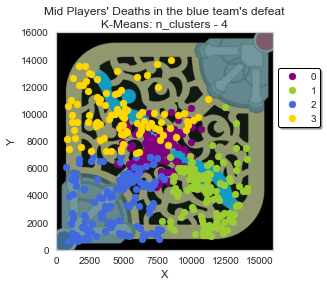

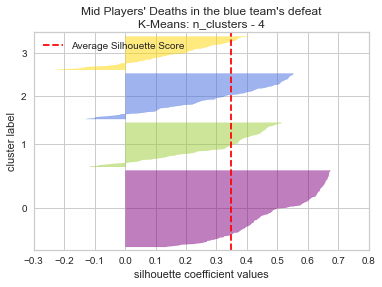

Silhouette score: 0.3479409010468811
0    226
2    135
1    131
3     99
Name: cluster, dtype: int64

Inertia: 604.9058242869829

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   7109.995575   7207.805310  -0.646018
1        1  11109.083969   4177.572519   0.091603
2        2   4474.992593   3738.911111   0.644444
3        3   4899.676768   9883.282828   0.262626

In [1580]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "yellowgreen", "royalblue", "gold"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [1581]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1147.579444   1045.376270   0.478204
1        1   1413.547927   1896.617725   0.756149
2        2   2056.361142   1926.112029   0.493914
3        3   2546.703751   1674.443963   0.690277

In [1582]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           10696.0            4501.0           10435.0   
1        1           14087.0            7832.0           10478.0   
2        2            7945.0             763.0            6927.0   
3        3           11201.0             778.0           13982.0   

   min coordinate_y  max timestamp  min timestamp  
0            4606.0              0             -1  
1            1051.0              1             -1  
2             652.0              1             -1  
3            7115.0              1             -1

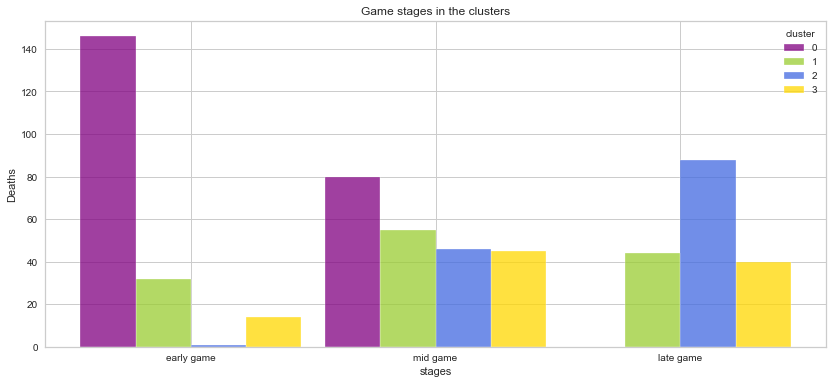

In [1583]:
stagesPerClusterV2(blueSideDefeat_df, colors)

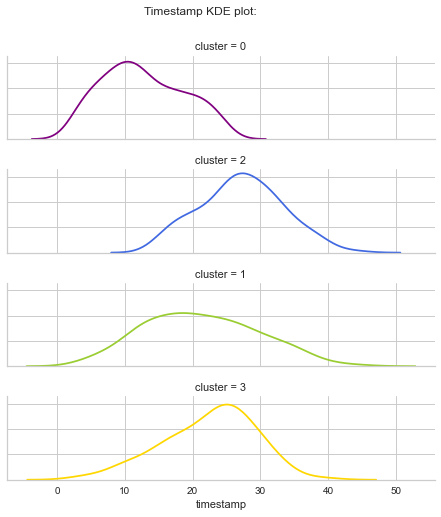

In [1584]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1585]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Malzahar          13
Katarina          11
Fizz              11
Syndra            10
Cassiopeia         7
TwistedFate        7
Gangplank          4
AurelionSol        4
Zoe                3
Lux                2
Anivia             2
Sylas              1
Lissandra          1
Swain              1
Annie              1
Vex                1
Irelia             1
Diana              1

Deaths with each champion:

In [1586]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Fizz           104
Malzahar        83
Syndra          76
Katarina        61
TwistedFate     61
Cassiopeia      51
Gangplank       32
AurelionSol     24
Zoe             17
Lux             15
Anivia          12
Lissandra       11
Irelia          11
Swain           10
Diana           10
Sylas            6
Annie            4
Vex              3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1587]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 18 champions when they won on the red side

Cluster 0 - died with 18 champions:
 ['Anivia' 'Annie' 'AurelionSol' 'Cassiopeia' 'Diana' 'Fizz' 'Gangplank'
 'Irelia' 'Katarina' 'Lissandra' 'Lux' 'Malzahar' 'Swain' 'Sylas' 'Syndra'
 'TwistedFate' 'Vex' 'Zoe']
Fizz           42
Malzahar       32
Syndra         27
TwistedFate    24
Cassiopeia     20
Katarina       16
Anivia          9
AurelionSol     9
Gangplank       8
Irelia          8
Zoe             7
Lux             6
Diana           5
Lissandra       5
Swain           4
Annie           2
Vex             1
Sylas           1
Name: champion, dtype: int64

Cluster 1 - died with 17 champions:
 ['Annie' 'AurelionSol' 'Cassiopeia' 'Diana' 'Fizz' 'Gangplank' 'Irelia'
 'Katarina' 'Lissandra' 'Lux' 'Malzahar' 'Swain' 'Sylas' 'Syndra'
 'TwistedFate' 'Vex' 'Zoe']
Fizz           26
Syndra         20
Cassiopeia     15
TwistedFate    14
Malzahar       13
Katarina       12
Gangplank       7
AurelionSol     6
Zoe            

---
### Platinum Players

#### Clustering Red Team Victory

In [1588]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

redSideVictory_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
2646    EUW1_6275822398  Red  anonymous 126   euw1   Akshan   3.739667   
2663    EUW1_6275822398  Red  anonymous 126   euw1   Akshan  11.911217   
2671    EUW1_6275822398  Red  anonymous 126   euw1   Akshan  15.924683   
2677    EUW1_6275822398  Red  anonymous 126   euw1   Akshan  18.184633   
2683    EUW1_6275822398  Red  anonymous 126   euw1   Akshan  20.952450   
...                 ...  ...            ...    ...      ...        ...   
638924  EUW1_6289519934  Red  anonymous 126   euw1   Akshan  14.159283   
638928  EUW1_6289519934  Red  anonymous 126   euw1   Akshan  16.656267   
638942  EUW1_6289519934  Red  anonymous 126   euw1   Akshan  22.343300   
638944  EUW1_6289519934  Red  anonymous 126   euw1   Akshan  23.679633   
638950  EUW1_6289519934  Red  anonymous 126   euw1   Akshan  26.354333   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
2646          8154.0        7570.0    NaN            NaN  ...   
2663          7159.0        6413.0    NaN            NaN  ...   
2671          4583.0        9817.0    NaN            NaN  ...   
2677         10663.0       10167.0    NaN            NaN  ...   
2683         13531.0        4995.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
638924        9900.0        5626.0    NaN            NaN  ...   
638928       12656.0        1449.0    NaN            NaN  ...   
638942       11988.0        3530.0    NaN            NaN  ...   
638944        7560.0        6803.0    NaN            NaN  ...   
638950       11065.0        4221.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
2646                NaN     True      Death        NaN           NaN   NaN   
2663                NaN     True      Death        NaN           NaN   NaN   
2671                NaN     True      Death        NaN           NaN   NaN   
2677                NaN     True      Death        NaN           NaN   NaN   
2683                NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
638924              NaN     True      Death        NaN           NaN   NaN   
638928              NaN     True      Death        NaN           NaN   NaN   
638942              NaN     True      Death        NaN           NaN   NaN   
638944              NaN     True      Death        NaN           NaN   NaN   
638950              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
2646        NaN       NaN  MIDDLE  Platinum  
2663        NaN       NaN  MIDDLE  Platinum  
2671        NaN       NaN  MIDDLE  Platinum  
2677        NaN       NaN  MIDDLE  Platinum  
2683        NaN       NaN  MIDDLE  Platinum  
...         ...       ...     ...       ...  
638924      NaN       NaN  MIDDLE  Platinum  
638928      NaN       NaN  MIDDLE  Platinum  
638942      NaN       NaN  MIDDLE  Platinum  
638944      NaN       NaN  MIDDLE  Platinum  
638950      NaN       NaN  MIDDLE  Platinum  

[590 rows x 56 columns]

In [1589]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == True)].copy()

In [1590]:
redSideGames_df = middle_deaths_df[middle_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [1591]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

110

In [1592]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

55.27638190954774

In [1593]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_middle_deaths_df.shape[0]) * 100
winRateRedSide

10.19350380096752

In [1594]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 126 won 10 matches on the red side
anonymous 126 has an average of 5.7 deaths per game when winning on the red side

anonymous 163 won 8 matches on the red side
anonymous 163 has an average of 3.75 deaths per game when winning on the red side

anonymous 166 won 11 matches on the red side
anonymous 166 has an average of 3.5454545454545454 deaths per game when winning on the red side

anonymous 23 won 16 matches on the red side
anonymous 23 has an average of 5.1875 deaths per game when winning on the red side

anonymous 26 won 21 matches on the red side
anonymous 26 has an average of 8.095238095238095 deaths per game when winning on the red side

anonymous 32 won 8 matches on the red side
anonymous 32 has an average of 5.125 deaths per game when winning on the red side

anonymous 39 won 19 matches on the red side
anonymous 39 has an average of 3.473684210526316 deaths per game when winning on the red side

anonymous 46 won 17 matches on the red side
anonymous 46 has an average 

In [1595]:
print("Victory games on red side contains {} matches in which the middle died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 110 matches in which the middle died at least once
8 players died a total of 590 times on the red side
Victory games on red side contains an average of 5.363636363636363 deaths per game


In [1596]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
2646          8154.0        7570.0   3.739667
2663          7159.0        6413.0  11.911217
2671          4583.0        9817.0  15.924683
2677         10663.0       10167.0  18.184633
2683         13531.0        4995.0  20.952450
...              ...           ...        ...
638924        9900.0        5626.0  14.159283
638928       12656.0        1449.0  16.656267
638942       11988.0        3530.0  22.343300
638944        7560.0        6803.0  23.679633
638950       11065.0        4221.0  26.354333

[590 rows x 3 columns]

Time discretization

In [1597]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1598]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1599]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [1600]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [1601]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
2646        0.137418      0.267219         -1
2663       -0.194400     -0.135139         -1
2671       -1.053458      1.048634          0
2677        0.974133      1.170350          0
2683        1.930569     -0.628261          0
...              ...           ...        ...
638924      0.719684     -0.408825         -1
638928      1.638770     -1.861416          0
638942      1.416001     -1.137729          0
638944     -0.060672      0.000487          0
638950      1.108194     -0.897427          1

[590 rows x 3 columns]

In [1602]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.31705446673795146
Silhouette score for k=3: 0.3518441144599501
Silhouette score for k=4: 0.393669348640864
Silhouette score for k=5: 0.39303881657500994
Silhouette score for k=6: 0.3864106066418807
Silhouette score for k=7: 0.39814090889706416
Silhouette score for k=8: 0.40530855204962907
Silhouette score for k=9: 0.40396729694241373
Silhouette score for k=10: 0.38622322324027314
Silhouette score for k=11: 0.3580871782504369
Silhouette score for k=12: 0.393581937238073
Silhouette score for k=13: 0.35654221022680765
Silhouette score for k=14: 0.3659678338090335
Silhouette score for k=15: 0.3542824887497836
Silhouette score for k=16: 0.36178278524996954
Silhouette score for k=17: 0.38387398175972265
Silhouette score for k=18: 0.38955374599254894
Silhouette score for k=19: 0.3820023118271935
Silhouette score for k=20: 0.38849229965845444
Silhouette score for k=25: 0.39664543964359916


K-Means with k = 4

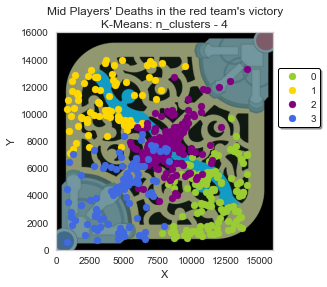

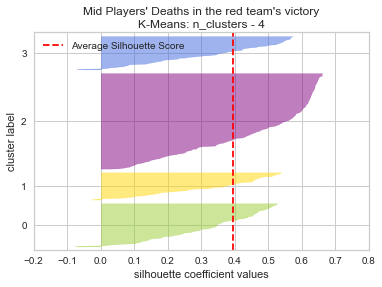

Silhouette score: 0.393669348640864
2    282
0    128
3     99
1     81
Name: cluster, dtype: int64

Inertia: 579.8961957947824

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  11443.734375   3991.796875   0.125000
1        1   3854.555556  10799.432099  -0.185185
2        2   8223.361702   7752.106383  -0.602837
3        3   4765.010101   4456.010101   0.676768

In [1603]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "purple", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [1604]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1498.886824   2043.087788   0.673146
1        1   1966.424555   1777.445809   0.630718
2        2   1222.683436   1366.659115   0.588054
3        3   1912.253473   2148.701217   0.488830

In [1605]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14091.0            7786.0            9690.0   
1        1            9465.0             782.0           13996.0   
2        2           14067.0            5478.0           13306.0   
3        3            8337.0             797.0            8501.0   

   min coordinate_y  max timestamp  min timestamp  
0             870.0              1             -1  
1            7158.0              1             -1  
2            3616.0              1             -1  
3             580.0              1             -1

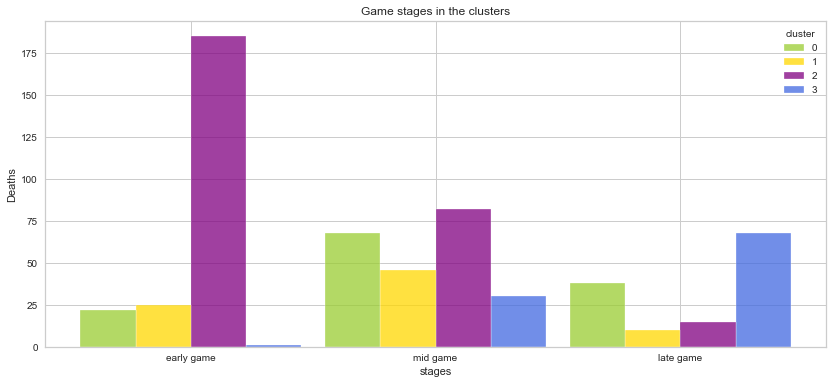

In [1606]:
stagesPerClusterV2(redSideVictory_df, colors)

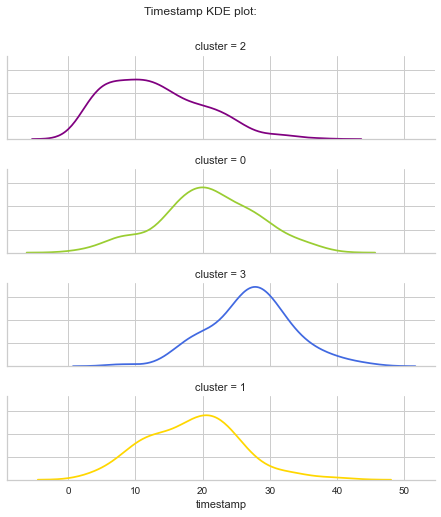

In [1607]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1608]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Taliyah         13
Akali           13
Akshan          12
Lux              9
Velkoz           8
Syndra           8
Kassadin         5
Orianna          4
Vladimir         4
Ahri             4
Malzahar         3
Sylas            3
Viktor           3
Morgana          3
Galio            3
Azir             2
Leblanc          2
Tristana         1
Kennen           1
Seraphine        1
Swain            1
Riven            1
Katarina         1
Vex              1
Qiyana           1
Jayce            1
Zoe              1
Zed              1

Deaths with each champion:

In [1609]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Akali        101
Taliyah       82
Akshan        63
Velkoz        41
Syndra        35
Lux           25
Orianna       21
Viktor        20
Kassadin      19
Ahri          18
Zed           17
Sylas         16
Vladimir      15
Qiyana        14
Kennen        12
Malzahar      11
Galio         11
Riven         10
Morgana       10
Katarina       9
Zoe            8
Azir           7
Vex            6
Seraphine      5
Leblanc        5
Swain          4
Jayce          3
Tristana       2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1610]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 28 champions when they won on the red side

Cluster 0 - died with 25 champions:
 ['Ahri' 'Akali' 'Akshan' 'Azir' 'Galio' 'Jayce' 'Kassadin' 'Kennen'
 'Leblanc' 'Lux' 'Malzahar' 'Morgana' 'Orianna' 'Qiyana' 'Riven' 'Swain'
 'Sylas' 'Syndra' 'Taliyah' 'Velkoz' 'Vex' 'Viktor' 'Vladimir' 'Zed' 'Zoe']
Taliyah     23
Akshan      18
Akali       17
Velkoz       8
Ahri         6
Syndra       6
Kennen       5
Lux          4
Sylas        4
Morgana      4
Vladimir     4
Viktor       3
Zoe          3
Riven        3
Galio        3
Malzahar     3
Orianna      3
Kassadin     2
Vex          2
Zed          2
Azir         1
Swain        1
Jayce        1
Qiyana       1
Leblanc      1
Name: champion, dtype: int64

Cluster 1 - died with 22 champions:
 ['Ahri' 'Akali' 'Akshan' 'Kassadin' 'Katarina' 'Kennen' 'Leblanc' 'Lux'
 'Malzahar' 'Morgana' 'Orianna' 'Qiyana' 'Swain' 'Sylas' 'Syndra'
 'Taliyah' 'Velkoz' 'Vex' 'Viktor' 'Vladimir' 'Zed' 'Zoe']
Akali       16
Akshan       7
Lux  

---
#### Clustering Red Team Defeat

In [1611]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

redSideDefeat_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region champion  timestamp  \
2384    EUW1_6276376169  Red  anonymous 126   euw1   Akshan   5.885950   
2386    EUW1_6276376169  Red  anonymous 126   euw1   Akshan   6.703000   
2396    EUW1_6276376169  Red  anonymous 126   euw1   Akshan  10.661433   
2402    EUW1_6276376169  Red  anonymous 126   euw1   Akshan  13.869350   
2412    EUW1_6276376169  Red  anonymous 126   euw1   Akshan  17.573400   
...                 ...  ...            ...    ...      ...        ...   
638836  EUW1_6289639855  Red  anonymous 126   euw1   Akshan  16.759917   
638848  EUW1_6289639855  Red  anonymous 126   euw1   Akshan  21.250850   
638850  EUW1_6289639855  Red  anonymous 126   euw1   Akshan  22.426150   
638855  EUW1_6289639855  Red  anonymous 126   euw1   Akshan  24.038700   
638859  EUW1_6289639855  Red  anonymous 126   euw1   Akshan  27.271150   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
2384         12800.0        2058.0    NaN            NaN  ...   
2386          6279.0        4919.0    NaN            NaN  ...   
2396          7522.0        6988.0    NaN            NaN  ...   
2402         12009.0        2803.0    NaN            NaN  ...   
2412          7795.0       11773.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
638836       12785.0        5093.0    NaN            NaN  ...   
638848        4177.0        9502.0    NaN            NaN  ...   
638850       11504.0        8000.0    NaN            NaN  ...   
638855        4593.0        9214.0    NaN            NaN  ...   
638859       12195.0        2817.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
2384                NaN    False      Death        NaN           NaN   NaN   
2386                NaN    False      Death        NaN           NaN   NaN   
2396                NaN    False      Death        NaN           NaN   NaN   
2402                NaN    False      Death        NaN           NaN   NaN   
2412                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
638836              NaN    False      Death        NaN           NaN   NaN   
638848              NaN    False      Death        NaN           NaN   NaN   
638850              NaN    False      Death        NaN           NaN   NaN   
638855              NaN    False      Death        NaN           NaN   NaN   
638859              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
2384        NaN       NaN  MIDDLE  Platinum  
2386        NaN       NaN  MIDDLE  Platinum  
2396        NaN       NaN  MIDDLE  Platinum  
2402        NaN       NaN  MIDDLE  Platinum  
2412        NaN       NaN  MIDDLE  Platinum  
...         ...       ...     ...       ...  
638836      NaN       NaN  MIDDLE  Platinum  
638848      NaN       NaN  MIDDLE  Platinum  
638850      NaN       NaN  MIDDLE  Platinum  
638855      NaN       NaN  MIDDLE  Platinum  
638859      NaN       NaN  MIDDLE  Platinum  

[611 rows x 56 columns]

In [1612]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Red") & (middle_deaths_df["victory"] == False)].copy()

In [1613]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 126 lost 9 matches on the red side
anonymous 126 has an average of 7.888888888888889 deaths per game when losing on the red side

anonymous 163 lost 7 matches on the red side
anonymous 163 has an average of 6.0 deaths per game when losing on the red side

anonymous 166 lost 8 matches on the red side
anonymous 166 has an average of 6.125 deaths per game when losing on the red side

anonymous 23 lost 21 matches on the red side
anonymous 23 has an average of 6.9523809523809526 deaths per game when losing on the red side

anonymous 26 lost 13 matches on the red side
anonymous 26 has an average of 8.846153846153847 deaths per game when losing on the red side

anonymous 32 lost 7 matches on the red side
anonymous 32 has an average of 7.714285714285714 deaths per game when losing on the red side

anonymous 39 lost 15 matches on the red side
anonymous 39 has an average of 4.466666666666667 deaths per game when losing on the red side

anonymous 46 lost 9 matches on the red side
anonym

In [1614]:
print("Defeat games on red side contains {} matches in which the middle died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 89 matches in which the middle died at least once
8 players died a total of 611 times on the red side
Defeat games on red side contains an average of 6.865168539325842 deaths per game


In [1615]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
2384         12800.0        2058.0   5.885950
2386          6279.0        4919.0   6.703000
2396          7522.0        6988.0  10.661433
2402         12009.0        2803.0  13.869350
2412          7795.0       11773.0  17.573400
...              ...           ...        ...
638836       12785.0        5093.0  16.759917
638848        4177.0        9502.0  21.250850
638850       11504.0        8000.0  22.426150
638855        4593.0        9214.0  24.038700
638859       12195.0        2817.0  27.271150

[611 rows x 3 columns]

Time discretization

In [1616]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1617]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1618]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [1619]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [1620]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
2384        1.465120     -2.087332         -1
2386       -0.865972     -1.101379         -1
2396       -0.421631     -0.388363         -1
2402        1.182358     -1.830591         -1
2412       -0.324041      1.260636          0
...              ...           ...        ...
638836      1.459758     -1.041415          0
638848     -1.617384      0.478008          0
638850      1.001833     -0.039609          0
638855     -1.468674      0.378758          0
638859      1.248848     -1.825767          1

[611 rows x 3 columns]

In [1621]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.293493436376282
Silhouette score for k=3: 0.33413261600613586
Silhouette score for k=4: 0.37522987550203657
Silhouette score for k=5: 0.3700555570386342
Silhouette score for k=6: 0.3703189478182354
Silhouette score for k=7: 0.36951940087569435
Silhouette score for k=8: 0.3736063721146357
Silhouette score for k=9: 0.37985496574559796
Silhouette score for k=10: 0.3603341414887224
Silhouette score for k=11: 0.3700190783748525
Silhouette score for k=12: 0.34006965280156604
Silhouette score for k=13: 0.3490293712678436
Silhouette score for k=14: 0.34669455028706975
Silhouette score for k=15: 0.3511038677354094
Silhouette score for k=16: 0.36049791960834426
Silhouette score for k=17: 0.36764782543124475
Silhouette score for k=18: 0.36860809994407445
Silhouette score for k=19: 0.3776313789256803
Silhouette score for k=20: 0.3463859303921966
Silhouette score for k=25: 0.3930728166576076


K-Means with k = 4

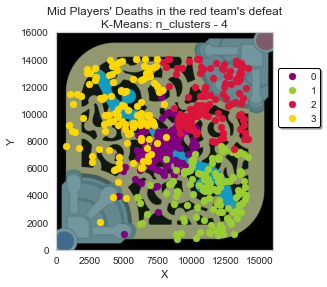

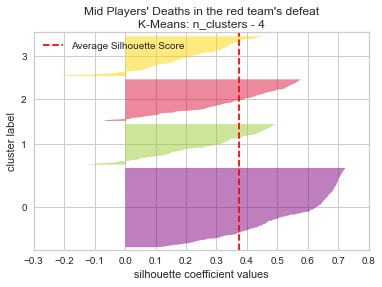

Silhouette score: 0.37522987550203657
0    241
2    126
1    123
3    121
Name: cluster, dtype: int64

Inertia: 608.0543349427303

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   7967.195021   7625.240664  -0.726141
1        1  11199.691057   4346.772358   0.138211
2        2  11209.698413  10913.912698   0.468254
3        3   5012.570248  10006.090909   0.347107

In [1622]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "yellowgreen", "crimson", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [1623]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1027.709438   1156.629020   0.445937
1        1   1877.698349   1823.192442   0.713690
2        2   1712.549071   1811.744941   0.514651
3        3   1787.827671   2532.030006   0.651898

In [1624]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           10339.0            4567.0           11225.0   
1        1           14096.0            5974.0            7629.0   
2        2           14165.0            7896.0           14064.0   
3        3            8132.0             776.0           14061.0   

   min coordinate_y  max timestamp  min timestamp  
0            1145.0              0             -1  
1             824.0              1             -1  
2            7406.0              1             -1  
3            2072.0              1             -1

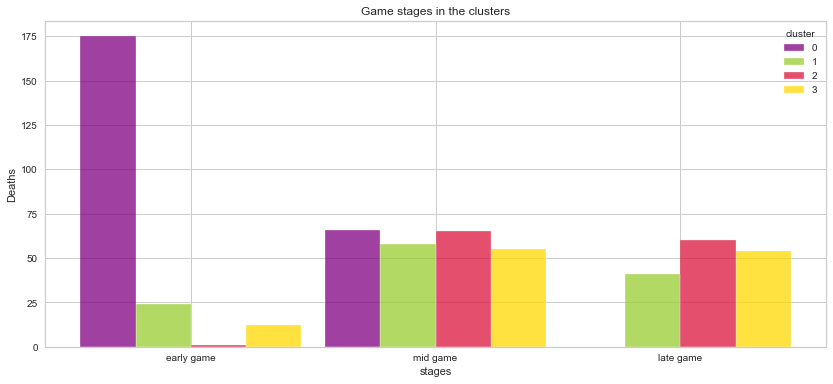

In [1625]:
stagesPerClusterV2(redSideDefeat_df, colors)

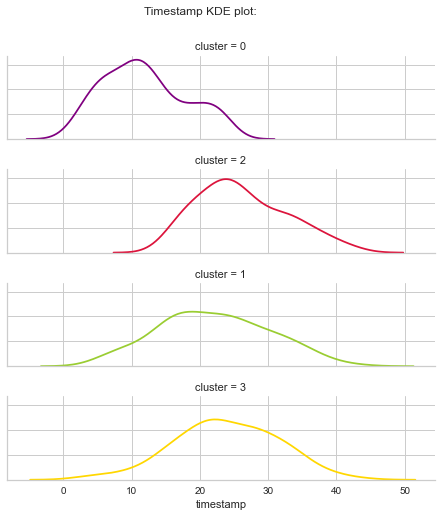

In [1626]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1627]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Akali             12
Akshan             9
Taliyah            8
Vex                8
Velkoz             7
Galio              7
Kassadin           6
Azir               4
Syndra             4
Lux                3
Orianna            3
Kennen             3
Viego              2
Morgana            2
Viktor             2
Yone               1
Nasus              1
Seraphine          1
Cassiopeia         1
Talon              1
Leblanc            1
Ahri               1
Veigar             1
AurelionSol        1

Deaths with each champion:

In [1628]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Akali          101
Taliyah         69
Akshan          67
Velkoz          54
Vex             48
Galio           38
Kassadin        35
Azir            25
Syndra          23
Kennen          22
Viktor          20
Viego           16
Orianna         16
Talon           11
Yone            10
Morgana         10
Lux              9
AurelionSol      8
Nasus            7
Cassiopeia       6
Veigar           6
Seraphine        5
Ahri             4
Leblanc          1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1629]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 24 champions when they won on the red side

Cluster 0 - died with 24 champions:
 ['Ahri' 'Akali' 'Akshan' 'AurelionSol' 'Azir' 'Cassiopeia' 'Galio'
 'Kassadin' 'Kennen' 'Leblanc' 'Lux' 'Morgana' 'Nasus' 'Orianna'
 'Seraphine' 'Syndra' 'Taliyah' 'Talon' 'Veigar' 'Velkoz' 'Vex' 'Viego'
 'Viktor' 'Yone']
Akali          37
Akshan         28
Velkoz         20
Taliyah        18
Vex            18
Kennen         15
Kassadin       15
Galio          14
Viego          10
Viktor         10
Orianna        10
Syndra          8
Azir            7
Yone            6
Lux             6
Veigar          4
Cassiopeia      3
AurelionSol     3
Talon           2
Morgana         2
Nasus           2
Seraphine       1
Ahri            1
Leblanc         1
Name: champion, dtype: int64

Cluster 1 - died with 22 champions:
 ['Ahri' 'Akali' 'Akshan' 'AurelionSol' 'Azir' 'Cassiopeia' 'Galio'
 'Kassadin' 'Kennen' 'Lux' 'Morgana' 'Nasus' 'Orianna' 'Seraphine'
 'Syndra' 'Taliyah' 'Talon' 'Veigar'

---
#### Clustering Blue Team Victory

In [1630]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

blueSideVictory_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
10763   EUW1_6280073833  Blue  anonymous 126   euw1      Vex   7.129967   
10768   EUW1_6280073833  Blue  anonymous 126   euw1      Vex   8.389567   
10775   EUW1_6280073833  Blue  anonymous 126   euw1      Vex  11.457200   
10840   EUW1_6280014912  Blue  anonymous 126   euw1      Vex  12.228217   
10847   EUW1_6280014912  Blue  anonymous 126   euw1      Vex  16.001850   
...                 ...   ...            ...    ...      ...        ...   
638992  EUW1_6289452154  Blue  anonymous 126   euw1      Vex  12.440333   
638996  EUW1_6289452154  Blue  anonymous 126   euw1      Vex  14.014700   
639010  EUW1_6289452154  Blue  anonymous 126   euw1      Vex  20.776183   
639017  EUW1_6289452154  Blue  anonymous 126   euw1      Vex  23.170750   
639020  EUW1_6289452154  Blue  anonymous 126   euw1      Vex  24.793417   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
10763        13538.0        5467.0    NaN            NaN  ...   
10768         6062.0        6930.0    NaN            NaN  ...   
10775         7167.0        6740.0    NaN            NaN  ...   
10840         7221.0        8966.0    NaN            NaN  ...   
10847        11461.0        6446.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
638992        9536.0        6044.0    NaN            NaN  ...   
638996        8283.0        5053.0    NaN            NaN  ...   
639010        4981.0        9362.0    NaN            NaN  ...   
639017       13029.0        2480.0    NaN            NaN  ...   
639020        8889.0        8880.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
10763               NaN     True      Death        NaN           NaN   NaN   
10768               NaN     True      Death        NaN           NaN   NaN   
10775               NaN     True      Death        NaN           NaN   NaN   
10840               NaN     True      Death        NaN           NaN   NaN   
10847               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
638992              NaN     True      Death        NaN           NaN   NaN   
638996              NaN     True      Death        NaN           NaN   NaN   
639010              NaN     True      Death        NaN           NaN   NaN   
639017              NaN     True      Death        NaN           NaN   NaN   
639020              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
10763       NaN       NaN  MIDDLE  Platinum  
10768       NaN       NaN  MIDDLE  Platinum  
10775       NaN       NaN  MIDDLE  Platinum  
10840       NaN       NaN  MIDDLE  Platinum  
10847       NaN       NaN  MIDDLE  Platinum  
...         ...       ...     ...       ...  
638992      NaN       NaN  MIDDLE  Platinum  
638996      NaN       NaN  MIDDLE  Platinum  
639010      NaN       NaN  MIDDLE  Platinum  
639017      NaN       NaN  MIDDLE  Platinum  
639020      NaN       NaN  MIDDLE  Platinum  

[326 rows x 56 columns]

In [1631]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == True)].copy()

In [1632]:
blueSideGames_df = middle_deaths_df[middle_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [1633]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

79

In [1634]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

46.74556213017752

In [1635]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_middle_deaths_df.shape[0]) * 100
winRateBlueSide

6.306829173921455

In [1636]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 126 won 10 matches on the blue side
anonymous 126 has an average of 4.8 deaths per game when winning on the blue side

anonymous 163 won 13 matches on the blue side
anonymous 163 has an average of 3.769230769230769 deaths per game when winning on the blue side

anonymous 166 won 8 matches on the blue side
anonymous 166 has an average of 3.25 deaths per game when winning on the blue side

anonymous 23 won 8 matches on the blue side
anonymous 23 has an average of 5.25 deaths per game when winning on the blue side

anonymous 26 won 11 matches on the blue side
anonymous 26 has an average of 5.363636363636363 deaths per game when winning on the blue side

anonymous 32 won 7 matches on the blue side
anonymous 32 has an average of 4.285714285714286 deaths per game when winning on the blue side

anonymous 39 won 15 matches on the blue side
anonymous 39 has an average of 2.933333333333333 deaths per game when winning on the blue side

anonymous 46 won 7 matches on the blue side
anonym

In [1637]:
print("Victory games on blue side contains {} matches in which the middle died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 79 matches in which the middle died at least once
8 players died a total of 326 times on the blue side
Victory games on blue side contains an average of 4.1265822784810124 deaths per game


In [1638]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
10763        13538.0        5467.0   7.129967
10768         6062.0        6930.0   8.389567
10775         7167.0        6740.0  11.457200
10840         7221.0        8966.0  12.228217
10847        11461.0        6446.0  16.001850
...              ...           ...        ...
638992        9536.0        6044.0  12.440333
638996        8283.0        5053.0  14.014700
639010        4981.0        9362.0  20.776183
639017       13029.0        2480.0  23.170750
639020        8889.0        8880.0  24.793417

[326 rows x 3 columns]

Time discretization

In [1639]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1640]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1641]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [1642]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [1643]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
10763       1.893092     -0.608779         -1
10768      -0.698898     -0.102467         -1
10775      -0.315785     -0.168221         -1
10840      -0.297063      0.602148         -1
10847       1.172979     -0.269968          0
...              ...           ...        ...
638992      0.505566     -0.409092         -1
638996      0.071141     -0.752055         -1
639010     -1.073689      0.739195          0
639017      1.716618     -1.642513          0
639020      0.281246      0.572385          0

[326 rows x 3 columns]

In [1644]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.32253468181899103
Silhouette score for k=3: 0.36439311965596005
Silhouette score for k=4: 0.3871349648305245
Silhouette score for k=5: 0.403433651033662
Silhouette score for k=6: 0.386195199320485
Silhouette score for k=7: 0.388843071965388
Silhouette score for k=8: 0.3904123120332104
Silhouette score for k=9: 0.3924548665256305
Silhouette score for k=10: 0.35609325038207457
Silhouette score for k=11: 0.3462703277978561
Silhouette score for k=12: 0.3653442489505436
Silhouette score for k=13: 0.36724963324072085
Silhouette score for k=14: 0.36506299994868896
Silhouette score for k=15: 0.3752544397562855
Silhouette score for k=16: 0.3755073485376248
Silhouette score for k=17: 0.3759266616106724
Silhouette score for k=18: 0.38499832795726535
Silhouette score for k=19: 0.40239964146851104
Silhouette score for k=20: 0.41925079301665047
Silhouette score for k=25: 0.4243095179544484


K-Means with k = 4

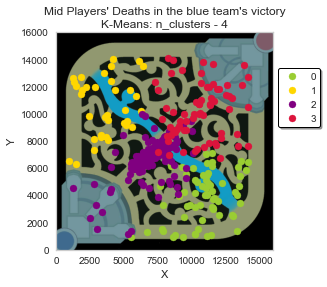

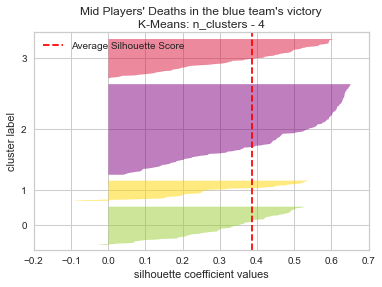

Silhouette score: 0.3871349648305245
2    157
3     68
0     66
1     35
Name: cluster, dtype: int64

Inertia: 325.78454096596005

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10852.984848   3900.878788   0.060606
1        1   3620.285714  10573.714286  -0.114286
2        2   6825.063694   6590.000000  -0.611465
3        3  10570.941176  10199.029412   0.602941

In [1645]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "purple", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [1646]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1784.653345   1782.838820   0.648513
1        1   1562.369639   2103.825842   0.622044
2        2   1423.877771   1389.023852   0.593486
3        3   1820.032998   1984.314921   0.489288

In [1647]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14140.0            5501.0            7095.0   
1        1            6423.0             943.0           14005.0   
2        2           10094.0            1236.0            9984.0   
3        3           14137.0            7312.0           14123.0   

   min coordinate_y  max timestamp  min timestamp  
0             910.0              1             -1  
1            6298.0              1             -1  
2            1176.0              1             -1  
3            6736.0              1              0

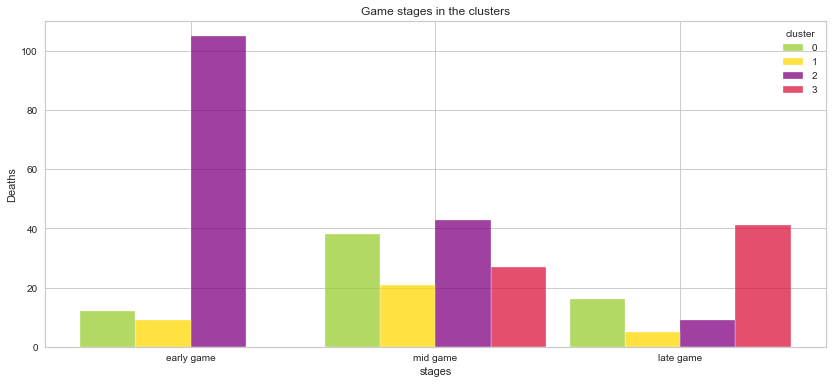

In [1648]:
stagesPerClusterV2(blueSideVictory_df, colors)

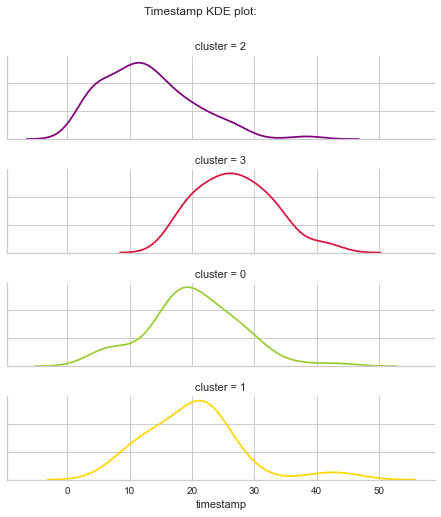

In [1649]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1650]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Vex               10
Kassadin           8
Velkoz             8
Akali              6
Akshan             6
Lux                5
Galio              4
Taliyah            4
Seraphine          4
Syndra             4
Leblanc            3
Viktor             2
Jayce              2
Tristana           2
Azir               2
Sylas              1
Malzahar           1
Zoe                1
AurelionSol        1
Orianna            1
Ahri               1
Karma              1
Anivia             1
Katarina           1

Deaths with each champion:

In [1651]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Vex            48
Akshan         37
Velkoz         31
Akali          25
Kassadin       25
Syndra         20
Taliyah        16
Leblanc        14
Lux            12
Jayce          11
AurelionSol    10
Tristana       10
Azir            9
Malzahar        9
Galio           8
Katarina        8
Zoe             7
Viktor          6
Orianna         6
Seraphine       6
Ahri            3
Sylas           2
Karma           2
Anivia          1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1652]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 24 champions when they won on the red side

Cluster 0 - died with 23 champions:
 ['Ahri' 'Akali' 'Akshan' 'Anivia' 'AurelionSol' 'Azir' 'Galio' 'Jayce'
 'Karma' 'Kassadin' 'Katarina' 'Leblanc' 'Lux' 'Malzahar' 'Seraphine'
 'Sylas' 'Syndra' 'Taliyah' 'Tristana' 'Velkoz' 'Vex' 'Viktor' 'Zoe']
Vex            14
Velkoz          7
Malzahar        6
AurelionSol     4
Taliyah         4
Kassadin        3
Akshan          3
Leblanc         3
Jayce           2
Katarina        2
Galio           2
Seraphine       2
Akali           2
Viktor          2
Tristana        2
Sylas           1
Zoe             1
Ahri            1
Syndra          1
Azir            1
Anivia          1
Karma           1
Lux             1
Name: champion, dtype: int64

Cluster 1 - died with 13 champions:
 ['Ahri' 'Akali' 'Akshan' 'Azir' 'Galio' 'Jayce' 'Leblanc' 'Orianna'
 'Syndra' 'Taliyah' 'Velkoz' 'Vex' 'Zoe']
Akshan     7
Vex        6
Akali      6
Leblanc    3
Azir       3
Syndra     3
Galio      

---
#### Clustering Blue Team Defeat

In [1653]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

blueSideDefeat_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region   champion  timestamp  \
2516    EUW1_6276036648  Blue  anonymous 126   euw1   Kassadin   2.906283   
2527    EUW1_6276036648  Blue  anonymous 126   euw1   Kassadin   8.165033   
2534    EUW1_6276036648  Blue  anonymous 126   euw1   Kassadin  11.476917   
2541    EUW1_6276036648  Blue  anonymous 126   euw1   Kassadin  14.367867   
2545    EUW1_6276036648  Blue  anonymous 126   euw1   Kassadin  16.459683   
...                 ...   ...            ...    ...        ...        ...   
609493  EUW1_6288286194  Blue  anonymous 126   euw1        Vex  17.745283   
609507  EUW1_6288286194  Blue  anonymous 126   euw1        Vex  24.709067   
615307  EUW1_6287591467  Blue  anonymous 163   euw1  Gangplank   8.294683   
615321  EUW1_6287591467  Blue  anonymous 163   euw1  Gangplank  16.158483   
615325  EUW1_6287591467  Blue  anonymous 163   euw1  Gangplank  18.674300   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
2516          5578.0        6001.0    NaN            NaN  ...   
2527          2873.0       12875.0    NaN            NaN  ...   
2534         10742.0        5116.0    NaN            NaN  ...   
2541          8762.0        9209.0    NaN            NaN  ...   
2545         11429.0        1491.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
609493        7894.0        5012.0    NaN            NaN  ...   
609507        3007.0        1555.0    NaN            NaN  ...   
615307        6774.0        6916.0    NaN            NaN  ...   
615321        7133.0        6570.0    NaN            NaN  ...   
615325       11899.0        1079.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
2516                NaN    False      Death        NaN           NaN   NaN   
2527                NaN    False      Death        NaN           NaN   NaN   
2534                NaN    False      Death        NaN           NaN   NaN   
2541                NaN    False      Death        NaN           NaN   NaN   
2545                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
609493              NaN    False      Death        NaN           NaN   NaN   
609507              NaN    False      Death        NaN           NaN   NaN   
615307              NaN    False      Death        NaN           NaN   NaN   
615321              NaN    False      Death        NaN           NaN   NaN   
615325              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
2516        NaN       NaN  MIDDLE  Platinum  
2527        NaN       NaN  MIDDLE  Platinum  
2534        NaN       NaN  MIDDLE  Platinum  
2541        NaN       NaN  MIDDLE  Platinum  
2545        NaN       NaN  MIDDLE  Platinum  
...         ...       ...     ...       ...  
609493      NaN       NaN  MIDDLE  Platinum  
609507      NaN       NaN  MIDDLE  Platinum  
615307      NaN       NaN  MIDDLE  Platinum  
615321      NaN       NaN  MIDDLE  Platinum  
615325      NaN       NaN  MIDDLE  Platinum  

[589 rows x 56 columns]

In [1654]:
profiling_df = middle_deaths_df[(middle_deaths_df["team"] == "Blue") & (middle_deaths_df["victory"] == False)].copy()

In [1655]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 126 lost 13 matches on the blue side
anonymous 126 has an average of 9.0 deaths per game when losing on the blue side

anonymous 163 lost 14 matches on the blue side
anonymous 163 has an average of 5.785714285714286 deaths per game when losing on the blue side

anonymous 166 lost 8 matches on the blue side
anonymous 166 has an average of 5.5 deaths per game when losing on the blue side

anonymous 23 lost 12 matches on the blue side
anonymous 23 has an average of 5.583333333333333 deaths per game when losing on the blue side

anonymous 26 lost 6 matches on the blue side
anonymous 26 has an average of 10.166666666666666 deaths per game when losing on the blue side

anonymous 32 lost 12 matches on the blue side
anonymous 32 has an average of 6.75 deaths per game when losing on the blue side

anonymous 39 lost 20 matches on the blue side
anonymous 39 has an average of 4.5 deaths per game when losing on the blue side

anonymous 46 lost 5 matches on the blue side
anonymous 46 has a

In [1656]:
print("Defeat games on blue side contains {} matches in which the middle died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 90 matches in which the middle died at least once
8 players died a total of 589 times on the blue side
Defeat games on blue side contains an average of 6.544444444444444 deaths per game


In [1657]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
2516          5578.0        6001.0   2.906283
2527          2873.0       12875.0   8.165033
2534         10742.0        5116.0  11.476917
2541          8762.0        9209.0  14.367867
2545         11429.0        1491.0  16.459683
...              ...           ...        ...
609493        7894.0        5012.0  17.745283
609507        3007.0        1555.0  24.709067
615307        6774.0        6916.0   8.294683
615321        7133.0        6570.0  16.158483
615325       11899.0        1079.0  18.674300

[589 rows x 3 columns]

Time discretization

In [1658]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [1659]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [1660]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [1661]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [1662]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
2516       -0.342013      0.013340         -1
2527       -1.240001      2.456130         -1
2534        1.372297     -0.301160         -1
2541        0.714990      1.153356         -1
2545        1.600363     -1.589364          0
...              ...           ...        ...
609493      0.426837     -0.338118          0
609507     -1.195517     -1.566620          0
615307      0.055027      0.338500         -1
615321      0.174205      0.215543          0
615325      1.756391     -1.735775          0

[589 rows x 3 columns]

In [1663]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.2990420407363035
Silhouette score for k=3: 0.3346813531265744
Silhouette score for k=4: 0.37058525327482184
Silhouette score for k=5: 0.3808926876371649
Silhouette score for k=6: 0.3919440848846269
Silhouette score for k=7: 0.37667299104261076
Silhouette score for k=8: 0.3933466355036671
Silhouette score for k=9: 0.3894241535575294
Silhouette score for k=10: 0.34533575279087014
Silhouette score for k=11: 0.3896748781932095
Silhouette score for k=12: 0.3464751555355881
Silhouette score for k=13: 0.35685866450247145
Silhouette score for k=14: 0.3584441821469364
Silhouette score for k=15: 0.3623476153033264
Silhouette score for k=16: 0.3660207311548295
Silhouette score for k=17: 0.37458627579633574
Silhouette score for k=18: 0.3844355875923682
Silhouette score for k=19: 0.38244240200933133
Silhouette score for k=20: 0.37869618240569397
Silhouette score for k=25: 0.4031406156313712


K-Means with k = 4

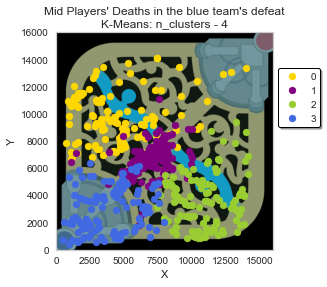

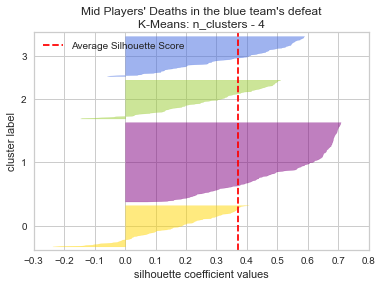

Silhouette score: 0.37058525327482184
1    234
0    122
3    118
2    115
Name: cluster, dtype: int64

Inertia: 595.8944399141128

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4804.360656   9598.836066   0.278689
1        1   6809.106838   6594.354701  -0.713675
2        2  10825.739130   3722.417391   0.008696
3        3   3964.677966   3137.830508   0.567797

In [1664]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "purple", "yellowgreen", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [1665]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2777.104894   1923.361570   0.643534
1        1   1182.690545   1031.624662   0.452043
2        2   1752.202996   1936.858573   0.703972
3        3   1945.517629   1613.220930   0.512204

In [1666]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13957.0             754.0           14106.0   
1        1           10045.0            1138.0           11064.0   
2        2           14123.0            7427.0            9431.0   
3        3            7928.0             495.0            6374.0   

   min coordinate_y  max timestamp  min timestamp  
0            6586.0              1             -1  
1            1838.0              0             -1  
2             856.0              1             -1  
3             447.0              1             -1

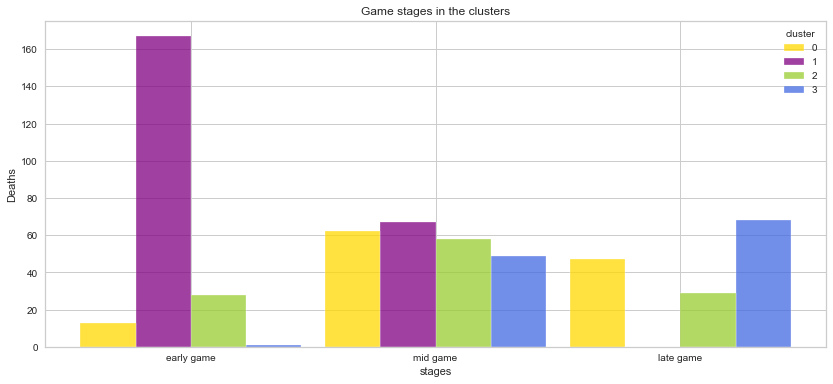

In [1667]:
stagesPerClusterV2(blueSideDefeat_df, colors)

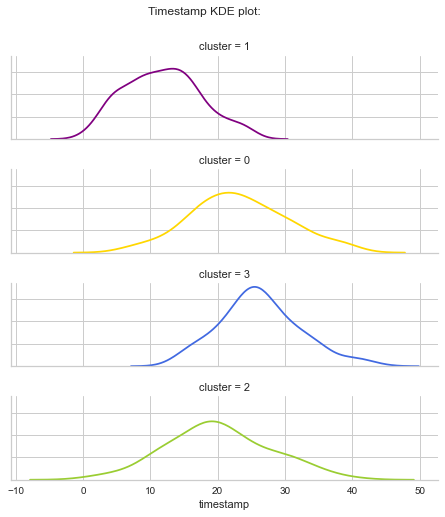

In [1668]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1669]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Velkoz           12
Akshan            9
Kassadin          9
Vex               8
Seraphine         6
Orianna           6
Lux               4
Syndra            4
Akali             4
Tristana          4
Taliyah           3
Malzahar          3
Morgana           3
Ahri              2
Galio             2
Kennen            2
Azir              2
Jayce             1
Zoe               1
Sylas             1
Cassiopeia        1
Vladimir          1
Swain             1
Gangplank         1

Deaths with each champion:

In [1670]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Velkoz        81
Akshan        76
Kassadin      56
Vex           47
Akali         41
Orianna       39
Seraphine     30
Taliyah       27
Tristana      22
Malzahar      20
Syndra        20
Lux           18
Cassiopeia    17
Morgana       12
Zoe           12
Vladimir      11
Azir          10
Jayce         10
Swain          9
Ahri           8
Galio          8
Sylas          7
Kennen         5
Gangplank      3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1671]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 24 champions when they won on the red side

Cluster 0 - died with 22 champions:
 ['Ahri' 'Akali' 'Akshan' 'Azir' 'Cassiopeia' 'Galio' 'Jayce' 'Kassadin'
 'Lux' 'Malzahar' 'Morgana' 'Orianna' 'Seraphine' 'Swain' 'Sylas' 'Syndra'
 'Taliyah' 'Tristana' 'Velkoz' 'Vex' 'Vladimir' 'Zoe']
Akshan        21
Kassadin      13
Vex           12
Velkoz        12
Orianna        7
Seraphine      7
Akali          7
Cassiopeia     6
Galio          4
Syndra         4
Malzahar       4
Morgana        4
Tristana       3
Zoe            3
Taliyah        3
Swain          3
Azir           2
Sylas          2
Ahri           2
Jayce          1
Lux            1
Vladimir       1
Name: champion, dtype: int64

Cluster 1 - died with 24 champions:
 ['Ahri' 'Akali' 'Akshan' 'Azir' 'Cassiopeia' 'Galio' 'Gangplank' 'Jayce'
 'Kassadin' 'Kennen' 'Lux' 'Malzahar' 'Morgana' 'Orianna' 'Seraphine'
 'Swain' 'Sylas' 'Syndra' 'Taliyah' 'Tristana' 'Velkoz' 'Vex' 'Vladimir'
 'Zoe']
Velkoz        35
Akshan 

---

### Blue Win Rate vs Red Win Rate

In [9]:
middle_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death")]

wins_df = middle_deaths_df[middle_deaths_df["victory"] == True]
wins_df

gameId  team       summoner region champion  timestamp  \
2646    EUW1_6275822398   Red  anonymous 126   euw1   Akshan   3.739667   
2663    EUW1_6275822398   Red  anonymous 126   euw1   Akshan  11.911217   
2671    EUW1_6275822398   Red  anonymous 126   euw1   Akshan  15.924683   
2677    EUW1_6275822398   Red  anonymous 126   euw1   Akshan  18.184633   
2683    EUW1_6275822398   Red  anonymous 126   euw1   Akshan  20.952450   
...                 ...   ...            ...    ...      ...        ...   
639481  EUW1_6289902488  Blue  anonymous 132   euw1   Irelia   6.723983   
639487  EUW1_6289902488  Blue  anonymous 132   euw1   Irelia   9.285517   
639503  EUW1_6289902488  Blue  anonymous 132   euw1   Irelia  16.940333   
639525  EUW1_6289902488  Blue  anonymous 132   euw1   Irelia  23.086500   
639534  EUW1_6289902488  Blue  anonymous 132   euw1   Irelia  26.142217   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
2646          8154.0        7570.0    NaN            NaN  ...   
2663          7159.0        6413.0    NaN            NaN  ...   
2671          4583.0        9817.0    NaN            NaN  ...   
2677         10663.0       10167.0    NaN            NaN  ...   
2683         13531.0        4995.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
639481        8196.0        8156.0    NaN            NaN  ...   
639487        7454.0        7638.0    NaN            NaN  ...   
639503        3323.0       11010.0    NaN            NaN  ...   
639525        6749.0       13456.0    NaN            NaN  ...   
639534       13872.0       13536.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
2646                NaN     True      Death        NaN           NaN   NaN   
2663                NaN     True      Death        NaN           NaN   NaN   
2671                NaN     True      Death        NaN           NaN   NaN   
2677                NaN     True      Death        NaN           NaN   NaN   
2683                NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
639481              NaN     True      Death        NaN           NaN   NaN   
639487              NaN     True      Death        NaN           NaN   NaN   
639503              NaN     True      Death        NaN           NaN   NaN   
639525              NaN     True      Death        NaN           NaN   NaN   
639534              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
2646        NaN       NaN  MIDDLE  Platinum  
2663        NaN       NaN  MIDDLE  Platinum  
2671        NaN       NaN  MIDDLE  Platinum  
2677        NaN       NaN  MIDDLE  Platinum  
2683        NaN       NaN  MIDDLE  Platinum  
...         ...       ...     ...       ...  
639481      NaN       NaN  MIDDLE      Gold  
639487      NaN       NaN  MIDDLE      Gold  
639503      NaN       NaN  MIDDLE      Gold  
639525      NaN       NaN  MIDDLE      Gold  
639534      NaN       NaN  MIDDLE      Gold  

[4896 rows x 56 columns]

In [10]:
wins = len(np.unique(wins_df["gameId"]))
wins

922

In [11]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 50.65075921908894 vs Blue: 49.34924078091106


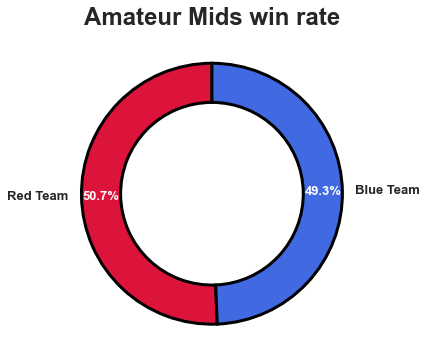

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(13)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Amateur Mids win rate', fontsize=24, loc='center', fontweight="bold")

plt.show()